# BFS Group Case Study

## Problem Statement

### Business understanding

CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

In this project, your task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.   




## Understanding the data

There are two data sets in this project: demographic and credit bureau data.  

* Demographic/application data: This is obtained from the information provided by the applicants at the time of credit card application. It contains customer-level information on age, gender, income, marital status, etc.

* Credit bureau: This is taken from the credit bureau and contains variables such as 'number of times 30 DPD or worse in last 3/6/12 months', 'outstanding balance', 'number of trades', etc.

## Table of Contents:

  1. [Import Required Libraries](#Import)
  2. [Demographic/Application Data Insight](#b)
  3. [Credit Bureau Data Insight](#c)
  
  4. [EDA of Demographic / Application Data](#d)
  5. [EDA of Credit Bureau Dataset](#e)
  
  6. [Combine Dataset](#f)
  7. [Weight of evidence ( WOE)  & information value (IV) Analysis for Demographic / Application Dataset](#g)
  8. [WOE Transformation for Master Dataset](#h)
  9. [WOE Transformation for Rejected Applicants from Demographic Dataset](#i)
  10. [WOE Transformation for Rejected Applicants from Master Dataset](#j)
  
  11. [Model Building on WOE Transformed Demographics Dataset](#k)
      1. [Train / Test Split](#l)
      2. [Logistic Regression](#m)
      3. [Regularized Logistic Regression on Demographic Dataset](#p)
      4. [Decision Tree Model](#o)
      5. [Random Forest Model](#q)
  
  12. [Model Building on Master DataSet (WOE)](#r)
      1. [Logistic Regression](#s)
      2. [Logistic Regression - Regularized](#t)
      3. [Decision Tree Model](#u)
      4. [Random Forest Model](#v)
      
  13. [Model Evaluation](#Evaluation)
  14. [Application Score Card on WOE Transformed Master Dataset](#aa)
  15. [Define Application Scorecard](#Scorecard)
  15. [Financial Benifits](#financialbenifits)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

### Demographic/application data Insight

In [2]:
df_demogph_application = pd.read_csv("Demographic data.csv")
df_demogph_application.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [3]:
# lets check the shape of the data set
df_demogph_application.shape

(71295, 12)

In [4]:
# lets check the dataset for variables
df_demogph_application.describe()

Application ID           Age  No of dependents        Income  \
count    7.129500e+04  71295.000000      71292.000000  71295.000000   
mean     4.989601e+08     44.943039          2.865188     27.195224   
std      2.885905e+08      9.939211          1.382319     15.514626   
min      1.004500e+05     -3.000000          1.000000     -0.500000   
25%      2.483719e+08     37.000000          2.000000     14.000000   
50%      4.975698e+08     45.000000          3.000000     27.000000   
75%      7.495868e+08     53.000000          4.000000     40.000000   
max      1.000084e+09     65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       71295.000000                     71295.000000   
mean                           34.563420                        33.958244   
std                            36.759758                        20.410824   
min                             6.000000                         3.000000   
25%                             6.000000                        16.000000   
50%                            11.000000                        34.000000   
75%                            60.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance Tag  
count     69870.000000  
mean          0.042193  
std           0.201030  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [5]:
import pandas_profiling as pf
pf.ProfileReport(df_demogph_application)

##### Inferences : 

Based on above insight lets take step by step approach to analyze some of these variables for data manupulation


In [6]:
# checking number of unique entries for all the variables
print("Column wise unique values count - :\n",df_demogph_application.nunique())

Column wise unique values count - :
 Application_ID                                 71292
Age                                               53
Gender                                             2
Marital_Status_(at_the_time_of_application)        2
No_of_dependents                                   5
Income                                            63
Education                                          5
Profession_                                        3
Type_of_residence                                  5
No_of_months_in_current_residence                121
No_of_months_in_current_company                   83
Performance_Tag                                    2
dtype: int64


In [7]:
# lets check null values column wise
df_demogph_application.isnull().sum().sort_values(ascending = False)

Performance_Tag                                1425
Education                                       119
Profession_                                      14
Type_of_residence                                 8
Marital_Status_(at_the_time_of_application)       6
No_of_dependents                                  3
Gender                                            2
No_of_months_in_current_company                   0
No_of_months_in_current_residence                 0
Income                                            0
Age                                               0
Application_ID                                    0
dtype: int64

In [8]:
# lets check the % of null values column wise
(round(100*(df_demogph_application.isnull().sum()/len(df_demogph_application.index)), 2)).sort_values(ascending = False)

Performance_Tag                                2.00
Education                                      0.17
Profession_                                    0.02
Type_of_residence                              0.01
Marital_Status_(at_the_time_of_application)    0.01
No_of_months_in_current_company                0.00
No_of_months_in_current_residence              0.00
Income                                         0.00
No_of_dependents                               0.00
Gender                                         0.00
Age                                            0.00
Application_ID                                 0.00
dtype: float64

Text(0.5, 1.0, 'Finding Distribution of Marital_Status_(at_the_time_of_application)')

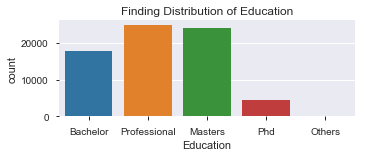

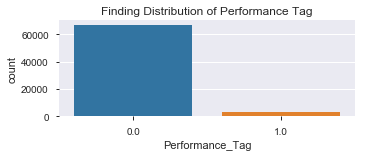

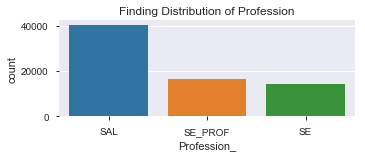

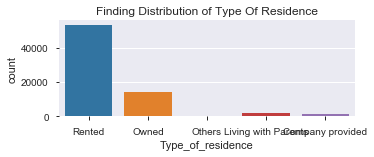

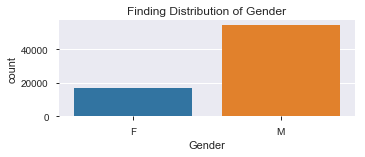

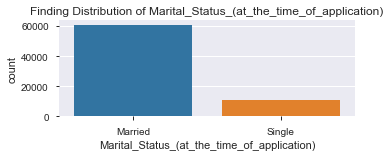

In [9]:
fig = plt.figure(figsize = (18,6))
plt.subplot(3,3,1)
sns.countplot(df_demogph_application["Education"])
plt.title("Finding Distribution of Education")

fig = plt.figure(figsize = (18,6))
plt.subplot(3,3,2)
sns.countplot(df_demogph_application["Performance_Tag"])
plt.title("Finding Distribution of Performance Tag")

fig = plt.figure(figsize = (18,6))
plt.subplot(3,3,3)
sns.countplot(df_demogph_application["Profession_"])
plt.title("Finding Distribution of Profession")

fig = plt.figure(figsize = (18,6))
plt.subplot(3,3,4)
sns.countplot(df_demogph_application["Type_of_residence"])
plt.title("Finding Distribution of Type Of Residence")

fig = plt.figure(figsize = (18,6))
plt.subplot(3,3,5)
sns.countplot(df_demogph_application["Gender"])
plt.title("Finding Distribution of Gender")

fig = plt.figure(figsize = (18,6))
plt.subplot(3,3,6)
sns.countplot(df_demogph_application["Marital_Status_(at_the_time_of_application)"])
plt.title("Finding Distribution of Marital_Status_(at_the_time_of_application)")

Text(0.5, 1.0, 'Finding Distribution of Age')

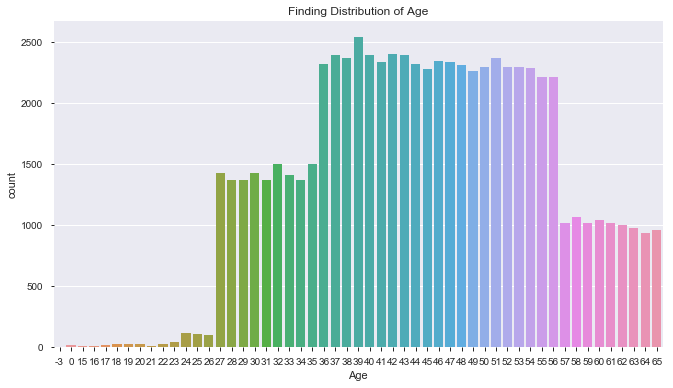

In [10]:
fig = plt.figure(figsize = (24,6))
plt.subplot(1,2,1)
sns.countplot(df_demogph_application["Age"])
plt.title("Finding Distribution of Age")


Text(0.5, 1.0, 'Finding Distribution of Income')

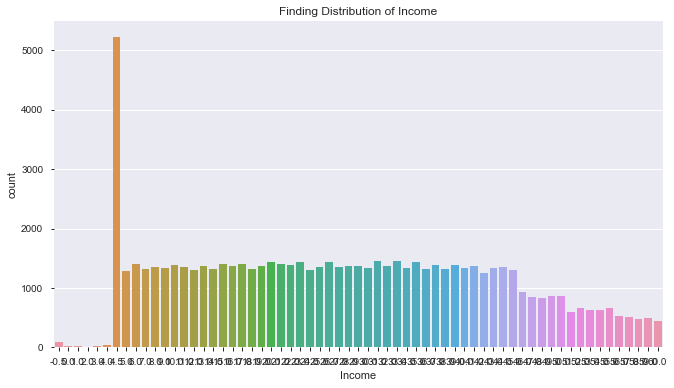

In [11]:
fig = plt.figure(figsize = (24,6))
plt.subplot(1,2,1)
sns.countplot(df_demogph_application["Income"])
plt.title("Finding Distribution of Income")

##### Inferences : 

* Variable Age seems to have some invalid data (0 ,-3 and all values less than 18)
* Variables Gender, Marital_Status_(at_the_time_of_application) /No_of_dependents/Education/Profession/Type of residence/Performance Tag have few null values
* Variable Income has a negative value

#### Imputing Missing / NULL Data

In [12]:
# lets assume credit card can be given only to the customerers above 18 years of age, so, we will replace all the customers
# with age less than 18 to 18

df_demogph_application.loc[df_demogph_application.Age<18,'Age'] = 18
df_demogph_application.describe()

Application_ID           Age  No_of_dependents        Income  \
count    7.129500e+04  71295.000000      71292.000000  71295.000000   
mean     4.989601e+08     44.949253          2.865188     27.195224   
std      2.885905e+08      9.917564          1.382319     15.514626   
min      1.004500e+05     18.000000          1.000000     -0.500000   
25%      2.483719e+08     37.000000          2.000000     14.000000   
50%      4.975698e+08     45.000000          3.000000     27.000000   
75%      7.495868e+08     53.000000          4.000000     40.000000   
max      1.000084e+09     65.000000          5.000000     60.000000   

       No_of_months_in_current_residence  No_of_months_in_current_company  \
count                       71295.000000                     71295.000000   
mean                           34.563420                        33.958244   
std                            36.759758                        20.410824   
min                             6.000000                         3.000000   
25%                             6.000000                        16.000000   
50%                            11.000000                        34.000000   
75%                            60.000000                        51.000000   
max                           126.000000                       133.000000   

       Performance_Tag  
count     69870.000000  
mean          0.042193  
std           0.201030  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [13]:
# out of 71290 entries, 54453 are Male, which is approx 76% of the total entries
# lets imput null values with "M"
df_demogph_application["Gender"] = df_demogph_application["Gender"].replace(np.nan,"M")

# lets impute null values with median
df_demogph_application["No_of_dependents"] = df_demogph_application["No_of_dependents"].replace(np.nan,df_demogph_application["No_of_dependents"].median())

# out of 71286 entries, 60727 are Married, lets impute null values with "Married"
df_demogph_application["Marital_Status_(at_the_time_of_application)"] = df_demogph_application["Marital_Status_(at_the_time_of_application)"].replace(np.nan,"Married")

# out of 71278 entries, more than 50000 entries belongs to "Rented",lets imput null values with "Rented"
df_demogph_application["Type_of_residence"] = df_demogph_application["Type_of_residence"].replace(np.nan,"Rented")


# out of 71278 entries, more than 40000 entries belongs to "SAL",lets imput null values with "SAL"
df_demogph_application["Profession_"] = df_demogph_application["Profession_"].replace(np.nan,"SAL")

# since the frequency for 2 - 3 values for the education is very close, we will impute this with "Unknown"
df_demogph_application["Education"] = df_demogph_application["Education"].replace(np.nan,"Unknown")

# Performance_Tag having 1425 NULL values, a null value for this field means credit card was never used
# these records belongs to rejected applicants, lets remove them from demographic dataset and also save them in a seperate
# dataset for later use

df_rej_demogph_application = df_demogph_application[df_demogph_application["Performance_Tag"].isnull()]
df_demogph_application = df_demogph_application[~df_demogph_application["Performance_Tag"].isnull()]


In [14]:
# lets check null values column wise
df_demogph_application.isnull().sum().sort_values(ascending = False)

Performance_Tag                                0
No_of_months_in_current_company                0
No_of_months_in_current_residence              0
Type_of_residence                              0
Profession_                                    0
Education                                      0
Income                                         0
No_of_dependents                               0
Marital_Status_(at_the_time_of_application)    0
Gender                                         0
Age                                            0
Application_ID                                 0
dtype: int64

##### Inferences : 

* After NULL value treatment, there is no rows available in dataset variables with NULL

### Credit bureau data Insight

In [15]:
df_credit_bureau = pd.read_csv("Credit Bureau data.csv")
df_credit_bureau.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [16]:
# lets check the dimensions of the data set
df_credit_bureau.shape

(71295, 19)

In [17]:
# lets check the dataset for numeric variables
df_credit_bureau.describe()

Application ID  No of times 90 DPD or worse in last 6 months  \
count    7.129500e+04                                  71295.000000   
mean     4.989601e+08                                      0.270313   
std      2.885905e+08                                      0.534166   
min      1.004500e+05                                      0.000000   
25%      2.483719e+08                                      0.000000   
50%      4.975698e+08                                      0.000000   
75%      7.495868e+08                                      0.000000   
max      1.000084e+09                                      3.000000   

       No of times 60 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.430535   
std                                        0.825334   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        5.000000   

       No of times 30 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.577207   
std                                        1.074436   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        7.000000   

       No of times 90 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.450340   
std                                         0.808387   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         5.000000   

       No of times 60 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.655488   
std                                         1.089535   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         7.000000   

       No of times 30 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.800912   
std                                         1.331940   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         9.000000   

       Avgas CC Utilization in last 12 months  \
count                            70237.000000   
mean                                29.696926   
std                                 29.533308   
min                                  0.000000   
25%                                  8.000000   
50%                                 15.000000   
75%                                 46.000000   
max                                113.000000   

       No of trades opened in last 6 months  \
count                          71294.000000   
mean                               2.298048   
std                                2.070191   
min                                0.000000   
25%                                1.000000   
50%                                2.000000   
75%                                3.000000   
max                               12.00000

In [18]:
pf.ProfileReport(df_credit_bureau)

##### Inferences : 

* Avgas_CC_Utilization_in_last_12_months has 1058 (1.5%) missing values	Missing
* Performance_Tag has 1425 (2.0%) missing values	Missing


* No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans) has 20593 (28.9%) zeros	Zeros
* No_of_PL_trades_opened_in_last_12_months has 25829 (36.2%) zeros	Zeros
* No_of_PL_trades_opened_in_last_6_months has 31194 (43.8%) zeros	Zeros
* No_of_times_30_DPD_or_worse_in_last_12_months has 44863 (62.9%) zeros	Zeros
* Outstanding_Balance has 809 (1.1%) zeros	Zeros
* No_of_times_90_DPD_or_worse_in_last_12_months has 50541 (70.9%) zeros	Zeros


* No_of_times_30_DPD_or_worse_in_last_6_months is highly correlated with No_of_times_30_DPD_or_worse_in_last_12_months (ρ = 0.95516)	Rejected
* No_of_times_60_DPD_or_worse_in_last_12_months is highly correlated with No_of_times_30_DPD_or_worse_in_last_6_months (ρ = 0.90798)	Rejected
* No_of_times_60_DPD_or_worse_in_last_6_months is highly correlated with No_of_times_60_DPD_or_worse_in_last_12_months (ρ = 0.93073)	Rejected
* No_of_trades_opened_in_last_12_months is highly correlated with No_of_PL_trades_opened_in_last_12_months (ρ = 0.93276)	Rejected
* No_of_trades_opened_in_last_6_months is highly correlated with No_of_trades_opened_in_last_12_months (ρ = 0.94025)	Rejected
* Presence_of_open_home_loan is highly correlated with Outstanding_Balance (ρ = 0.93494)	Rejected
* No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans) is highly correlated with 
* No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans) (ρ = 0.91072)	Rejected
* Total_No_of_Trades is highly correlated with No_of_trades_opened_in_last_12_months (ρ = 0.93957) Rejected

Based on above insight lets take step by step approach to analyze some of these variables for data manupulation


In [19]:
# lets check null values column wise
df_credit_bureau.isnull().sum().sort_values(ascending = False)

Performance_Tag                                                    1425
Avgas_CC_Utilization_in_last_12_months                             1058
Outstanding_Balance                                                 272
Presence_of_open_home_loan                                          272
No_of_trades_opened_in_last_6_months                                  1
No_of_times_90_DPD_or_worse_in_last_6_months                          0
No_of_times_60_DPD_or_worse_in_last_6_months                          0
No_of_times_30_DPD_or_worse_in_last_6_months                          0
No_of_times_90_DPD_or_worse_in_last_12_months                         0
No_of_times_60_DPD_or_worse_in_last_12_months                         0
No_of_times_30_DPD_or_worse_in_last_12_months                         0
No_of_trades_opened_in_last_12_months                                 0
Presence_of_open_auto_loan                                            0
No_of_PL_trades_opened_in_last_6_months                         

In [20]:
df_credit_bureau.loc[df_credit_bureau["Avgas_CC_Utilization_in_last_12_months"].isnull()]

Application_ID  No_of_times_90_DPD_or_worse_in_last_6_months  \
67          559139774                                             0   
75          354139458                                             0   
78          456275546                                             0   
149         507928401                                             0   
171         814624395                                             0   
214         125043285                                             0   
234         970523127                                             0   
244         427009271                                             0   
352         982684122                                             0   
482         720535507                                             0   
490         877372074                                             0   
607         421585403                                             0   
610         750283450                                             0   
630         672372685                                             0   
711         339609659                                             0   
784         329463946                                             0   
788         386349910                                             0   
805         153781730                                             0   
816         244146104                                             0   
905         114584206                                             0   
932         795023370                                             0   
934         442435855                                             0   
975         534251279                                             0   
980         204788799                                             0   
1011         59401020                                             0   
1023        590397889                                             0   
1074        857621550                                             0   
1077        278621104                                             0   
1116        170835798                                             0   
1163        156079864                                             0   
...               ...                                           ...   
71258       570904162                                             0   
71259       576549454                                             2   
71260       966199487                                             0   
71261       609962840                                             2   
71262       336897743                                             1   
71263       195201918                                             1   
71264        35962430                                             1   
71265       759032247                                             1   
71266       763052374                                             0   
71267       296620843                                             2   
71268       187594949                                             1   
71269       100108858                                             1   
71270       888243000                                             0   
71271       803398876                                             1   
71272       249854469                                             1   
71273        23680677                                             1   
71274       467080924                                             0   
71275       423151006                                             1   
71276       532528020                                             3   
71282       809525193                                             2   
71283       892747476                                             2   
71284       271521624                                             2   
71285       314764912                                             2   
71286       466026355                                             1   
71287       839271446          

Text(0.5, 1.0, 'Finding Distribution of No_of_trades_opened_in_last_6_months')

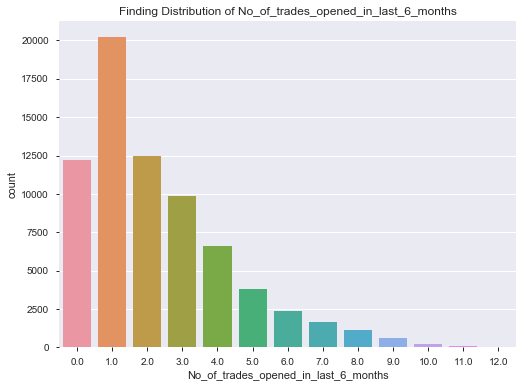

In [21]:
fig = plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.countplot(df_credit_bureau["No_of_trades_opened_in_last_6_months"])
plt.title("Finding Distribution of No_of_trades_opened_in_last_6_months")

In [22]:
df_credit_bureau.loc[df_credit_bureau["Outstanding_Balance"].isnull()]

Application_ID  No_of_times_90_DPD_or_worse_in_last_6_months  \
10509       479431469                                             0   
10560       369436570                                             0   
10583       198567793                                             0   
10594       771962421                                             0   
10763       124126752                                             0   
10785       897124363                                             0   
10821       127042017                                             0   
10952       252694179                                             0   
10958       377993668                                             0   
10965       757235320                                             0   
10966       548942415                                             0   
10999        84058197                                             0   
11067       752148797                                             0   
11138        49012122                                             0   
11196       503318401                                             0   
11216       591055764                                             0   
11232       388514432                                             0   
11300       542714178                                             0   
11343       916223895                                             0   
11392       744687272                                             0   
11447       668785489                                             0   
11461       649053029                                             0   
11485       929601043                                             0   
11630       309853573                                             0   
11640       569827778                                             0   
11692       883384468                                             0   
11707       221899432                                             0   
11727       911725818                                             0   
11732       434467018                                             0   
11755       481295026                                             0   
...               ...                                           ...   
25802       343704509                                             0   
25848       470164270                                             0   
26077       166911794                                             0   
26102         4287141                                             0   
28167       427587624                                             0   
28191       773993075                                             0   
28512       780094408                                             0   
28673       609912804                                             0   
28832       691808613                                             0   
29071       186583338                                             0   
40744       626657043                                             0   
42032       241072102                                             0   
42235       413752978                                             0   
42673        51310669                                             0   
42956       263952556                                             0   
43533       818409028                                             0   
43673       363282014                                             0   
43858       897195362                                             0   
44507       389294717                                             0   
44649       313402761                                             0   
44707       268999172                                             0   
44929        87199412                                             0   
45736       926395581                                             0   
46198       253104378                                             0   
46339       557891345          

#### Imputing Missing / NULL Data

In [23]:
# there are 1425 null values for performance tag, a null value for this field means credit card was never used
# these records belongs to rejected applicants, lets remove them from creditbureau dataset and also save them in a seperate
# dataset for later use

df_rej_credit_bureau = df_credit_bureau[df_credit_bureau["Performance_Tag"].isnull()]
df_credit_bureau = df_credit_bureau[~df_credit_bureau["Performance_Tag"].isnull()]

# Out of 71291 records, more than 20000 has a value 1.0, lets impute the null value with 1.0
df_credit_bureau["No_of_trades_opened_in_last_6_months"] = df_credit_bureau["No_of_trades_opened_in_last_6_months"].replace(np.nan,1.0)

# "Total no. of trades" is 0 for all the records for which "Outstanding Balance" & 
# "Avgas CC Utilization in last 12 months" has null values. which means credit card has never been utilized, we can safely replace these nan value with 0.
# replacing null values for Avgas CC Utilization in last 12 months & Outstanding Balance to 0
df_credit_bureau.loc[df_credit_bureau["Avgas_CC_Utilization_in_last_12_months"].isnull(),"Avgas_CC_Utilization_in_last_12_months"] = 0
df_credit_bureau.loc[df_credit_bureau["Outstanding_Balance"].isnull(),'Outstanding_Balance'] = 0


# Out of 71020 records, more than 50000 has a value 0, lets impute the null value with 0
df_credit_bureau["Presence_of_open_home_loan"] = df_credit_bureau["Presence_of_open_home_loan"].replace(np.nan,0)

df_rejected_creditb = df_credit_bureau[df_credit_bureau["Performance_Tag"].isnull()]



In [24]:
# lets check null values column wise
df_credit_bureau.isnull().sum().sort_values(ascending = False)

Performance_Tag                                                    0
No_of_trades_opened_in_last_6_months                               0
No_of_times_90_DPD_or_worse_in_last_6_months                       0
No_of_times_60_DPD_or_worse_in_last_6_months                       0
No_of_times_30_DPD_or_worse_in_last_6_months                       0
No_of_times_90_DPD_or_worse_in_last_12_months                      0
No_of_times_60_DPD_or_worse_in_last_12_months                      0
No_of_times_30_DPD_or_worse_in_last_12_months                      0
Avgas_CC_Utilization_in_last_12_months                             0
No_of_trades_opened_in_last_12_months                              0
Presence_of_open_auto_loan                                         0
No_of_PL_trades_opened_in_last_6_months                            0
No_of_PL_trades_opened_in_last_12_months                           0
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     0
No_of_Inquiries_in_last_12_months_

## EDA

### Demographic / Application Data

In [25]:
# lets create a copy of the demographic dataset to perform EDA
df_demogph_application_eda = pd.DataFrame(df_demogph_application).copy()

Text(0, 0.5, 'Frequency')

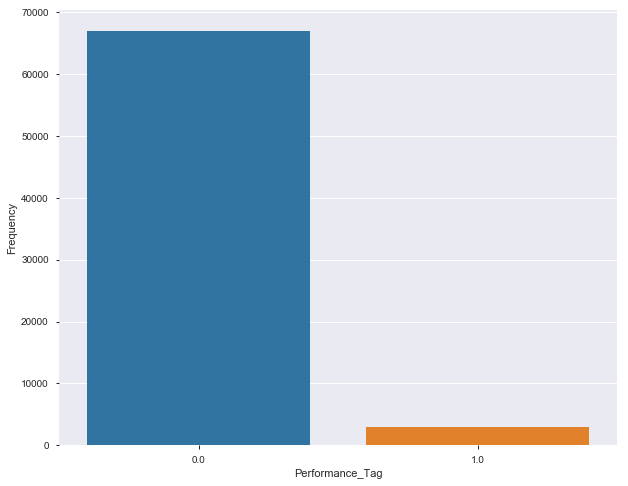

In [26]:
fig = plt.figure(figsize = (10,8))
sns.countplot(df_demogph_application_eda["Performance_Tag"])
plt.ylabel('Frequency')   

##### Inferences :

Data set is highly imbalanced as majority of the customers have a performance tag of 0 which means they are good customers.

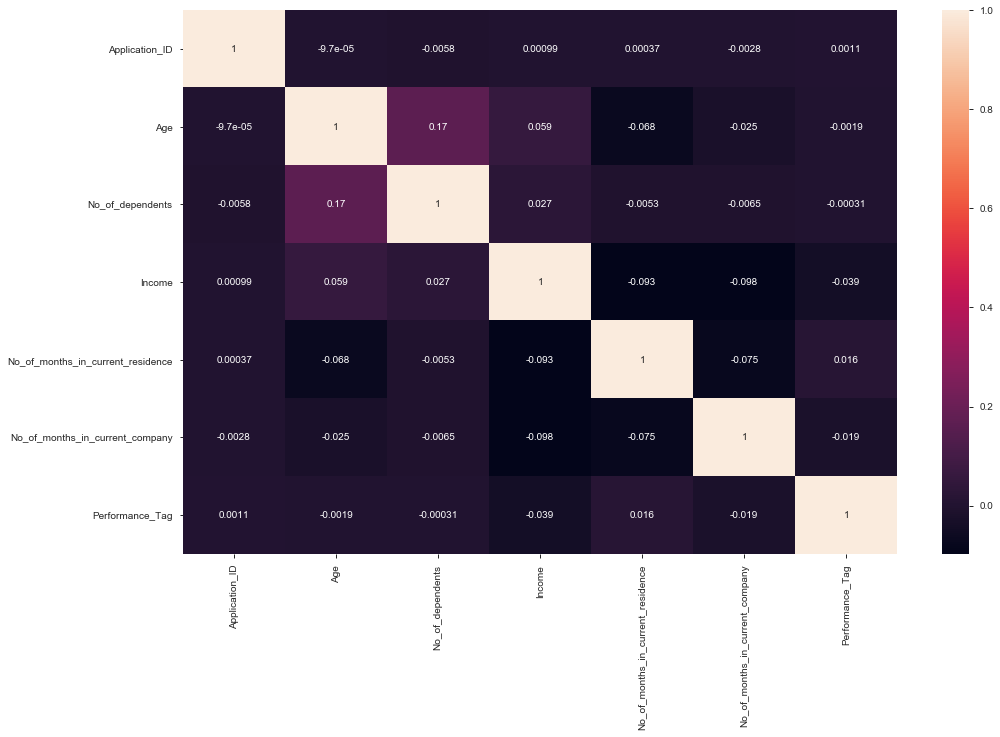

In [27]:
#Correlations between numerical variables

df_demog_num_cols =  df_demogph_application_eda.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize = (16, 10))
sns.heatmap(df_demogph_application_eda[df_demog_num_cols].corr(), annot = True)
plt.show()

##### Inferences :

The Target variable, Performance Tag is not much dependant with any numerical data

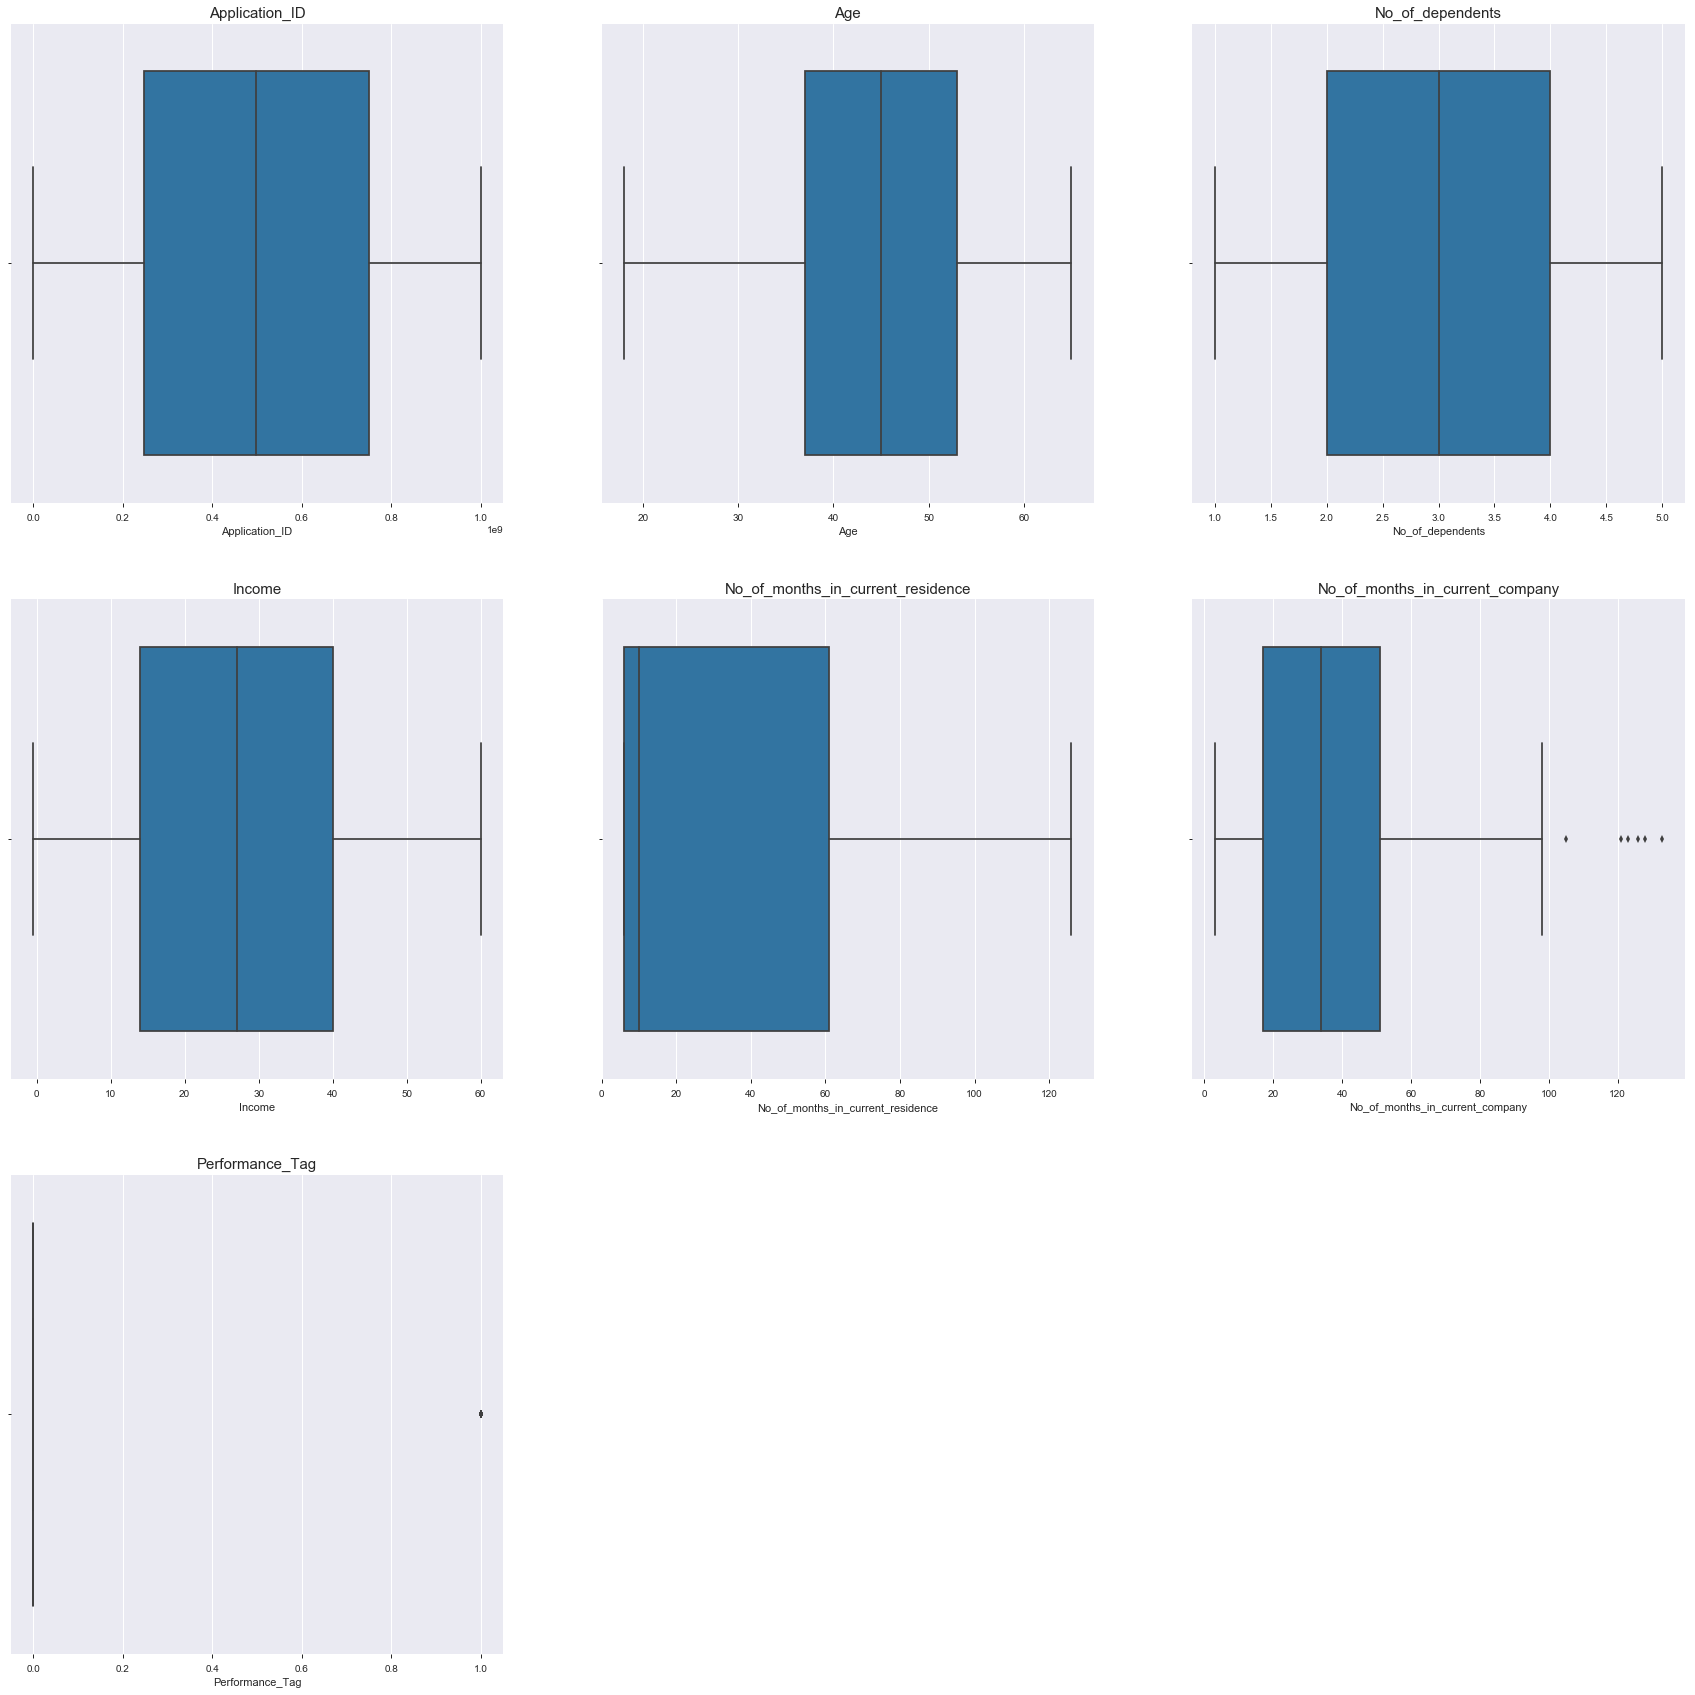

In [28]:
# Outliers analysis in the demographic / application dataset
fig= plt.figure(figsize = (30,30))

i = 1
for col in df_demog_num_cols:
    plt.subplot(3,3,i)
    sns.boxplot(df_demogph_application_eda[col])
    plt.title(col,fontsize = 15)
    i = i + 1 

plt.show()

##### Inferences :

There seems to be no outliers in the demographic dataset except for the field "No_of_months_in_current_company".


In [29]:
df_demogph_application_eda["No_of_months_in_current_company"].describe()

count    69870.000000
mean        34.199184
std         20.350225
min          3.000000
25%         17.000000
50%         34.000000
75%         51.000000
max        133.000000
Name: No_of_months_in_current_company, dtype: float64

##### Inferences :

Minimum value for the variable "No_of_months_in_current_company" is 3 whereas the maximum value is 133, Based on this analysis we can safely says organizations can have new joinees as well as tenured employees, so lets keep the data as it is.

#### Univariate Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

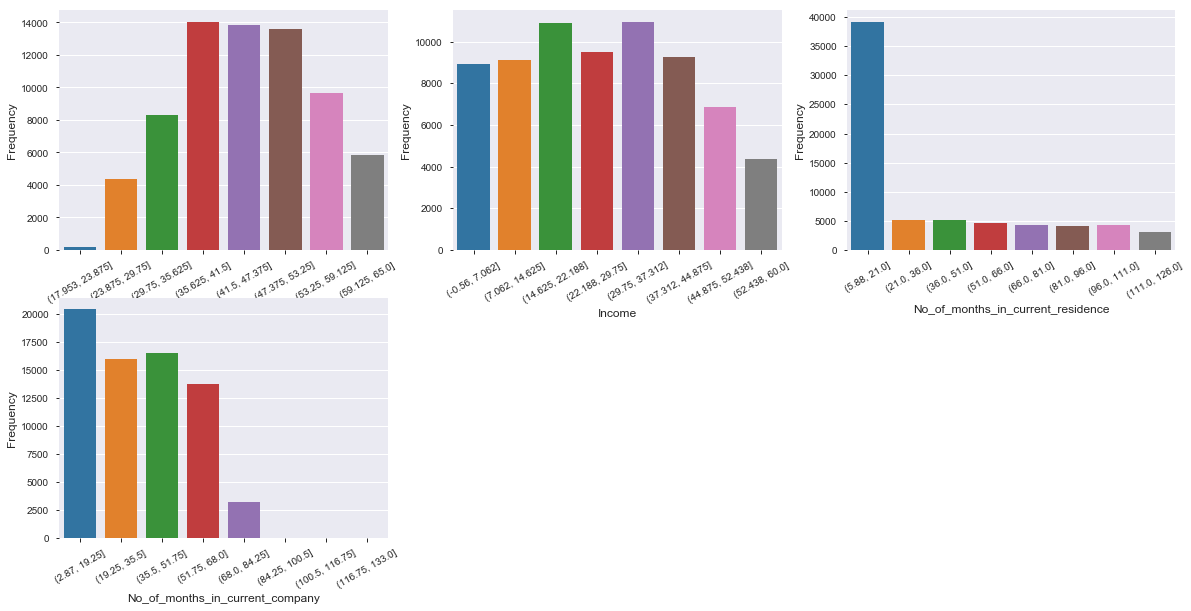

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)

col_bins = "Age"
df_demogph_application_eda[col_bins] = pd.cut(df_demogph_application_eda["Age"], 8, duplicates = 'drop')                                  
sns.countplot(df_demogph_application_eda[col_bins]) 
plt.xlabel(col_bins,fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
xticks(rotation = 30)

plt.subplot(3,3,2)
col_bins = "Income"
df_demogph_application_eda[col_bins] = pd.cut(df_demogph_application_eda["Income"], 8, duplicates = 'drop')                                  
sns.countplot(df_demogph_application_eda[col_bins]) 
plt.xlabel(col_bins,fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
xticks(rotation = 30)


plt.subplot(3,3,3)
col_bins = "No_of_months_in_current_residence"
df_demogph_application_eda[col_bins] = pd.cut(df_demogph_application_eda["No_of_months_in_current_residence"], 8, duplicates = 'drop')                                  
sns.countplot(df_demogph_application_eda[col_bins]) 
plt.xlabel(col_bins,fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
xticks(rotation = 30)

plt.subplot(3,3,4)
col_bins = "No_of_months_in_current_company"
df_demogph_application_eda[col_bins] = pd.cut(df_demogph_application_eda["No_of_months_in_current_company"], 8, duplicates = 'drop')                                  
sns.countplot(df_demogph_application_eda[col_bins]) 
plt.xlabel(col_bins,fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
xticks(rotation = 30)

##### Inferences :

* Maximium of the customers falls in the range 35 to 53 years of age group and very less are less than 24 years of age
* Above graph shows default rate decreases with the rise in income levels.
* default rate for the initial bin(6 to 21) & bin(96 to 111) is the lowest. default rate for the the bin 21 to 36 is the highest. default rate for all other bins ranges from 4.4 to 5.4%
* Default decreases as the no of months in the current company increases except for the last bin

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

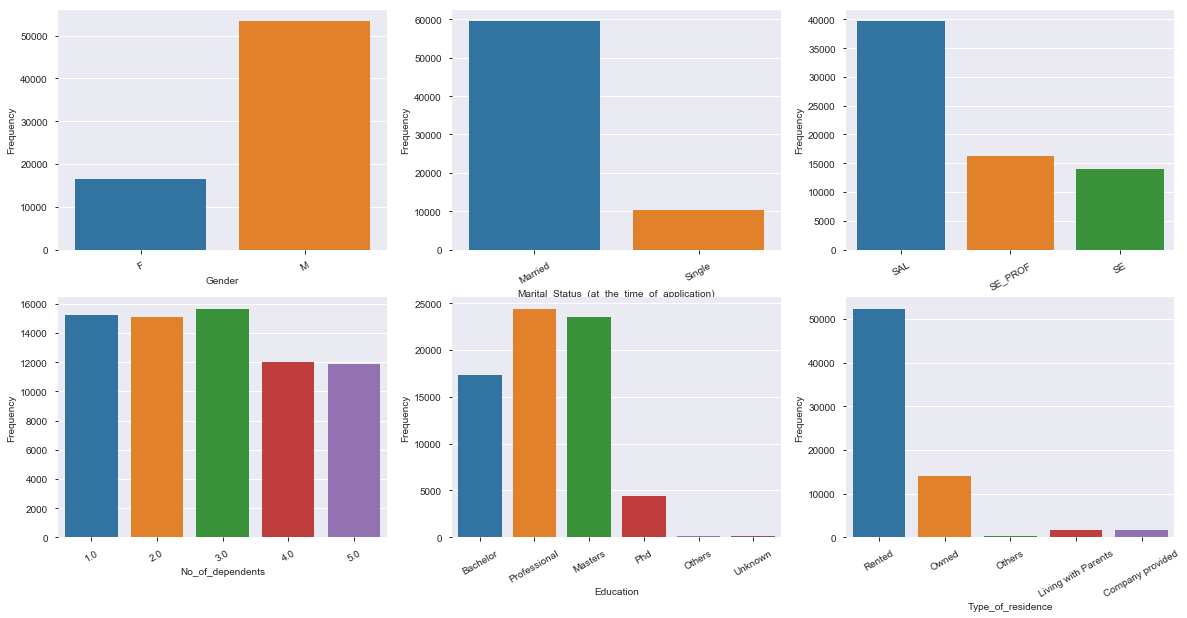

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)

sns.countplot(df_demogph_application_eda["Gender"]) 
plt.xlabel("Gender",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,2)
sns.countplot(df_demogph_application_eda["Marital_Status_(at_the_time_of_application)"]) 
plt.xlabel("Marital_Status_(at_the_time_of_application)",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,3)
sns.countplot(df_demogph_application_eda["Profession_"]) 
plt.xlabel("Profession_",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,4)
sns.countplot(df_demogph_application_eda["No_of_dependents"]) 
plt.xlabel("No_of_dependents",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,5)
sns.countplot(df_demogph_application_eda["Education"]) 
plt.xlabel("Education",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)
       
plt.subplot(3,3,6)
sns.countplot(df_demogph_application_eda["Type_of_residence"]) 
plt.xlabel("Type_of_residence",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

##### Inferences :

* There are more males than females in the given dataset.
* More married people than Singles in the given dataset.
* Most of the people are Salaried employees
* Almost evenly distributed for all the no. of dependent field, but people with 4 and 5 dependents are lesser than the people with no. of dependents as 1 to 3.
* Top 3 categories for Education:

    1. Bachelor
    2. Professional
    3. Masters

  Few people have done their Phd, rest of the population belongs to Others or Unknown 
  
* Most of the people lives in Rented houses, followed by houses owned by them.    
    

### Credit Bureau Dataset

In [32]:
# lets create a copy of the demographic dataset to perform EDA
df_credit_bureau_eda = pd.DataFrame(df_credit_bureau).copy()

Text(0, 0.5, 'Frequency')

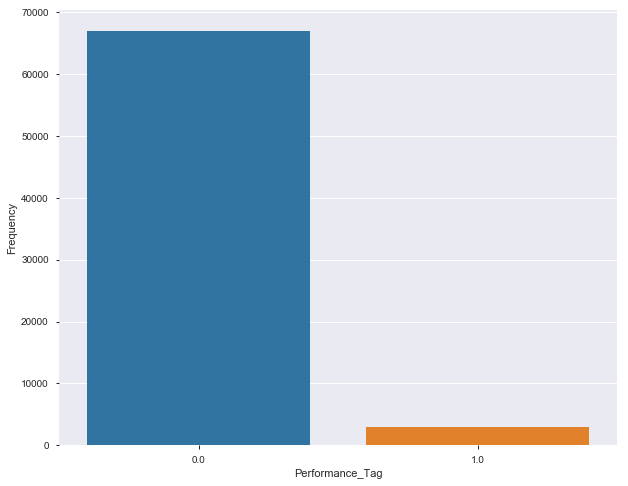

In [33]:
fig = plt.figure(figsize = (10,8))
sns.countplot(df_credit_bureau_eda["Performance_Tag"])
plt.ylabel('Frequency') 

##### Inferences :

Data set is highly imbalanced as majority of the customers have a performance tag of 0 which means they are good customers.

In [34]:
# lets check the type of variables present in the dataset
df_credit_bureau_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 19 columns):
Application_ID                                                     69870 non-null int64
No_of_times_90_DPD_or_worse_in_last_6_months                       69870 non-null int64
No_of_times_60_DPD_or_worse_in_last_6_months                       69870 non-null int64
No_of_times_30_DPD_or_worse_in_last_6_months                       69870 non-null int64
No_of_times_90_DPD_or_worse_in_last_12_months                      69870 non-null int64
No_of_times_60_DPD_or_worse_in_last_12_months                      69870 non-null int64
No_of_times_30_DPD_or_worse_in_last_12_months                      69870 non-null int64
Avgas_CC_Utilization_in_last_12_months                             69870 non-null float64
No_of_trades_opened_in_last_6_months                               69870 non-null float64
No_of_trades_opened_in_last_12_months                              69870 non-null int64
No_of_P

###### Inferences :

Credit bureau dataset contains only numeric variables

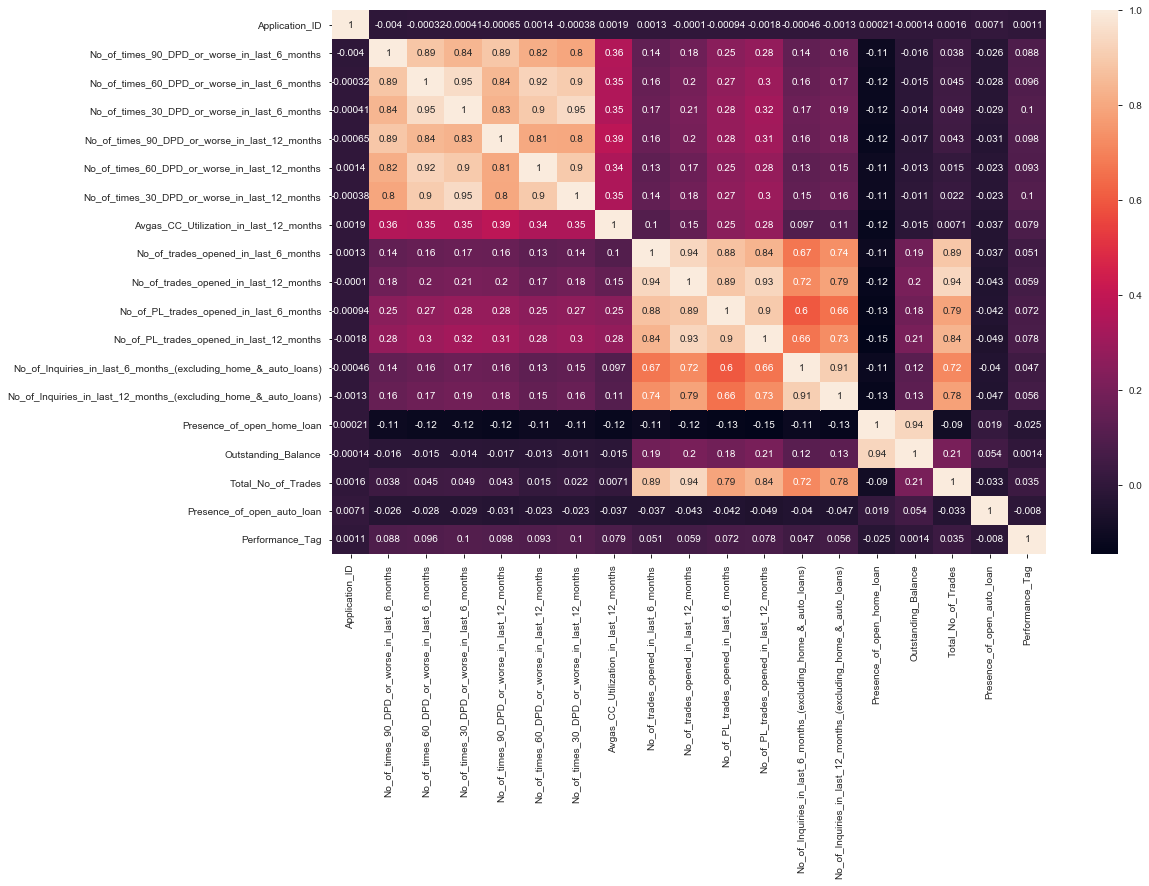

In [35]:
#Correlations of only numerical data
plt.figure(figsize = (16, 10))
sns.heatmap(df_credit_bureau_eda[df_credit_bureau_eda.columns].corr(), annot = True)
plt.show()

###### Inferences :

Some of the variables does having correlation with Target variables

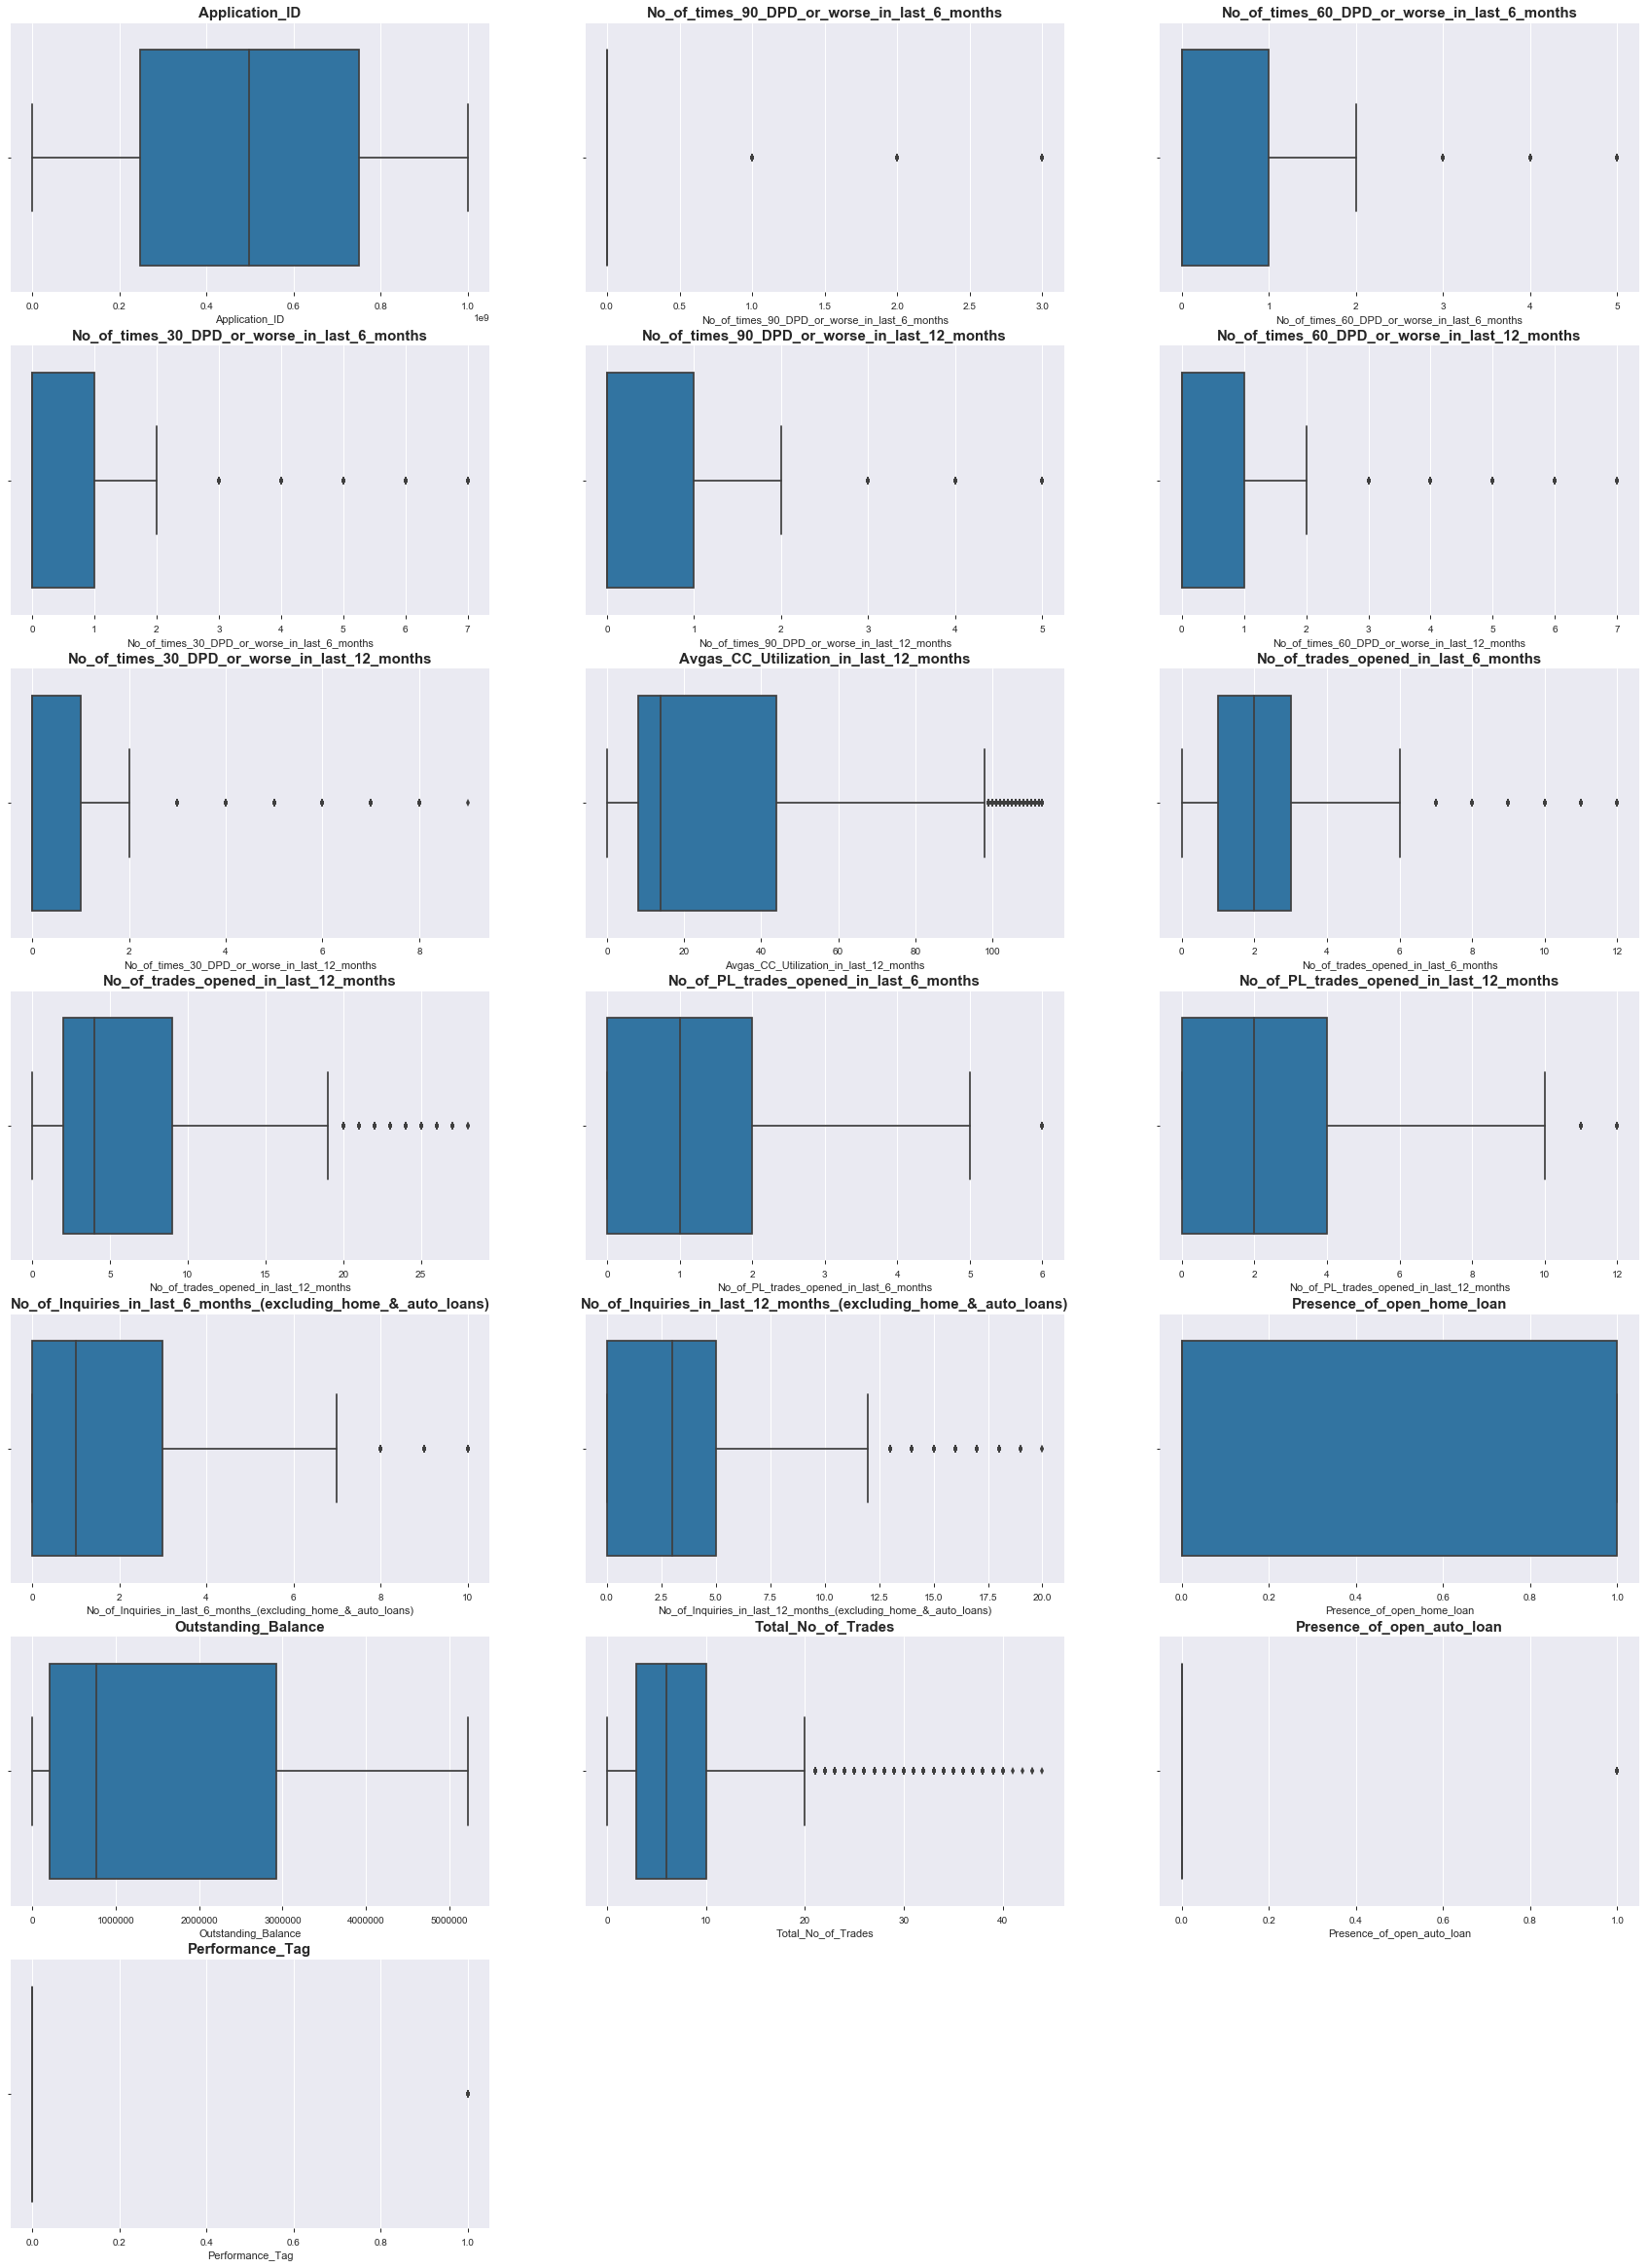

In [36]:
# lets check for outliers in the creditbureau dataset
fig= plt.figure(figsize = (30,60))

i = 1
for col in df_credit_bureau_eda.columns:
    plt.subplot(10,3,i)
    sns.boxplot(df_credit_bureau_eda[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1 

plt.show()

###### Inferences :

Graph shows a possibility of some outliers in the dataset

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

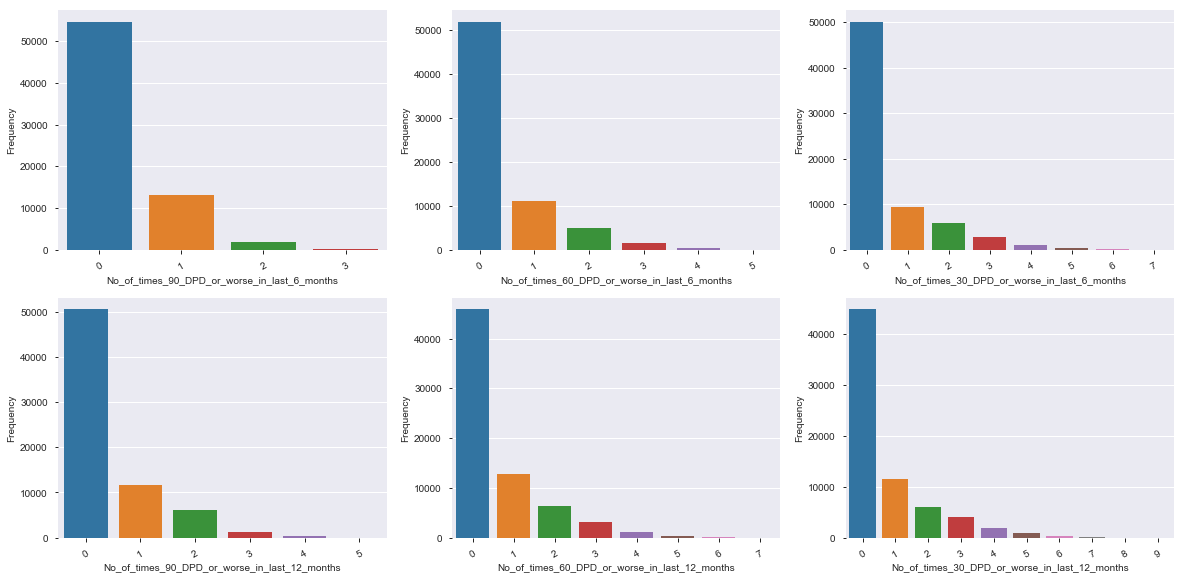

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)

sns.countplot(df_credit_bureau_eda["No_of_times_90_DPD_or_worse_in_last_6_months"]) 
plt.xlabel("No_of_times_90_DPD_or_worse_in_last_6_months",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,2)
sns.countplot(df_credit_bureau_eda["No_of_times_60_DPD_or_worse_in_last_6_months"]) 
plt.xlabel("No_of_times_60_DPD_or_worse_in_last_6_months",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,3)
sns.countplot(df_credit_bureau_eda["No_of_times_30_DPD_or_worse_in_last_6_months"]) 
plt.xlabel("No_of_times_30_DPD_or_worse_in_last_6_months",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,4)
sns.countplot(df_credit_bureau_eda["No_of_times_90_DPD_or_worse_in_last_12_months"]) 
plt.xlabel("No_of_times_90_DPD_or_worse_in_last_12_months",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

plt.subplot(3,3,5)
sns.countplot(df_credit_bureau_eda["No_of_times_60_DPD_or_worse_in_last_12_months"]) 
plt.xlabel("No_of_times_60_DPD_or_worse_in_last_12_months",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)
       
plt.subplot(3,3,6)
sns.countplot(df_credit_bureau_eda["No_of_times_30_DPD_or_worse_in_last_12_months"]) 
plt.xlabel("No_of_times_30_DPD_or_worse_in_last_12_months",fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
xticks(rotation = 30)

###### Inferences :

* Majority of the customers are good customers as they have not defaulted in the last 6 months(value 0 for 90 DPD)
* Majority of the customers are good customers as they have not defaulted in the last 6 months(value 0 for 60 DPD)
* Majority of the customers are good customers as they have not defaulted in the last 6 months(value 0 for 30 DPD)
* Majority of the customers are good customers as they have not defaulted in the last 12 months(value 0 for 90 DPD)
* Majority of the customers are good customers as they have not defaulted in the last 12 months(value 0 for 60 DPD)
* Majority of the customers are good customers as they have not defaulted in the last 12 months(value 0 for 30 DPD)

#### Bivariate analysis for Credit Bureau data

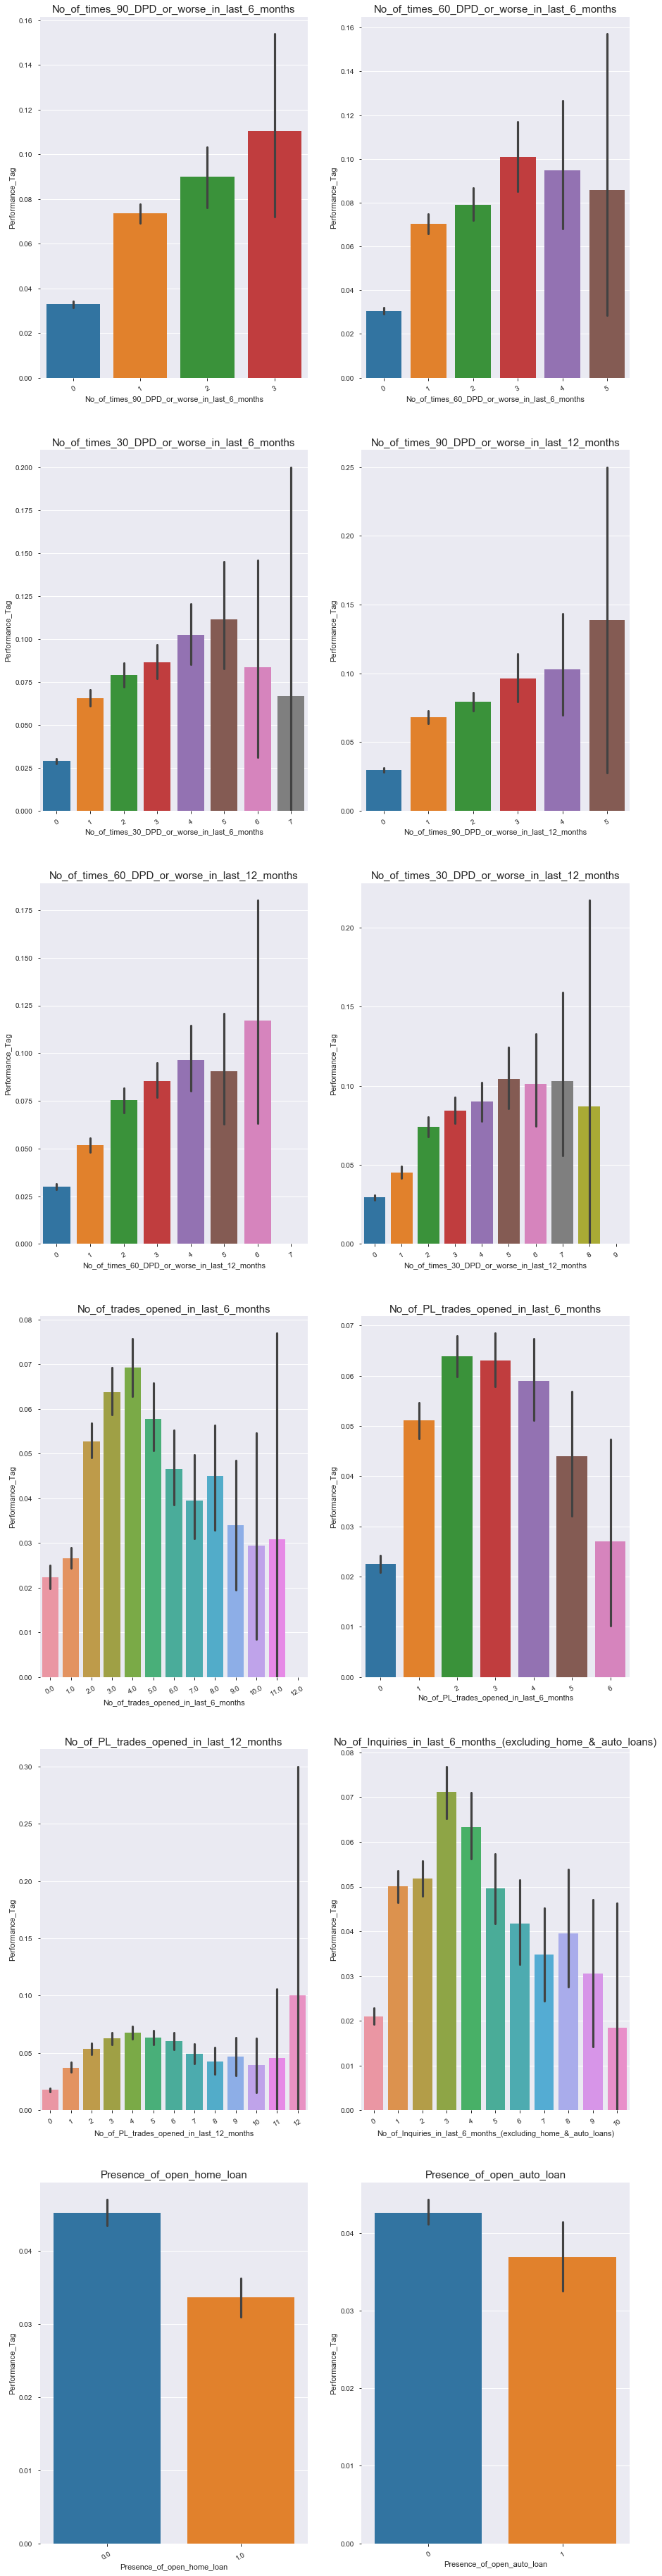

In [38]:
# lets plot the target variable against availabe predictor variables
fig= plt.figure(figsize = (15,100))

# lets filter columns for which we want to see plots against the target variable
# lets remov application id, target variable, variables for which binning variable has been created
cols = df_credit_bureau_eda.drop(["Application_ID",
                              "Performance_Tag",
                              "Avgas_CC_Utilization_in_last_12_months",
                              "No_of_trades_opened_in_last_12_months",
                              "No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)",
                              "Outstanding_Balance",
                              "Total_No_of_Trades"], axis = 1)

i = 1
for col in cols:
    plt.subplot(9,2,i)
    bin_col = col + "_bins"
    if df_credit_bureau_eda[col].nunique() > 15:
        sns.barplot(x = bin_col, y = "Performance_Tag", data = df_credit_bureau_eda) 
    else:
        sns.barplot(x = col, y = "Performance_Tag", data = df_credit_bureau_eda) 
        
    plt.title(col,fontsize = 15)
    xticks(rotation = 30)
    i = i + 1 

plt.show()

###### Inferences :

Relation of the target variable (Performance_Tag) with the different predictor variables were demonstrated by above graphs

### Combine Dataset

In [39]:
# lets drop "Performance Tag" from creditbureau as it is also present in demographic dataset
df_credit_bureau.drop("Performance_Tag",axis =1 , inplace = True)

In [40]:
# lets create Combine dataset
df_master = pd.merge(df_demogph_application,df_credit_bureau, how="inner", on = "Application_ID")
df_master.head()

Application_ID  Age Gender Marital_Status_(at_the_time_of_application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No_of_dependents  Income     Education Profession_ Type_of_residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No_of_months_in_current_residence  ...  \
0                                113  ...   
1                                112  ...   
2                                104  ...   
3                                 94  ...   
4                                112  ...   

   No_of_trades_opened_in_last_6_months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No_of_trades_opened_in_last_12_months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No_of_PL_trades_opened_in_last_6_months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No_of_PL_trades_opened_in_last_12_months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
0                         1.0            2999395.0                   4   
1                         0.0               3078.0                   5   
2                         1.0            3004972.0                   2   
3                         1.0            3355373.0                   4   
4                         1.0            3014283.0                   4   

   Presence_of_open_auto_loan  
0                           0  
1                           0  
2                           0  
3                           1  
4                           0  

[5 rows x 29 columns]

In [41]:
# check the dimensions of the Combine dataset
df_master.shape

(69876, 29)

In [42]:
# check column wise info of the Combine datset
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69876 entries, 0 to 69875
Data columns (total 29 columns):
Application_ID                                                     69876 non-null int64
Age                                                                69876 non-null int64
Gender                                                             69876 non-null object
Marital_Status_(at_the_time_of_application)                        69876 non-null object
No_of_dependents                                                   69876 non-null float64
Income                                                             69876 non-null float64
Education                                                          69876 non-null object
Profession_                                                        69876 non-null object
Type_of_residence                                                  69876 non-null object
No_of_months_in_current_residence                                  69876 non-null int64
No

In [43]:
# lets check null values column wise
df_master.isnull().sum().sort_values(ascending = False)

Presence_of_open_auto_loan                                         0
No_of_times_60_DPD_or_worse_in_last_6_months                       0
Age                                                                0
Gender                                                             0
Marital_Status_(at_the_time_of_application)                        0
No_of_dependents                                                   0
Income                                                             0
Education                                                          0
Profession_                                                        0
Type_of_residence                                                  0
No_of_months_in_current_residence                                  0
No_of_months_in_current_company                                    0
Performance_Tag                                                    0
No_of_times_90_DPD_or_worse_in_last_6_months                       0
No_of_times_30_DPD_or_worse_in_las

In [44]:
df_rejected_demogph_application_master = pd.merge(df_rej_demogph_application, df_rej_credit_bureau, how="inner", on = "Application_ID")
df_rejected_demogph_application_master.head()

Application_ID  Age Gender Marital_Status_(at_the_time_of_application)  \
0       906908303   35      M                                      Single   
1        10990583   47      F                                     Married   
2       589678446   46      M                                     Married   
3       809411322   41      M                                     Married   
4       150246616   42      F                                     Married   

   No_of_dependents  Income     Education Profession_ Type_of_residence  \
0               1.0     6.0      Bachelor         SAL            Rented   
1               4.0    12.0       Masters          SE            Rented   
2               3.0     7.0  Professional          SE            Rented   
3               3.0    18.0       Masters         SAL            Rented   
4               4.0    17.0           Phd         SAL            Rented   

   No_of_months_in_current_residence  ...  \
0                                 22  ...   
1                                122  ...   
2                                 10  ...   
3                                  6  ...   
4                                  8  ...   

   No_of_trades_opened_in_last_12_months  \
0                                     12   
1                                      7   
2                                      7   
3                                      7   
4                                      7   

   No_of_PL_trades_opened_in_last_6_months  \
0                                        3   
1                                        3   
2                                        2   
3                                        1   
4                                        2   

   No_of_PL_trades_opened_in_last_12_months  \
0                                         7   
1                                         4   
2                                         4   
3                                         4   
4                                         3   

   No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
0                                                  2                
1                                                  3                
2                                                  0                
3                                                  4                
4                                                  3                

   No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
0                                                  4                 
1                                                  5                 
2                                                  3                 
3                                                  5                 
4                                                  6                 

   Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
0                         0.0            1309623.0                  13   
1                         0.0             775626.0                   7   
2                         0.0             732602.0                   8   
3                         0.0             842057.0                   8   
4                         0.0             786997.0                   7   

   Presence_of_open_auto_loan  Performance_Tag_y  
0                           0                NaN  
1                           0                NaN  
2                           0                NaN  
3                           0                NaN  
4                           1                NaN  

[5 rows x 30 columns]

## Weight of evidence ( WOE)  & information value (IV) Analysis for Demographic / Application dataset

* What is Weight of Evidence (WOE)?

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

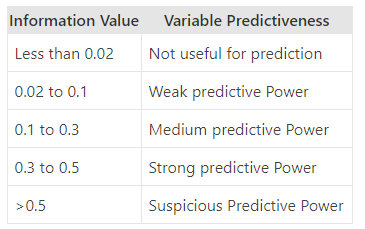


WOE Calculation

Distribution of Goods - % of Good Customers in a particular group
Distribution of Bads - % of Bad Customers in a particular group
ln - Natural Log

Steps of Calculating WOE

For a continuous variable, split data into 10 parts (or lesser depending on the distribution).

        * Calculate the number of events and non-events in each group (bin)
        * Calculate the % of events and % of non-events in each group.
        * Calculate WOE by taking natural log of division of % of non-events and % of events


* What is Information Value (IV)?

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :


Rules related to Information Value

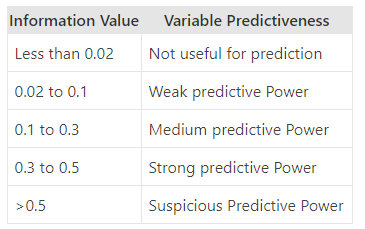

In [45]:
## NOTE : This function has been inspired by google open source community

def iv_woe(data, target, bins, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>15):
            
            binned_x = pd.cut(data[ivars], bins, include_lowest=False)
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [46]:
# lets check the dimensions of the dataset
df_demogph_application.shape

(69870, 12)

In [47]:
df_demogph_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 12 columns):
Application_ID                                 69870 non-null int64
Age                                            69870 non-null int64
Gender                                         69870 non-null object
Marital_Status_(at_the_time_of_application)    69870 non-null object
No_of_dependents                               69870 non-null float64
Income                                         69870 non-null float64
Education                                      69870 non-null object
Profession_                                    69870 non-null object
Type_of_residence                              69870 non-null object
No_of_months_in_current_residence              69870 non-null int64
No_of_months_in_current_company                69870 non-null int64
Performance_Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


In [48]:
#calling the function
data =  df_demogph_application.drop('Application_ID',axis = 1)
iv_d, woe_d = iv_woe(data = data, target = 'Performance_Tag', bins=8, show_woe = True)

Information value of Age is 0.003863
  Variable            Cutoff      N  Events  % of Events  Non-Events  \
0      Age  (17.953, 23.875]    214     4.0     0.001357       210.0   
1      Age   (23.875, 29.75]   4346   179.0     0.060719      4167.0   
2      Age   (29.75, 35.625]   8315   360.0     0.122117      7955.0   
3      Age    (35.625, 41.5]  14055   634.0     0.215061     13421.0   
4      Age    (41.5, 47.375]  13837   572.0     0.194030     13265.0   
5      Age   (47.375, 53.25]  13584   534.0     0.181140     13050.0   
6      Age   (53.25, 59.125]   9662   419.0     0.142130      9243.0   
7      Age    (59.125, 65.0]   5857   246.0     0.083446      5611.0   

   % of Non-Events       WoE        IV  
0         0.003138  0.838412  0.001493  
1         0.062267  0.025165  0.000039  
2         0.118870 -0.026949  0.000088  
3         0.200547 -0.069874  0.001014  
4         0.198216  0.021344  0.000089  
5         0.195003  0.073747  0.001022  
6         0.138116 -0.02865

In [49]:
#WOE table
woe_d

Variable               Cutoff      N  \
0                                          Age     (17.953, 23.875]    214   
1                                          Age      (23.875, 29.75]   4346   
2                                          Age      (29.75, 35.625]   8315   
3                                          Age       (35.625, 41.5]  14055   
4                                          Age       (41.5, 47.375]  13837   
5                                          Age      (47.375, 53.25]  13584   
6                                          Age      (53.25, 59.125]   9662   
7                                          Age       (59.125, 65.0]   5857   
0                                       Gender                    F  16506   
1                                       Gender                    M  53364   
0  Marital_Status_(at_the_time_of_application)              Married  59553   
1  Marital_Status_(at_the_time_of_application)               Single  10317   
0                             No_of_dependents                    1  15218   
1                             No_of_dependents                    2  15128   
2                             No_of_dependents                    3  15648   
3                             No_of_dependents                    4  12000   
4                             No_of_dependents                    5  11876   
0                                       Income       (-0.56, 7.062]   8911   
1                                       Income      (7.062, 14.625]   9132   
2                                       Income     (14.625, 22.188]  10889   
3                                       Income      (22.188, 29.75]   9511   
4                                       Income      (29.75, 37.312]  10971   
5                                       Income     (37.312, 44.875]   9250   
6                                       Income     (44.875, 52.438]   6849   
7                                       Income       (52.438, 60.0]   4357   
0                                    Education             Bachelor  17302   
1                                    Education              Masters  23481   
2                                    Education               Others    119   
3                                    Education                  Phd   4464   
4                                    Education         Professional  24386   
5                                    Education              Unknown    118   
0                                  Profession_                  SAL  39687   
1                                  Profession_                   SE  13927   
2                                  Profession_              SE_PROF  16256   
0                            Type_of_residence     Company provided   1603   
1                            Type_of_residence  Living with Parents   1778   
2                            Type_of_residence               Others    198   
3                            Type_of_residence                Owned  14003   
4                            Type_of_residence               Rented  52288   
0            No_of_months_in_current_residence         (5.88, 21.0]  39223   
1            No_of_months_in_current_residence         (21.0, 36.0]   5214   
2            No_of_months_in_current_residence         (36.0, 51.0]   5066   
3            No_of_months_in_current_residence         (51.0, 66.0]   4582   
4            No_of_months_in_current_residence         (66.0, 81.0]   4267   
5            No_of_months_in_current_residence         (81.0, 96.0]   4138   
6            No_of_months_in_current_residence        (96.0, 111.0]   4253   
7            No_of_months_in_current_residence       (111.0, 126.0]   3127   
0              No_of_months_in_current_company        (2.87, 19.25]  20421   
1              No_of_months_in_current_company        (19.25, 35.5]  16018   
2              No_of_months_in_current_company        (35.5, 51.75]  16488   
3              No_of_months_in_current_company        (51.75

In [50]:
#VAriable importance
iv_d.sort_values(by = 'IV',ascending = False)

Variable        IV
0                                       Income  0.040995
0            No_of_months_in_current_residence  0.038627
0              No_of_months_in_current_company  0.019302
0                                          Age  0.003863
0                             No_of_dependents  0.002653
0                                  Profession_  0.002289
0                            Type_of_residence  0.000918
0                                    Education  0.000765
0                                       Gender  0.000320
0  Marital_Status_(at_the_time_of_application)  0.000093

In [51]:
# as per IV Rules, IV value of less than 0.02 is not useful, lets filter the dataframe for features having IV value greater 
# than 0.02
demo_imp = iv_d[iv_d["IV"] > 0.02]
demo_imp.sort_values(by="IV",ascending = False)

Variable        IV
0                             Income  0.040995
0  No_of_months_in_current_residence  0.038627

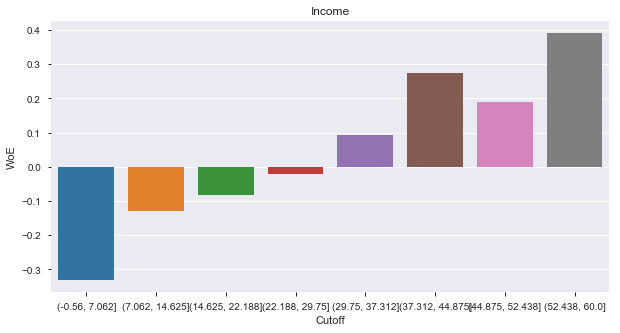

In [301]:
#Lets visualize the WoE value as in Income
plt.figure(figsize = (10,5))
sns.barplot( y= 'WoE', x= 'Cutoff', data= woe_d[woe_d.Variable == 'Income'])
plt.title('Income')
plt.show()

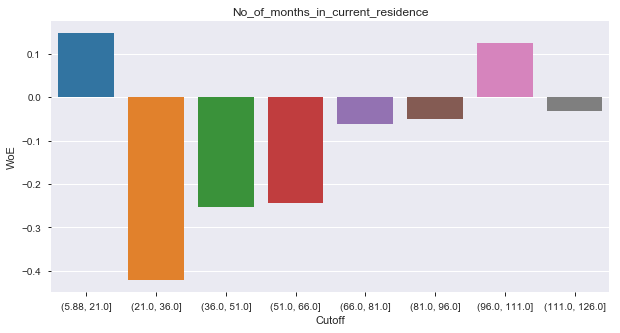

In [302]:
#Lets visualize the WoE value as in No_of_months_in_current_residence
plt.figure(figsize = (10,5))
sns.barplot( y= 'WoE', x= 'Cutoff', data= woe_d[woe_d.Variable == 'No_of_months_in_current_residence'])
plt.title('No_of_months_in_current_residence')
plt.show()

##### Inferences

Only Income & No of months in current residence seems to be the useful predictor variables here

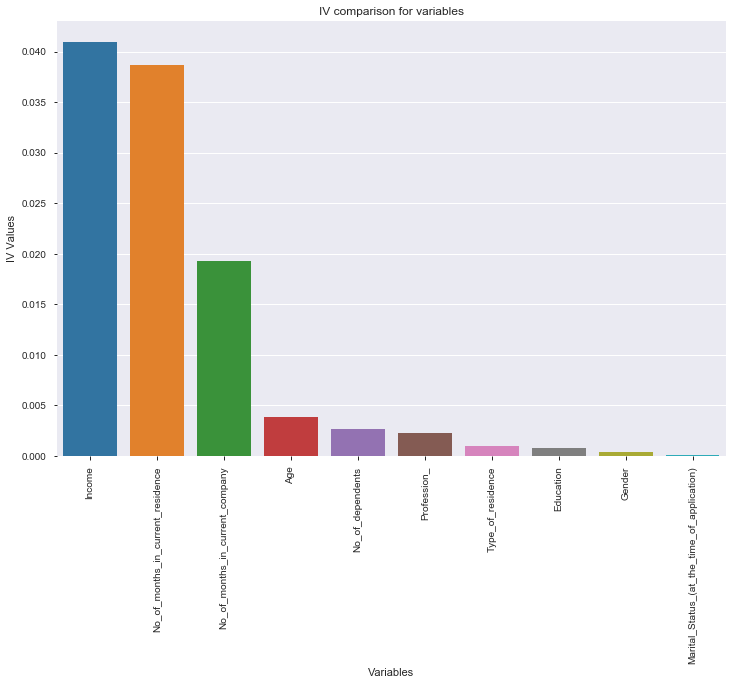

In [52]:
## plotting all the consolidated IV values of the demographics variable
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Variable', y='IV', data=iv_d.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('IV comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

In [53]:
#Building a new dataset with WOE values 


#copy of demographic data
df_demogph_application_woe = pd.DataFrame(df_demogph_application).copy()

#Replacing actual values with WOE variables,creating woe transformed demographic dataset
#Binned data
#Considering Columns having more than 15 unique values for binning
#demographic data
demo_bins = []

demo_cols = df_demogph_application_woe.columns
for i in demo_cols:
    if df_demogph_application_woe[i].nunique() > 15:
        demo_bins.append(i)
        
demo_vars = df_demogph_application_woe.columns.difference(demo_bins)
demo_vars

for var in demo_bins:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        df_demogph_application_woe[var] = df_demogph_application_woe[var].replace(range(left,right),row.WoE)

#Non-Binned data
for var in demo_vars:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        df_demogph_application_woe[var] = df_demogph_application_woe[var].replace(row.Cutoff,row.WoE)
        
# woe transformed dataset
df_demogph_application_woe.head()        


Application_ID       Age    Gender  \
0       954457215  0.073747 -0.031865   
1       432830445 -0.026949  0.010047   
2       941387308 -0.026949  0.010047   
3       392161677  0.021344  0.010047   
4       182011211 -0.026949 -0.031865   

   Marital_Status_(at_the_time_of_application)  No_of_dependents    Income  \
0                                     0.004037          0.085531  0.273226   
1                                     0.004037          0.025688  0.391511   
2                                    -0.023017          0.085531  0.188839   
3                                     0.004037         -0.039776  0.391511   
4                                     0.004037         -0.006068  0.273226   

   Education  Profession_  Type_of_residence  \
0  -0.017005     0.028744           0.004348   
1   0.018326     0.013607           0.004348   
2  -0.017005     0.013607           0.004348   
3  -0.017005    -0.092598           0.004348   
4   0.018326     0.028744           0.004348   

   No_of_months_in_current_residence  No_of_months_in_current_company  \
0                          -0.031693                         0.204527   
1                          -0.031693                         0.082064   
2                           0.125973                         0.082064   
3                          -0.049151                         0.204527   
4                          -0.031693                         0.082064   

   Performance_Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [54]:
# lets confirm woe transformed dataset does not contain any null values
df_demogph_application_woe.isnull().sum()

Application_ID                                 0
Age                                            0
Gender                                         0
Marital_Status_(at_the_time_of_application)    0
No_of_dependents                               0
Income                                         0
Education                                      0
Profession_                                    0
Type_of_residence                              0
No_of_months_in_current_residence              0
No_of_months_in_current_company                0
Performance_Tag                                0
dtype: int64

## WOE transformation for Master Dataset

In [55]:
# lets check the dimensions of the master dataset
df_master.shape

(69876, 29)

In [56]:
# lets take the copy of the cleaned master dataset and drop Application ID
df_master_2 = df_master.drop('Application_ID',axis = 1)
df_master_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69876 entries, 0 to 69875
Data columns (total 28 columns):
Age                                                                69876 non-null int64
Gender                                                             69876 non-null object
Marital_Status_(at_the_time_of_application)                        69876 non-null object
No_of_dependents                                                   69876 non-null float64
Income                                                             69876 non-null float64
Education                                                          69876 non-null object
Profession_                                                        69876 non-null object
Type_of_residence                                                  69876 non-null object
No_of_months_in_current_residence                                  69876 non-null int64
No_of_months_in_current_company                                    69876 non-null int64
Pe

In [57]:
#Considering Columns having more than 15 unique values for binning
#demographic data
master_bins = []

master_cols = df_master_2.columns
for i in master_cols:
    if df_master_2[i].nunique() > 15:
        master_bins.append(i)
        
#Non-binned variables
master_vars = df_master_2.columns.difference(demo_bins)


In [58]:
#calling the function
iv_m, woe_m = iv_woe(data = df_master_2, target = 'Performance_Tag', bins=8, show_woe = True)

Information value of Age is 0.003906
  Variable            Cutoff      N  Events  % of Events  Non-Events  \
0      Age  (17.953, 23.875]    214     4.0     0.001356       210.0   
1      Age   (23.875, 29.75]   4348   179.0     0.060699      4169.0   
2      Age   (29.75, 35.625]   8315   360.0     0.122075      7955.0   
3      Age    (35.625, 41.5]  14057   635.0     0.215327     13422.0   
4      Age    (41.5, 47.375]  13837   572.0     0.193964     13265.0   
5      Age   (47.375, 53.25]  13584   534.0     0.181078     13050.0   
6      Age   (53.25, 59.125]   9664   419.0     0.142082      9245.0   
7      Age    (59.125, 65.0]   5857   246.0     0.083418      5611.0   

   % of Non-Events       WoE        IV  
0         0.003138  0.838677  0.001494  
1         0.062292  0.025909  0.000041  
2         0.118861 -0.026684  0.000086  
3         0.200547 -0.071111  0.001051  
4         0.198201  0.021609  0.000092  
5         0.194989  0.074011  0.001030  
6         0.138136 -0.02816

                                 Variable            Cutoff      N  Events  \
0  Avgas_CC_Utilization_in_last_12_months  (-0.113, 14.125]  35082   783.0   
1  Avgas_CC_Utilization_in_last_12_months   (14.125, 28.25]  10374   482.0   
2  Avgas_CC_Utilization_in_last_12_months   (28.25, 42.375]   5995   429.0   
3  Avgas_CC_Utilization_in_last_12_months    (42.375, 56.5]   6456   473.0   
4  Avgas_CC_Utilization_in_last_12_months    (56.5, 70.625]   4664   338.0   
5  Avgas_CC_Utilization_in_last_12_months   (70.625, 84.75]   2573   188.0   
6  Avgas_CC_Utilization_in_last_12_months   (84.75, 98.875]   1028    74.0   
7  Avgas_CC_Utilization_in_last_12_months   (98.875, 113.0]   3704   182.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.265514     34299.0         0.512484  0.657602  0.162408  
1     0.163445      9892.0         0.147803 -0.100599  0.001574  
2     0.145473      5566.0         0.083165 -0.559161  0.034840  
3     0.160393      5983.0       

                     Variable  Cutoff      N  Events  % of Events  Non-Events  \
0  Presence_of_open_auto_loan       0  63945  2730.0     0.925738     61215.0   
1  Presence_of_open_auto_loan       1   5931   219.0     0.074262      5712.0   

   % of Non-Events       WoE        IV  
0         0.914653 -0.012046  0.000134  
1         0.085347  0.139116  0.001542  


In [59]:
#woe_m table
woe_m

Variable  \
0                                                 Age   
1                                                 Age   
2                                                 Age   
3                                                 Age   
4                                                 Age   
5                                                 Age   
6                                                 Age   
7                                                 Age   
0                                              Gender   
1                                              Gender   
0         Marital_Status_(at_the_time_of_application)   
1         Marital_Status_(at_the_time_of_application)   
0                                    No_of_dependents   
1                                    No_of_dependents   
2                                    No_of_dependents   
3                                    No_of_dependents   
4                                    No_of_dependents   
0                                              Income   
1                                              Income   
2                                              Income   
3                                              Income   
4                                              Income   
5                                              Income   
6                                              Income   
7                                              Income   
0                                           Education   
1                                           Education   
2                                           Education   
3                                           Education   
4                                           Education   
..                                                ...   
9   No_of_Inquiries_in_last_6_months_(excluding_ho...   
10  No_of_Inquiries_in_last_6_months_(excluding_ho...   
0   No_of_Inquiries_in_last_12_months_(excluding_h...   
1   No_of_Inquiries_in_last_12_months_(excluding_h...   
2   No_of_Inquiries_in_last_12_months_(excluding_h...   
3   No_of_Inquiries_in_last_12_months_(excluding_h...   
4   No_of_Inquiries_in_last_12_months_(excluding_h...   
5   No_of_Inquiries_in_last_12_months_(excluding_h...   
6   No_of_Inquiries_in_last_12_months_(excluding_h...   
7   No_of_Inquiries_in_last_12_months_(excluding_h...   
0                          Presence_of_open_home_loan   
1                          Presence_of_open_home_loan   
0                                 Outstanding_Balance   
1                                 Outstanding_Balance   
2                                 Outstanding_Balance   
3                                 Outstanding_Balance   
4                                 Outstanding_Balance   
5                                 Outstanding_Balance   
6                                 Outstanding_Balance   
7                                 Outstanding_Balance   
0                                  Total_No_of_Trades   
1                                  Total_No_of_Trades   
2                                  Total_No_of_Trades   
3                                  Total_No_of_Trades   
4                                  Total_No_of_Trades   
5                                  Total_No_of_Trades   
6                                  Total_No_of_Trades   
7                                  Total_No_of_Trades   
0                          Presence_of_open_auto_loan   
1                          Presence_of_open_auto_loan   

                       Cutoff      N  Events  % of Events  Non-Events  \
0            (17.953, 23.875]    214     4.0     0.001356       210.0   
1             (23.875, 29.75]   4348   179.0     0.060699      4169.0   
2             (29.75, 35.625]   8315   360.0     0.122075      7955.0   
3              (35.625, 41.5]  14057   635.0     0.215327     13422.0   
4              (41.5, 47.375]  13837   572.0     0.193964     13265.0   
5             (47.375, 53.25]  13584   534.0     0.181078     13050.0   

In [60]:
#VAriable importance
iv_m.sort_values(by = 'IV',ascending = False)

Variable        IV
0           No_of_PL_trades_opened_in_last_12_months  0.298316
0             Avgas_CC_Utilization_in_last_12_months  0.292881
0       No_of_times_30_DPD_or_worse_in_last_6_months  0.244069
0              No_of_trades_opened_in_last_12_months  0.243041
0            No_of_PL_trades_opened_in_last_6_months  0.223782
0      No_of_times_30_DPD_or_worse_in_last_12_months  0.218508
0      No_of_times_90_DPD_or_worse_in_last_12_months  0.215683
0       No_of_times_60_DPD_or_worse_in_last_6_months  0.211201
0  No_of_Inquiries_in_last_6_months_(excluding_ho...  0.208701
0                                 Total_No_of_Trades  0.203117
0               No_of_trades_opened_in_last_6_months  0.191031
0      No_of_times_60_DPD_or_worse_in_last_12_months  0.188191
0  No_of_Inquiries_in_last_12_months_(excluding_h...  0.163104
0       No_of_times_90_DPD_or_worse_in_last_6_months  0.162738
0                                Outstanding_Balance  0.159139
0                                             Income  0.040893
0                  No_of_months_in_current_residence  0.038784
0                    No_of_months_in_current_company  0.019238
0                         Presence_of_open_home_loan  0.017037
0                                                Age  0.003906
0                                   No_of_dependents  0.002660
0                                        Profession_  0.002351
0                         Presence_of_open_auto_loan  0.001676
0                                  Type_of_residence  0.000911
0                                          Education  0.000751
0                                             Gender  0.000315
0        Marital_Status_(at_the_time_of_application)  0.000090

In [61]:
# IV value of less than 0.02 is not useful, lets filter the dataframe for features having IV value greater 
# than 0.02
master_imp = iv_m[iv_m["IV"] > 0.02]
master_imp.sort_values(by="IV",ascending = False)

Variable        IV
0           No_of_PL_trades_opened_in_last_12_months  0.298316
0             Avgas_CC_Utilization_in_last_12_months  0.292881
0       No_of_times_30_DPD_or_worse_in_last_6_months  0.244069
0              No_of_trades_opened_in_last_12_months  0.243041
0            No_of_PL_trades_opened_in_last_6_months  0.223782
0      No_of_times_30_DPD_or_worse_in_last_12_months  0.218508
0      No_of_times_90_DPD_or_worse_in_last_12_months  0.215683
0       No_of_times_60_DPD_or_worse_in_last_6_months  0.211201
0  No_of_Inquiries_in_last_6_months_(excluding_ho...  0.208701
0                                 Total_No_of_Trades  0.203117
0               No_of_trades_opened_in_last_6_months  0.191031
0      No_of_times_60_DPD_or_worse_in_last_12_months  0.188191
0  No_of_Inquiries_in_last_12_months_(excluding_h...  0.163104
0       No_of_times_90_DPD_or_worse_in_last_6_months  0.162738
0                                Outstanding_Balance  0.159139
0                                             Income  0.040893
0                  No_of_months_in_current_residence  0.038784

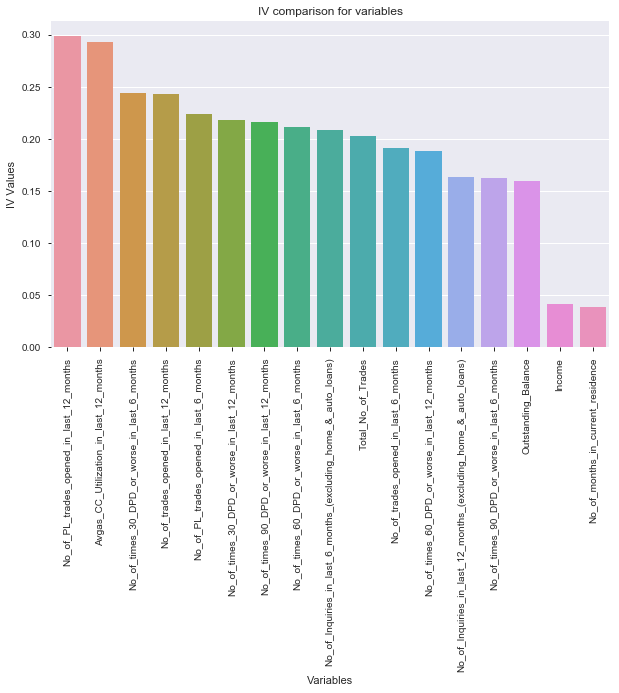

In [303]:
## plotting all the consolidated IV values of the Master dataset
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Variable', y='IV', data=master_imp.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('IV comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

In [62]:
#Building a new dataset with WOE values called df_master_woe

#copy of master data
df_master_woe = pd.DataFrame(df_master_2).copy()

#Replacing actual values with WOE variables, creating woe transformed master dataset
#Binned data
for var in master_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        df_master_woe[var] = df_master_woe[var].replace(range(left,right),row.WoE)
        
#Non-Binned data
for var in master_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        df_master_woe[var] = df_master_woe[var].replace(row.Cutoff,row.WoE)        

In [63]:
df_master_woe.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
0  0.074011 -0.031600                                     0.003972   
1 -0.026684  0.009961                                     0.003972   
2 -0.026684  0.009961                                    -0.022652   
3  0.021609  0.009961                                     0.003972   
4 -0.026684 -0.031600                                     0.003972   

   No_of_dependents    Income  Education  Profession_  Type_of_residence  \
0          0.085864  0.273490  -0.016619     0.029114           0.004217   
1          0.026213  0.391775   0.018719     0.013872           0.004217   
2          0.085864  0.189103  -0.016619     0.013872           0.004217   
3         -0.039511  0.391775  -0.016619    -0.093815           0.004217   
4         -0.007785  0.273490   0.018719     0.029114           0.004217   

   No_of_months_in_current_residence  No_of_months_in_current_company  ...  \
0                          -0.031094                         0.204942  ...   
1                          -0.031094                         0.080774  ...   
2                           0.126481                         0.080774  ...   
3                          -0.048887                         0.204942  ...   
4                          -0.031094                         0.080774  ...   

   No_of_trades_opened_in_last_6_months  \
0                              0.480293   
1                              0.480293   
2                              0.654533   
3                              0.480293   
4                              0.654533   

   No_of_trades_opened_in_last_12_months  \
0                               0.674533   
1                               0.674533   
2                               0.674533   
3                               0.674533   
4                               0.674533   

   No_of_PL_trades_opened_in_last_6_months  \
0                                 0.648455   
1                                 0.648455   
2                                 0.648455   
3                                 0.648455   
4                                 0.648455   

   No_of_PL_trades_opened_in_last_12_months  \
0                                  0.892278   
1                                  0.892278   
2                                  0.892278   
3                                  0.892278   
4                                  0.892278   

   No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
0                                           0.716909                
1                                           0.716909                
2                                           0.716909                
3                                           0.716909                
4                                           0.716909                

   No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
0                                           0.497666                 
1                                           0.497666                 
2                                           0.497666                 
3                                           0.497666                 
4                                           0.497666                 

   Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
0                    0.237232             0.823144            0.542088   
1                   -0.071917             0.185654            0.542088   
2                    0.237232             0.823144            0.542088   
3                    0.237232            -0.340410            0.542088   
4                    0.237232             0.823144            0.542088   

   Presence_of_open_auto_loan  
0                   -0.012046  
1                   -0.012046  
2                   -0.012046  
3                    0.139116  
4                   -0.012046  

[5 rows x 28 columns]

## WOE transformation for Rejected applicants from Demographic Dataset

In [64]:
# lets check null values column wise
df_rej_demogph_application.isnull().sum().sort_values(ascending = False)

Performance_Tag                                1425
No_of_months_in_current_company                   0
No_of_months_in_current_residence                 0
Type_of_residence                                 0
Profession_                                       0
Education                                         0
Income                                            0
No_of_dependents                                  0
Marital_Status_(at_the_time_of_application)       0
Gender                                            0
Age                                               0
Application_ID                                    0
dtype: int64

In [65]:
# Making "Performance Tag" as 1 as all these records are assumed to be defaulters 
df_rej_demogph_application["Performance_Tag"] = df_rej_demogph_application["Performance_Tag"].replace(np.nan,1)

In [66]:
#droping Application ID
df_rej_demogph_application_2 = df_rej_demogph_application.drop('Application_ID',axis = 1)

In [67]:
#Considering Columns having more than 15 unique values for binning
#demographic data
rejected_demo_bins = []

rejected_demo_cols =df_rej_demogph_application_2.columns
for i in rejected_demo_cols:
    if df_rej_demogph_application_2[i].nunique() > 15:
        rejected_demo_bins.append(i)
        
#Non-binned variables

rejected_demo_vars = df_rej_demogph_application_2.columns.difference(rejected_demo_bins)
        

In [68]:
#Building a new dataset with WOE values called df_rej_demogph_application_2

#copy of demo data
df_rej_demogph_application_woe = pd.DataFrame(df_rej_demogph_application_2).copy()

for var in rejected_demo_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        df_rej_demogph_application_woe[var] = df_rej_demogph_application_woe[var].replace(range(left,right),row.WoE)
        
#Non-Binned data
for var in rejected_demo_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        df_rej_demogph_application_woe[var] = df_rej_demogph_application_woe[var].replace(row.Cutoff,row.WoE)        

In [69]:
# woe transformed dataset
df_rej_demogph_application_woe.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
69603 -0.026684  0.009961                                    -0.022652   
69604  0.074011 -0.031600                                     0.003972   
69605  0.021609  0.009961                                     0.003972   
69606 -0.071111  0.009961                                     0.003972   
69607  0.021609 -0.031600                                     0.003972   

       No_of_dependents    Income  Education  Profession_  Type_of_residence  \
69603         -0.039511 -0.330435  -0.016619     0.029114           0.004217   
69604          0.026213 -0.129160  -0.007375    -0.093815           0.004217   
69605         -0.053314 -0.129160   0.018719    -0.093815           0.004217   
69606         -0.053314 -0.081935  -0.007375     0.029114           0.004217   
69607          0.026213 -0.081935   0.019216     0.029114           0.004217   

       No_of_months_in_current_residence  No_of_months_in_current_company  \
69603                          -0.421021                        -0.160923   
69604                          -0.031094                         0.017143   
69605                           0.148743                         0.017143   
69606                           0.148743                         0.080774   
69607                           0.148743                         0.080774   

       Performance_Tag  
69603              1.0  
69604              1.0  
69605              1.0  
69606              1.0  
69607              1.0

## WOE transformation for Rejected applicants from Master Dataset

In [70]:
# lets check null values column wise
df_rejected_demogph_application_master.isnull().sum().sort_values(ascending = False)

Performance_Tag_y                                                  1425
Performance_Tag_x                                                  1425
Avgas_CC_Utilization_in_last_12_months                               35
No_of_times_60_DPD_or_worse_in_last_6_months                          0
Age                                                                   0
Gender                                                                0
Marital_Status_(at_the_time_of_application)                           0
No_of_dependents                                                      0
Income                                                                0
Education                                                             0
Profession_                                                           0
Type_of_residence                                                     0
No_of_months_in_current_residence                                     0
No_of_months_in_current_company                                 

In [71]:
# Making "Performance Tag" as 1 as all these records are assumed to be defaulters 
df_rejected_demogph_application_master.drop("Performance_Tag_y",axis =1 , inplace = True)
df_rejected_demogph_application_master["Performance_Tag"] = df_rejected_demogph_application_master["Performance_Tag_x"].replace(np.nan,1)
df_rejected_demogph_application_master.drop("Performance_Tag_x",axis =1 , inplace = True)
df_rejected_demogph_application_master.loc[df_rejected_demogph_application_master["Avgas_CC_Utilization_in_last_12_months"].isnull(),"Avgas_CC_Utilization_in_last_12_months"] = 0

#droping Application ID
df_rejected_demogph_application_master_2 = df_rejected_demogph_application_master.drop('Application_ID',axis = 1)



In [72]:
#Considering Columns having more than 15 unique values for binning demographic data

rejected_master_bins = []


rejected_master_cols =df_rejected_demogph_application_master_2.columns
for i in rejected_master_cols:
    if df_rejected_demogph_application_master_2[i].nunique() > 15:
        rejected_master_bins.append(i)
        
#Non-binned variables

rejected_master_vars = df_rejected_demogph_application_master_2.columns.difference(rejected_master_bins)


## Model Building on WOE Transformed Demographics DataSet

### Train / Test Split

In [73]:
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [74]:
# Putting feature variable to X
X = df_demogph_application_woe.drop(['Performance_Tag','Application_ID'],axis=1)

# Putting response variable to y
y = df_demogph_application_woe['Performance_Tag']

# Please note, we do not need data scaling here as the data is already scaled

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# lets save all the variable except the target variable
df_col = df_demogph_application_woe.drop(['Performance_Tag','Application_ID'],1).columns

### Logistic Regression

In [75]:
# Default logistic regression model
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8549.9
Date:                Mon, 02 Mar 2020   Deviance:                       17100.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1193      0.023   -135.606      0.000      -3.164      -3.074
Age                                            -0.0001      0.003     -0.042      0.967      -0.006       0.006
Gender                                         -0.8451      1.251     -0.676      0.499      -3.296       1.606
Marital_Status_(at_the_time_of_application)    -1.2629      2.313     -0.546      0.585      -5.795       3.270
No_of_dependents                               -1.3256      0.442     -3.001      0.003      -2.191      -0.460
Income                                         -0.0024      0.005     -0.485      0.627      -0.012       0.007
Education                                      -1.4251      0.713     -2.000      0.046      -2.822      -0.028
Profession_                                    -0.7540      0.468     -1.611      0.107      -1.671       0.163
Type_of_residence                              -1.6534      0.887     -1.863      0.062      -3.393       0.086
No_of_months_in_current_residence               0.0074      0.003      2.692      0.007       0.002       0.013
No_of_months_in_current_company                -0.9998      0.165     -6.062      0.000      -1.323      -0.677
===============================================================================================================
"""

##### Inferences :

p-value of the feauture Age is high, lets drop it and re create the model

In [76]:
df_col = df_col.drop('Age', 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48899
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8549.9
Date:                Mon, 02 Mar 2020   Deviance:                       17100.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1195      0.023   -136.543      0.000      -3.164      -3.075
Gender                                         -0.8451      1.251     -0.676      0.499      -3.296       1.606
Marital_Status_(at_the_time_of_application)    -1.2655      2.312     -0.547      0.584      -5.796       3.265
No_of_dependents                               -1.3258      0.442     -3.001      0.003      -2.192      -0.460
Income                                         -0.0024      0.005     -0.485      0.628      -0.012       0.007
Education                                      -1.4254      0.713     -2.000      0.045      -2.822      -0.029
Profession_                                    -0.7539      0.468     -1.611      0.107      -1.671       0.163
Type_of_residence                              -1.6537      0.887     -1.864      0.062      -3.393       0.086
No_of_months_in_current_residence               0.0074      0.003      2.692      0.007       0.002       0.013
No_of_months_in_current_company                -0.9999      0.165     -6.062      0.000      -1.323      -0.677
===============================================================================================================
"""

##### Inferences :

p-value of the feauture Income is high, lets drop it and re create the model

In [77]:
df_col = df_col.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48900
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8550.0
Date:                Mon, 02 Mar 2020   Deviance:                       17100.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1212      0.023   -138.185      0.000      -3.165      -3.077
Gender                                         -0.8453      1.251     -0.676      0.499      -3.297       1.606
Marital_Status_(at_the_time_of_application)    -1.2721      2.312     -0.550      0.582      -5.803       3.259
No_of_dependents                               -1.3270      0.442     -3.004      0.003      -2.193      -0.461
Education                                      -1.4284      0.713     -2.005      0.045      -2.825      -0.032
Profession_                                    -0.7544      0.468     -1.612      0.107      -1.671       0.163
Type_of_residence                              -1.6538      0.888     -1.863      0.062      -3.394       0.086
No_of_months_in_current_residence               0.0074      0.003      2.692      0.007       0.002       0.013
No_of_months_in_current_company                -0.9990      0.165     -6.057      0.000      -1.322      -0.676
===============================================================================================================
"""

##### Inferences :

p-value of the feauture Marital_Status_(at_the_time_of_application) is high, lets drop it and re create the model

In [78]:
df_col = df_col.drop(['Marital_Status_(at_the_time_of_application)'], 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48901
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8550.2
Date:                Mon, 02 Mar 2020   Deviance:                       17100.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1211      0.023   -138.188      0.000      -3.165      -3.077
Gender                               -0.8474      1.251     -0.678      0.498      -3.299       1.604
No_of_dependents                     -1.3301      0.442     -3.010      0.003      -2.196      -0.464
Education                            -1.4256      0.712     -2.001      0.045      -2.822      -0.029
Profession_                          -0.7546      0.468     -1.613      0.107      -1.672       0.163
Type_of_residence                    -1.6796      0.890     -1.887      0.059      -3.424       0.064
No_of_months_in_current_residence     0.0074      0.003      2.695      0.007       0.002       0.013
No_of_months_in_current_company      -0.9977      0.165     -6.050      0.000      -1.321      -0.674
=====================================================================================================
"""

##### Inferences :

p-value of the feauture Gender is high, lets drop it and re create the model

In [79]:
df_col = df_col.drop(['Gender'], 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48902
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8550.4
Date:                Mon, 02 Mar 2020   Deviance:                       17101.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1212      0.023   -138.192      0.000      -3.165      -3.077
No_of_dependents                     -1.3290      0.442     -3.008      0.003      -2.195      -0.463
Education                            -1.4237      0.712     -1.999      0.046      -2.820      -0.028
Profession_                          -0.7580      0.468     -1.620      0.105      -1.675       0.159
Type_of_residence                    -1.6808      0.890     -1.888      0.059      -3.425       0.064
No_of_months_in_current_residence     0.0074      0.003      2.698      0.007       0.002       0.013
No_of_months_in_current_company      -0.9979      0.165     -6.051      0.000      -1.321      -0.675
=====================================================================================================
"""

##### Inferences :

p-value of the feauture Profession_ is high, lets drop it and re create the model

In [80]:
# p-value of the feauture Profession is high, lets drop it and re build the model
df_col = df_col.drop('Profession_', 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48903
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8551.7
Date:                Mon, 02 Mar 2020   Deviance:                       17103.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1214      0.023   -138.215      0.000      -3.166      -3.077
No_of_dependents                     -1.3271      0.442     -3.003      0.003      -2.193      -0.461
Education                            -1.4187      0.712     -1.992      0.046      -2.815      -0.023
Type_of_residence                    -1.5976      0.879     -1.817      0.069      -3.321       0.126
No_of_months_in_current_residence     0.0074      0.003      2.704      0.007       0.002       0.013
No_of_months_in_current_company      -0.9991      0.165     -6.059      0.000      -1.322      -0.676
=====================================================================================================
"""

##### Inferences :

p-value of the feauture Type_of_residence is high, lets drop it and re create the model

In [81]:
# p-value of the feauture Type of residence is high, lets drop it and re create the model
df_col = df_col.drop('Type_of_residence', 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48909
Model:                            GLM   Df Residuals:                    48904
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8553.6
Date:                Mon, 02 Mar 2020   Deviance:                       17107.
Time:                        18:54:06   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1211      0.023   -138.269      0.000      -3.165      -3.077
No_of_dependents                     -1.3364      0.442     -3.023      0.003      -2.203      -0.470
Education                            -1.4287      0.713     -2.004      0.045      -2.826      -0.032
No_of_months_in_current_residence     0.0074      0.003      2.708      0.007       0.002       0.013
No_of_months_in_current_company      -1.0009      0.165     -6.070      0.000      -1.324      -0.678
=====================================================================================================
"""

In [82]:
# p-values looks good now, lets check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[df_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[df_col].values, i) for i in range(X_train[df_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                   No_of_dependents  1.0
1                          Education  1.0
2  No_of_months_in_current_residence  1.0
3    No_of_months_in_current_company  1.0

In [83]:
# VIF also looks good , lets make predictions now on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

53586    0.036947
43814    0.035697
24864    0.041565
36645    0.050201
19025    0.050234
32049    0.035842
34284    0.042855
5295     0.042047
6910     0.042256
32991    0.040832
dtype: float64

In [84]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03694725, 0.03569675, 0.04156486, 0.05020108, 0.05023379,
       0.03584213, 0.04285508, 0.04204747, 0.04225562, 0.04083167])

In [85]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance_Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

Performance_Tag  probability  Application ID
0              0.0     0.036947           53586
1              0.0     0.035697           43814
2              0.0     0.041565           24864
3              0.0     0.050201           36645
4              0.0     0.050234           19025

In [86]:
## making the predictions based on the probability with the cut-off value as 0.1
## this cut-off value will be tuned later

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

Performance_Tag  probability  Application ID  predicted
0              0.0     0.036947           53586          0
1              0.0     0.035697           43814          0
2              0.0     0.041565           24864          0
3              0.0     0.050201           36645          0
4              0.0     0.050234           19025          0

In [87]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final["Performance_Tag"], y_train_pred_final["predicted"])
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train_pred_final["Performance_Tag"],y_train_pred_final["predicted"])) 
print("Precision:",precision_score(y_train_pred_final["Performance_Tag"],y_train_pred_final["predicted"]))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))   


print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[46777    59]
 [ 2068     5]]

Accuracy:0.957
Recall/Sensitivity: 0.00241196333815726
Precision: 0.078125
Specificity:0.999
AUC: 0.5452568696666802


##### Inferences :

Accuracy is good, but the sensitivity is too low on the training dataset.

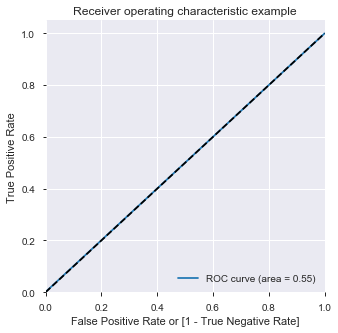

In [88]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance_Tag"], y_train_pred_final.predicted, 
                                         drop_intermediate = False )

auc_score = metrics.roc_auc_score( y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [89]:
# Find optimal cutoff probablity, let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Performance_Tag  probability  Application ID  predicted  0.0  0.1  0.2  \
0              0.0     0.036947           53586          0    1    0    0   
1              0.0     0.035697           43814          0    1    0    0   
2              0.0     0.041565           24864          0    1    0    0   
3              0.0     0.050201           36645          0    1    0    0   
4              0.0     0.050234           19025          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance_Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi    speci
0.0   0.0  0.042385  1.000000  0.00000
0.1   0.1  0.956511  0.002412  0.99874
0.2   0.2  0.957615  0.000000  1.00000
0.3   0.3  0.957615  0.000000  1.00000
0.4   0.4  0.957615  0.000000  1.00000
0.5   0.5  0.957615  0.000000  1.00000
0.6   0.6  0.957615  0.000000  1.00000
0.7   0.7  0.957615  0.000000  1.00000
0.8   0.8  0.957615  0.000000  1.00000
0.9   0.9  0.957615  0.000000  1.00000


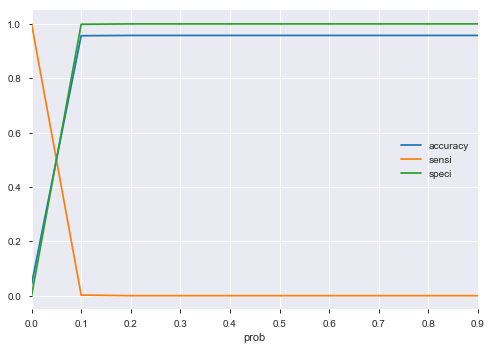

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:

# let's make prediction using cut off point equal to 0.05 on train data set
from sklearn.metrics import precision_recall_curve

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

Performance_Tag  probability  Application ID  predicted  0.0  0.1  0.2  \
0              0.0     0.036947           53586          0    1    0    0   
1              0.0     0.035697           43814          0    1    0    0   
2              0.0     0.041565           24864          0    1    0    0   
3              0.0     0.050201           36645          0    1    0    0   
4              0.0     0.050234           19025          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0                0  
3    0    0    0    0    0    0    0                1  
4    0    0    0    0    0    0    0                1

In [93]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built


confusion = metrics.confusion_matrix(y_train_pred_final["Performance_Tag"], y_train_pred_final["final_predicted"] )
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["final_predicted"] )) 
print("Precision:",precision_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["final_predicted"] ))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))   


print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[38456  8380]
 [ 1599   474]]

Accuracy:0.796
Recall/Sensitivity: 0.22865412445730826
Precision: 0.053535125367065735
Specificity:0.821
AUC: 0.5452568696666802


##### Inferences :

After finding the cutoff probabilty, even though accuracy dropped a bit but sensitivity improved. but sensitivity is still too low to consider this as a good model.

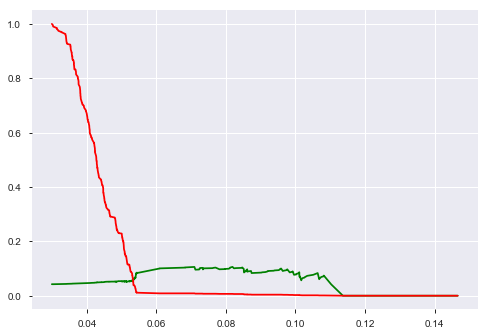

In [94]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final["Performance_Tag"], y_train_pred_final.probability)
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Inferences :

We have a good accuracy from the model built, but Sensitivity is very low which is of importance in this project. We can say that the predictive power of this model is not very good based on our results from the trainging dataset.

### Predictions on test data set

In [95]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[df_col])

## making prediction probabilities
y_test_pred = res.predict(X_test_sm)
## checking values
y_test_pred[:10]

49053    0.053282
65736    0.035792
28775    0.053356
65371    0.054036
11095    0.042101
30592    0.046572
45445    0.053022
55786    0.033914
59422    0.035846
568      0.030280
dtype: float64

In [96]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance_Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application_ID'] = y_test.index
y_test_pred_final.head()

Performance_Tag  probability  Application_ID
49053              0.0     0.053282           49053
65736              0.0     0.035792           65736
28775              0.0     0.053356           28775
65371              0.0     0.054036           65371
11095              0.0     0.042101           11095

In [97]:
# Create new column 'predicted' with 1 if probability > 0.05 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

Performance_Tag  probability  Application_ID  predicted
49053              0.0     0.053282           49053          1
65736              0.0     0.035792           65736          0
28775              0.0     0.053356           28775          1
65371              0.0     0.054036           65371          1
11095              0.0     0.042101           11095          0

In [98]:


confusion = metrics.confusion_matrix(y_test_pred_final["Performance_Tag"], y_test_pred_final["predicted"])
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test_pred_final["Performance_Tag"], y_test_pred_final["predicted"])) 
print("Precision:",precision_score(y_test_pred_final["Performance_Tag"], y_test_pred_final["predicted"]))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))    

Confusion Metrics:
 [[16470  3616]
 [  693   182]]

Accuracy:0.794
Recall/Sensitivity: 0.208
Precision: 0.047919957872564506
Specificity:0.82


##### Inferences :

Sensitivity and Precision dropped even further on the test dataset.

### Regularized Logistic Regression on demographic dataset

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Putting feature variable to X
X = df_demogph_application_woe.drop(['Performance_Tag','Application_ID'],axis=1)

# Putting response variable to y
y = df_demogph_application_woe['Performance_Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# set up cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

## using Logistic regression for class imbalance, class_weight = balanced will take care of class imbalance in the dataset
model = LogisticRegression(class_weight='balanced')
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   11.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

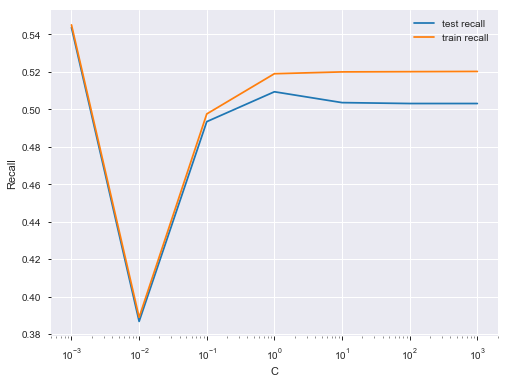

In [100]:
## segerigating results for L1 and L2 regression and plotting them differently

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results_penalty_l1 = cv_results.loc[cv_results['param_penalty']=='l1']
cv_results_penalty_l2 = cv_results.loc[cv_results['param_penalty']=='l2']

## plotting results for Logistic regression with L1 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_test_score'])
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

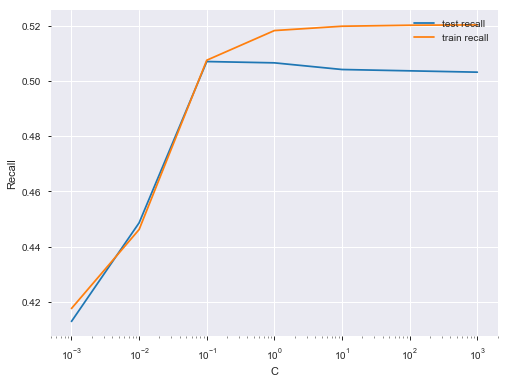

In [101]:
## plotting results for Logistic regression with L2 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_test_score'])
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

In [102]:
## checking best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.5436580966492724 at {'C': 0.001, 'penalty': 'l1'}


In [103]:
## preparing final model based on best score
model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced')
model.fit(X_train,y_train)

# predictions on training dataset
y_train_pred = model.predict(X_train)

In [104]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built on traiing dataset


confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))    

Confusion Metrics:
 [[17598 29238]
 [  942  1131]]

Accuracy:0.383
Recall/Sensitivity: 0.5455861070911722
Precision: 0.03724192433073199
Specificity:0.376


##### Inferences :

Above logistic regression model with hyper parameter tuning have also not produced good results. Sensitivity is slightly higher than 50% which needs to be improved.

Lets try other Modelling Technique other than Logistics Regressio

### Decision Tree Model

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [106]:
# Putting feature variable to X
X = df_demogph_application_woe.drop(['Performance_Tag'],axis=1)

# Putting response variable to y
y = df_demogph_application_woe['Performance_Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [107]:
# lets create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [108]:
# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)

# Printing classification report
print(classification_report(y_train, y_train_pred))



              precision    recall  f1-score   support

         0.0       0.97      0.47      0.64     46836
         1.0       0.05      0.65      0.10      2073

    accuracy                           0.48     48909
   macro avg       0.51      0.56      0.37     48909
weighted avg       0.93      0.48      0.61     48909



In [109]:
# performance metrics on training dataset


confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))    

Confusion Metrics:
 [[22124 24712]
 [  716  1357]]

Accuracy:0.48
Recall/Sensitivity: 0.6546068499758804
Precision: 0.05205416394951858
Specificity:0.472


In [110]:
# predictions on the test dataset
y_test_pred= dt_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.47      0.63     20086
         1.0       0.05      0.64      0.09       875

    accuracy                           0.47     20961
   macro avg       0.51      0.55      0.36     20961
weighted avg       0.93      0.47      0.61     20961



In [111]:
# performance metrics
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))    


Confusion Metrics:
 [[ 9353 10733]
 [  319   556]]

Accuracy:0.473
Recall/Sensitivity: 0.6354285714285715
Precision: 0.04925148374523873
Specificity:0.466


#### Hyperparameter Tuning

In [112]:
import os
from sklearn.model_selection import KFold


In [113]:
# Tuning Max Depth parameter

# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 101)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   40.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=101,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_j

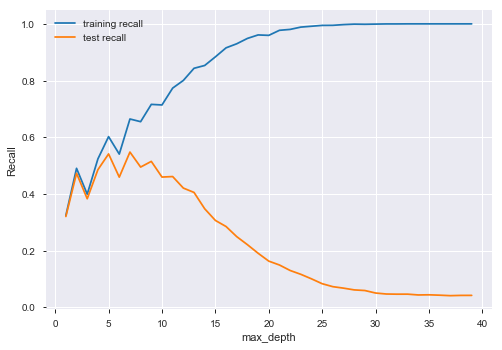

In [114]:
# plotting accuracies with max_depth

scores = tree.cv_results_
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences :

Increasing the value of max_depth, both training and test score increase till about max-depth = 8, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.


In [115]:
# Tuning min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

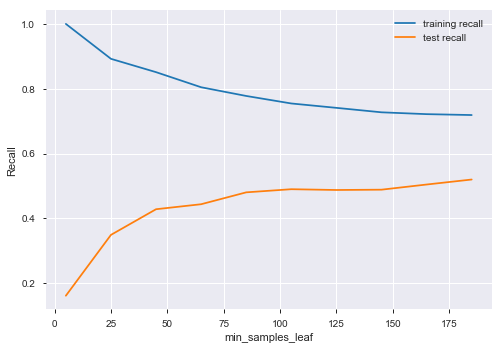

In [116]:
scores = tree.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences :

Low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

In [117]:
# Tuning Min Sample Split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

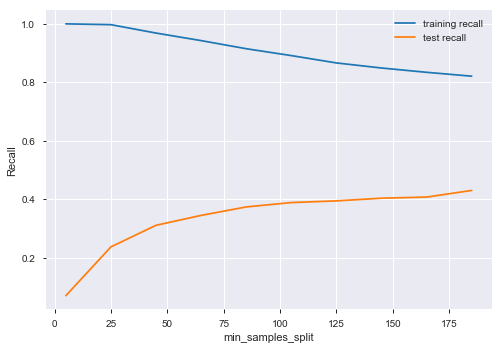

In [118]:
scores = tree.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences :

Increase in min_samples_split, the tree overfits lesser since the model is less complex.

In [119]:
# Grid Search to Find Optimal Hyperparameters

# Create the parameter grid 
param_grid = {
    'max_depth': [4,5,6,7,8,9],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          scoring="recall", cv = n_folds,
                          return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
             

In [120]:
# printing the optimal recall score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.515644507201618
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [121]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight='balanced',
                                  criterion='entropy', 
                                  max_depth=4, 
                                  min_samples_leaf=200,
                                  min_samples_split=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
# classification metrics - training dataset
from sklearn.metrics import classification_report,confusion_matrix
y_train_pred = clf_entropy.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.83     46836
         1.0       0.06      0.39      0.10      2073

    accuracy                           0.71     48909
   macro avg       0.51      0.55      0.46     48909
weighted avg       0.93      0.71      0.80     48909



In [123]:
# performance metrics

confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))    

Confusion Metrics:
 [[33891 12945]
 [ 1273   800]]

Accuracy:0.709
Recall/Sensitivity: 0.3859141341051616
Precision: 0.05820298290287377
Specificity:0.724


In [124]:
# classification metrics
y_test_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82     20086
         1.0       0.06      0.39      0.10       875

    accuracy                           0.70     20961
   macro avg       0.51      0.56      0.46     20961
weighted avg       0.93      0.70      0.79     20961



In [125]:
# performance metrics
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))    

Confusion Metrics:
 [[14415  5671]
 [  531   344]]

Accuracy:0.704
Recall/Sensitivity: 0.3931428571428571
Precision: 0.057190357439733996
Specificity:0.718


##### Inferences :

Accuracy and recall are now decent for the decision tree model on demographic dataset

### Random Forest Model

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Putting feature variable to X
X = df_demogph_application_woe.drop(['Performance_Tag','Application_ID'],axis=1)

# Putting response variable to y
y = df_demogph_application_woe['Performance_Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [128]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [129]:
# predictions on test data
y_train_pred = rfc.predict(X_train)

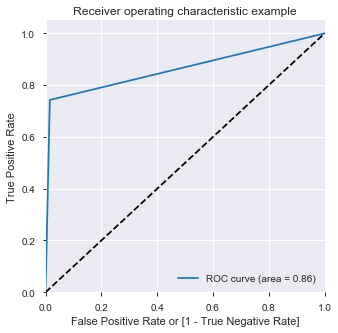

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred, drop_intermediate = False )


fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred,
                                          drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train, y_train_pred )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [131]:
# Let's check the report of our default model
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     46836
         1.0       0.68      0.74      0.71      2073

    accuracy                           0.97     48909
   macro avg       0.84      0.86      0.85     48909
weighted avg       0.98      0.97      0.98     48909



In [132]:
# performance metrics
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))  

Confusion Metrics:
 [[46126   710]
 [  533  1540]]

Accuracy:0.975
Recall/Sensitivity: 0.7428847081524361
Precision: 0.6844444444444444
Specificity:0.985


##### Inferences :

Got a good Accuracy & decent Sensitivity(recall) on the training dataset. lets now check the test dataset.

In [133]:
# predictions on test data
y_test_pred = rfc.predict(X_test)

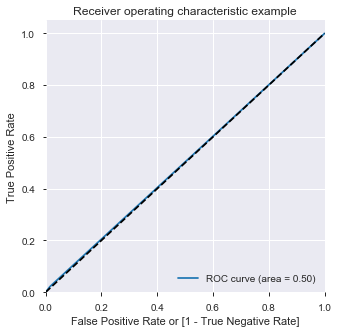

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_test_pred )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [135]:
# Let's check the report of our default model
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     20086
         1.0       0.06      0.02      0.03       875

    accuracy                           0.94     20961
   macro avg       0.51      0.50      0.50     20961
weighted avg       0.92      0.94      0.93     20961



In [136]:
# performance metrics

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))  

Confusion Metrics:
 [[19775   311]
 [  856    19]]

Accuracy:0.944
Recall/Sensitivity: 0.021714285714285714
Precision: 0.05757575757575758
Specificity:0.985


##### Inferences :

Accuracy dropped a bit on the test dataset, Sensitivity(recall) has dropped drastically on the test dataset, lets tune the hyperparameters and create a final RF model

#### Hyperparameter Tuning

In [137]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

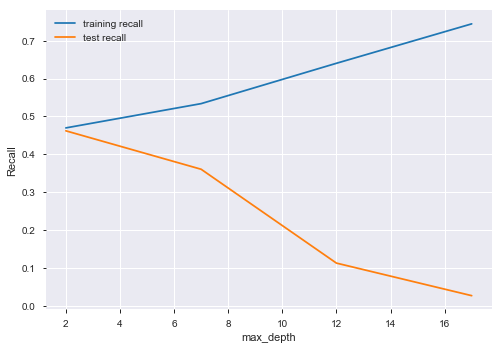

In [138]:
# plotting accuracies with max_depth

scores = rf.cv_results_

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences

As increase the value of max_depth, train scores keep increasing, but test score keep decreasing. The ensemble tries to overfit as we increase the max_depth. Ccontrolling the depth of the constituent trees will help reduce overfitting in the forest. We are getting the best test score at max depth = 7

In [139]:
# Tuning n_estimators
# Let's try to find the optimum values for n_estimators and understand how the value of n_estimators 
# impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced",max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

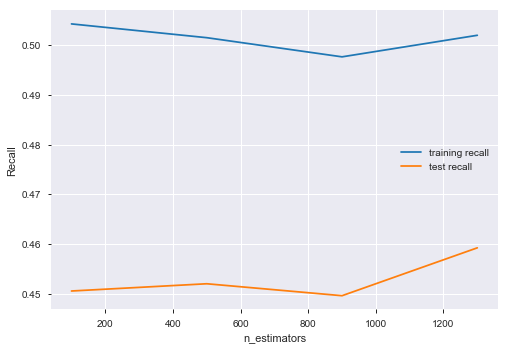

In [140]:
# plotting accuracies with n_estimators
# scores of GridSearch CV
scores = rf.cv_results_


plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences

Training score is almost constant for all the different values of n estimators Test score increases first and then starts decreasing We are getting the best test score with n_estimators = 500

In [141]:
# Let's see how the model performance varies with max_features, which is the maximum numbre of features considered 
# for splitting at a node.
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5,10]}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced",max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

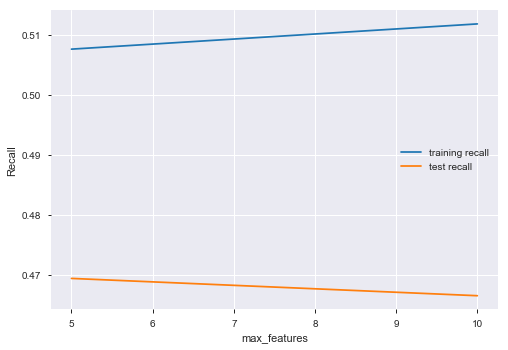

In [142]:
# plotting accuracies with max_features
# scores of GridSearch CV
scores = rf.cv_results_


plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


##### Inferences

Training Recall increases as max features increases. Traing score decreases as max feature decreases best Test score is with max features = 5. Tree seems to be overfitting for the higher values of max features

In [143]:
# Tuning min_samples_leaf
# The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

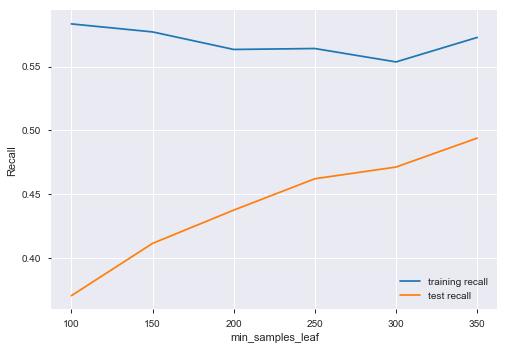

In [144]:
# plotting accuracies with min_samples_leaf
# scores of GridSearch CV
scores = rf.cv_results_

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences:

Trainig recall is constant for all the different values of the min sample leaf. Test recall increases as the valye of sample leaf increases Best recall is achieved at the valu of 350

In [145]:
# Tuning min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

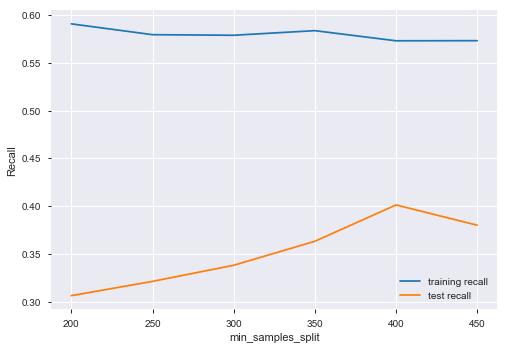

In [146]:
# plotting accuracies with min_samples_split
# scores of GridSearch CV
scores = rf.cv_results_


plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences:

Trainig recall is constant for all the different values of the min sample leaf Test recall increases as the valye of sample split increases and becomes constant for values higher than 350 Best recall is achieved at the valu of 350

In [147]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,7,9],
    'n_estimators': [500,700,900],
    'max_features': [5, 10],
    'min_samples_leaf': [300,400],
    'min_samples_split': [300,400]  
}
# Create a based model
# class_weight="balanced" will take care of the class imbalance in the dataset
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="recall",return_train_score=True)

In [148]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 17.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [149]:
# printing the optimal recall score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.48046309696092615 using {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 400, 'min_samples_split': 300, 'n_estimators': 700}


In [150]:
# model with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=5,
                             min_samples_leaf=400, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=900)

In [151]:
# model fit 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=400,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [152]:
# predict
predictions = rf.predict(X_train)

In [153]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76     46836
         1.0       0.06      0.53      0.11      2073

    accuracy                           0.62     48909
   macro avg       0.51      0.58      0.43     48909
weighted avg       0.93      0.62      0.73     48909



In [154]:
# performance metrics

confusion = metrics.confusion_matrix(y_train, predictions)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, predictions)) 
print("Precision:",precision_score(y_train, predictions))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[29242 17594]
 [  982  1091]]

Accuracy:0.62
Recall/Sensitivity: 0.5262904003859141
Precision: 0.05838908215145839
Specificity:0.624


##### Inferences:

With decent accuracy and precision on the training dataset with best hyper parameters.

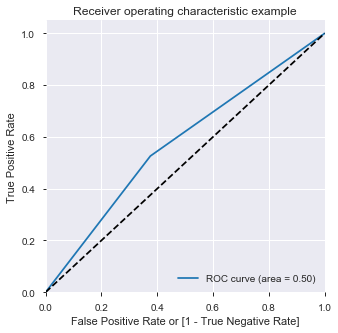

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, predictions, drop_intermediate = False )


plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [156]:
# predict
predictions_test = rf.predict(X_test)

In [157]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76     20086
         1.0       0.05      0.49      0.10       875

    accuracy                           0.62     20961
   macro avg       0.51      0.56      0.43     20961
weighted avg       0.93      0.62      0.73     20961



In [158]:

print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, predictions_test)) 
print("Precision:",precision_score(y_test, predictions_test))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[29242 17594]
 [  982  1091]]

Accuracy:0.62
Recall/Sensitivity: 0.49028571428571427
Precision: 0.05332504661280298
Specificity:0.624


##### Inferences :

Even though accuracy & recall is less than that of the training dataset but there is a very good improvement in the numbers as comparison to default random forest model built earlier.

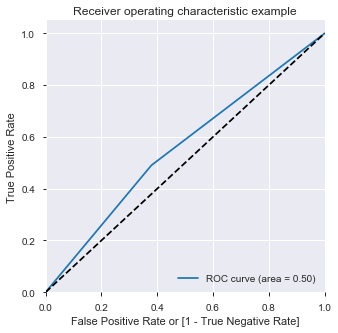

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, predictions_test, drop_intermediate = False )

plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Summarising Conclusion: 

1. All the models built on the demographics dataset seems to have week predictive power.
2. Best Recall we have got is from the Random Forest Model which is around 54% on the training dataset and 49% on the test dataset. This obviously can not be considered to be a good model.

## Model Building on Master DataSet (WOE)

### Logistic Regression

In [160]:
# lets check the dimensions of the woe transformed master dataset
df_master_woe.shape

(69876, 28)

In [161]:
df_master_woe.describe()

Age        Gender  \
count  69876.000000  69876.000000   
mean       0.884419      0.000144   
std        7.527564      0.017654   
min       -0.071111     -0.031600   
25%       -0.028169      0.009961   
50%        0.005016      0.009961   
75%        0.025909      0.009961   
max       65.000000      0.009961   

       Marital_Status_(at_the_time_of_application)  No_of_dependents  \
count                                 69876.000000      69876.000000   
mean                                      0.000041          0.001225   
std                                       0.009445          0.051959   
min                                      -0.022652         -0.053314   
25%                                       0.003972         -0.039511   
50%                                       0.003972         -0.007785   
75%                                       0.003972          0.026213   
max                                       0.003972          0.085864   

             Income     Education   Profession_  Type_of_residence  \
count  69876.000000  69876.000000  69876.000000       69876.000000   
mean       0.749657      0.000323      0.001063           0.000443   
std        4.886322      0.025393      0.047745           0.032713   
min       -0.500000     -0.492048     -0.093815          -0.078919   
25%       -0.081935     -0.007375      0.013872           0.004217   
50%        0.089466     -0.007375      0.029114           0.004217   
75%        0.273490      0.018719      0.029114           0.004217   
max       60.000000      0.019216      0.029114           0.531116   

       No_of_months_in_current_residence  No_of_months_in_current_company  \
count                       69876.000000                     69876.000000   
mean                            0.268427                         0.010293   
std                             5.636707                         0.521057   
min                            -0.421021                        -2.428989   
25%                            -0.061538                        -0.160923   
50%                             0.148743                         0.017143   
75%                             0.148743                         0.080774   
max                           126.000000                       133.000000   

       ...  No_of_trades_opened_in_last_6_months  \
count  ...                          69876.000000   
mean   ...                              0.089591   
std    ...                              0.447348   
min    ...                             -0.523703   
25%    ...                             -0.331724   
50%    ...                             -0.068498   
75%    ...                              0.480293   
max    ...                              0.654533   

       No_of_trades_opened_in_last_12_months  \
count                           69876.000000   
mean                                0.117740   
std                                 0.548535   
min                                -0.563744   
25%                                -0.350548   
50%                                 0.081180   
75%                                 0.674533   
max                                28.000000   

       No_of_PL_trades_opened_in_last_6_months  \
count                             69876.000000   
mean                                  0.107257   
std                                   0.494974   
min                                  -0.437862   
25%                                  -0.423042   
50%                                  -0.199923   
75%                                   0.648455   
max                                   0.648455   

       No_of_PL_trades_opened_in_last_12_months  \
count                              69876.000000   
mean                                   0.147765   
std                                    0.594651   
min                                   -0.924912   
25%                                   -0.413561   
50%                                   -0.157147  

In [162]:
# lets display the woe transformed demographic dataset
df_master_woe.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
0  0.074011 -0.031600                                     0.003972   
1 -0.026684  0.009961                                     0.003972   
2 -0.026684  0.009961                                    -0.022652   
3  0.021609  0.009961                                     0.003972   
4 -0.026684 -0.031600                                     0.003972   

   No_of_dependents    Income  Education  Profession_  Type_of_residence  \
0          0.085864  0.273490  -0.016619     0.029114           0.004217   
1          0.026213  0.391775   0.018719     0.013872           0.004217   
2          0.085864  0.189103  -0.016619     0.013872           0.004217   
3         -0.039511  0.391775  -0.016619    -0.093815           0.004217   
4         -0.007785  0.273490   0.018719     0.029114           0.004217   

   No_of_months_in_current_residence  No_of_months_in_current_company  ...  \
0                          -0.031094                         0.204942  ...   
1                          -0.031094                         0.080774  ...   
2                           0.126481                         0.080774  ...   
3                          -0.048887                         0.204942  ...   
4                          -0.031094                         0.080774  ...   

   No_of_trades_opened_in_last_6_months  \
0                              0.480293   
1                              0.480293   
2                              0.654533   
3                              0.480293   
4                              0.654533   

   No_of_trades_opened_in_last_12_months  \
0                               0.674533   
1                               0.674533   
2                               0.674533   
3                               0.674533   
4                               0.674533   

   No_of_PL_trades_opened_in_last_6_months  \
0                                 0.648455   
1                                 0.648455   
2                                 0.648455   
3                                 0.648455   
4                                 0.648455   

   No_of_PL_trades_opened_in_last_12_months  \
0                                  0.892278   
1                                  0.892278   
2                                  0.892278   
3                                  0.892278   
4                                  0.892278   

   No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
0                                           0.716909                
1                                           0.716909                
2                                           0.716909                
3                                           0.716909                
4                                           0.716909                

   No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
0                                           0.497666                 
1                                           0.497666                 
2                                           0.497666                 
3                                           0.497666                 
4                                           0.497666                 

   Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
0                    0.237232             0.823144            0.542088   
1                   -0.071917             0.185654            0.542088   
2                    0.237232             0.823144            0.542088   
3                    0.237232            -0.340410            0.542088   
4                    0.237232             0.823144            0.542088   

   Presence_of_open_auto_loan  
0                   -0.012046  
1                   -0.012046  
2                   -0.012046  
3                    0.139116  
4                   -0.012046  

[5 rows x 28 columns]

In [163]:
df_master_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69876 entries, 0 to 69875
Data columns (total 28 columns):
Age                                                                69876 non-null float64
Gender                                                             69876 non-null float64
Marital_Status_(at_the_time_of_application)                        69876 non-null float64
No_of_dependents                                                   69876 non-null float64
Income                                                             69876 non-null float64
Education                                                          69876 non-null float64
Profession_                                                        69876 non-null float64
Type_of_residence                                                  69876 non-null float64
No_of_months_in_current_residence                                  69876 non-null float64
No_of_months_in_current_company                                    69876 non-null

In [164]:
# Putting feature variable to X
X = df_master_woe.drop(['Performance_Tag'],axis=1)

# Putting response variable to y
y = df_master_woe['Performance_Tag']

In [165]:
# lets check the X dataframe
X.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
0  0.074011 -0.031600                                     0.003972   
1 -0.026684  0.009961                                     0.003972   
2 -0.026684  0.009961                                    -0.022652   
3  0.021609  0.009961                                     0.003972   
4 -0.026684 -0.031600                                     0.003972   

   No_of_dependents    Income  Education  Profession_  Type_of_residence  \
0          0.085864  0.273490  -0.016619     0.029114           0.004217   
1          0.026213  0.391775   0.018719     0.013872           0.004217   
2          0.085864  0.189103  -0.016619     0.013872           0.004217   
3         -0.039511  0.391775  -0.016619    -0.093815           0.004217   
4         -0.007785  0.273490   0.018719     0.029114           0.004217   

   No_of_months_in_current_residence  No_of_months_in_current_company  ...  \
0                          -0.031094                         0.204942  ...   
1                          -0.031094                         0.080774  ...   
2                           0.126481                         0.080774  ...   
3                          -0.048887                         0.204942  ...   
4                          -0.031094                         0.080774  ...   

   No_of_trades_opened_in_last_6_months  \
0                              0.480293   
1                              0.480293   
2                              0.654533   
3                              0.480293   
4                              0.654533   

   No_of_trades_opened_in_last_12_months  \
0                               0.674533   
1                               0.674533   
2                               0.674533   
3                               0.674533   
4                               0.674533   

   No_of_PL_trades_opened_in_last_6_months  \
0                                 0.648455   
1                                 0.648455   
2                                 0.648455   
3                                 0.648455   
4                                 0.648455   

   No_of_PL_trades_opened_in_last_12_months  \
0                                  0.892278   
1                                  0.892278   
2                                  0.892278   
3                                  0.892278   
4                                  0.892278   

   No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
0                                           0.716909                
1                                           0.716909                
2                                           0.716909                
3                                           0.716909                
4                                           0.716909                

   No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
0                                           0.497666                 
1                                           0.497666                 
2                                           0.497666                 
3                                           0.497666                 
4                                           0.497666                 

   Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
0                    0.237232             0.823144            0.542088   
1                   -0.071917             0.185654            0.542088   
2                    0.237232             0.823144            0.542088   
3                    0.237232            -0.340410            0.542088   
4                    0.237232             0.823144            0.542088   

   Presence_of_open_auto_loan  
0                   -0.012046  
1                   -0.012046  
2                   -0.012046  
3                    0.139116  
4                   -0.012046  

[5 rows x 27 columns]

In [166]:
# lets check the y dataframe containing the target variable
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance_Tag, dtype: float64

In [167]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [168]:
X_train.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
26349  0.074011  0.009961                                     0.003972   
69356 -0.071111  0.009961                                    -0.022652   
36646 -0.028169  0.009961                                     0.003972   
19025 -0.028169  0.009961                                     0.003972   
32050 -0.028169  0.009961                                     0.003972   

       No_of_dependents    Income  Education  Profession_  Type_of_residence  \
26349         -0.053314  0.391775  -0.007375     0.029114           0.004217   
69356         -0.039511  4.500000  -0.007375     0.029114           0.004217   
36646         -0.039511 -0.129160   0.018719     0.029114           0.004217   
19025         -0.007785  0.089466   0.018719     0.029114           0.004217   
32050         -0.039511  0.391775  -0.016619     0.013872           0.004217   

       No_of_months_in_current_residence  No_of_months_in_current_company  \
26349                           0.148743                         0.204942   
69356                           0.126481                         0.017143   
36646                           0.148743                        -0.160923   
19025                           0.148743                        -0.160923   
32050                           0.148743                         0.080774   

       ...  No_of_trades_opened_in_last_6_months  \
26349  ...                              0.480293   
69356  ...                             -0.434323   
36646  ...                             -0.434323   
19025  ...                              0.654533   
32050  ...                              0.225258   

       No_of_trades_opened_in_last_12_months  \
26349                              -0.281059   
69356                              -0.563744   
36646                              -0.563744   
19025                               0.674533   
32050                               0.026417   

       No_of_PL_trades_opened_in_last_6_months  \
26349                                 0.648455   
69356                                -0.437862   
36646                                -0.437862   
19025                                 0.648455   
32050                                -0.423042   

       No_of_PL_trades_opened_in_last_12_months  \
26349                                  0.131747   
69356                                 -0.499094   
36646                                 -0.499094   
19025                                  0.892278   
32050                                 -0.377718   

       No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
26349                                          -0.215276                
69356                                          -0.554067                
36646                                           0.012166                
19025                                           0.716909                
32050                                           0.012166                

       No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
26349                                          -0.305174                 
69356                                          -0.520097                 
36646                                           0.086689                 
19025                                           0.497666                 
32050                                          -0.230639                 

       Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
26349                   -0.071917             0.185654           -0.393883   
69356                   -0.071917            -0.448664           -0.393883   
36646                   -0.071917            -0.448664           -0.566057   
19025                    0.237232             0.823144            0.542088   
32050                   -0.071917            -0.448664            0.817502   

       Presence_of_open_auto_loan  
26349                   

In [169]:
X_test.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
35289 -0.071111  0.009961                                     0.003972   
15905 -0.026684  0.009961                                     0.003972   
28776 -0.028169  0.009961                                     0.003972   
14027  0.074011 -0.031600                                     0.003972   
11095 -0.026684  0.009961                                     0.003972   

       No_of_dependents    Income  Education  Profession_  Type_of_residence  \
35289          0.026213  0.089466   0.018719     0.029114           0.004217   
15905         -0.039511  0.089466   0.018719     0.029114           0.004217   
28776         -0.039511  0.273490  -0.007375     0.029114           0.004217   
14027         -0.053314  0.189103   0.018719     0.029114           0.004217   
11095         -0.053314  0.273490  -0.016619    -0.093815           0.004217   

       No_of_months_in_current_residence  No_of_months_in_current_company  \
35289                           0.148743                         0.080774   
15905                           0.148743                         0.017143   
28776                           0.148743                        -0.160923   
14027                           0.148743                        -0.160923   
11095                           0.148743                        -0.160923   

       ...  No_of_trades_opened_in_last_6_months  \
35289  ...                             -0.331724   
15905  ...                              0.480293   
28776  ...                              0.480293   
14027  ...                              0.480293   
11095  ...                              0.654533   

       No_of_trades_opened_in_last_12_months  \
35289                               0.081180   
15905                               0.674533   
28776                               0.674533   
14027                               0.674533   
11095                               0.674533   

       No_of_PL_trades_opened_in_last_6_months  \
35289                                -0.437862   
15905                                 0.648455   
28776                                 0.648455   
14027                                 0.648455   
11095                                 0.648455   

       No_of_PL_trades_opened_in_last_12_months  \
35289                                 -0.377718   
15905                                  0.892278   
28776                                  0.892278   
14027                                  0.892278   
11095                                  0.892278   

       No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
35289                                           0.012166                
15905                                           0.716909                
28776                                          -0.177777                
14027                                           0.716909                
11095                                           0.716909                

       No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
35289                                          -0.017501                 
15905                                           0.497666                 
28776                                          -0.305174                 
14027                                           0.497666                 
11095                                           0.497666                 

       Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
35289                   -0.071917            -0.448664            0.018989   
15905                    0.237232             0.823144            0.542088   
28776                   -0.071917             0.185654            0.542088   
14027                    0.237232             0.823144            0.542088   
11095                   -0.071917             0.185654            0.542088   

       Presence_of_open_auto_loan  
35289                   

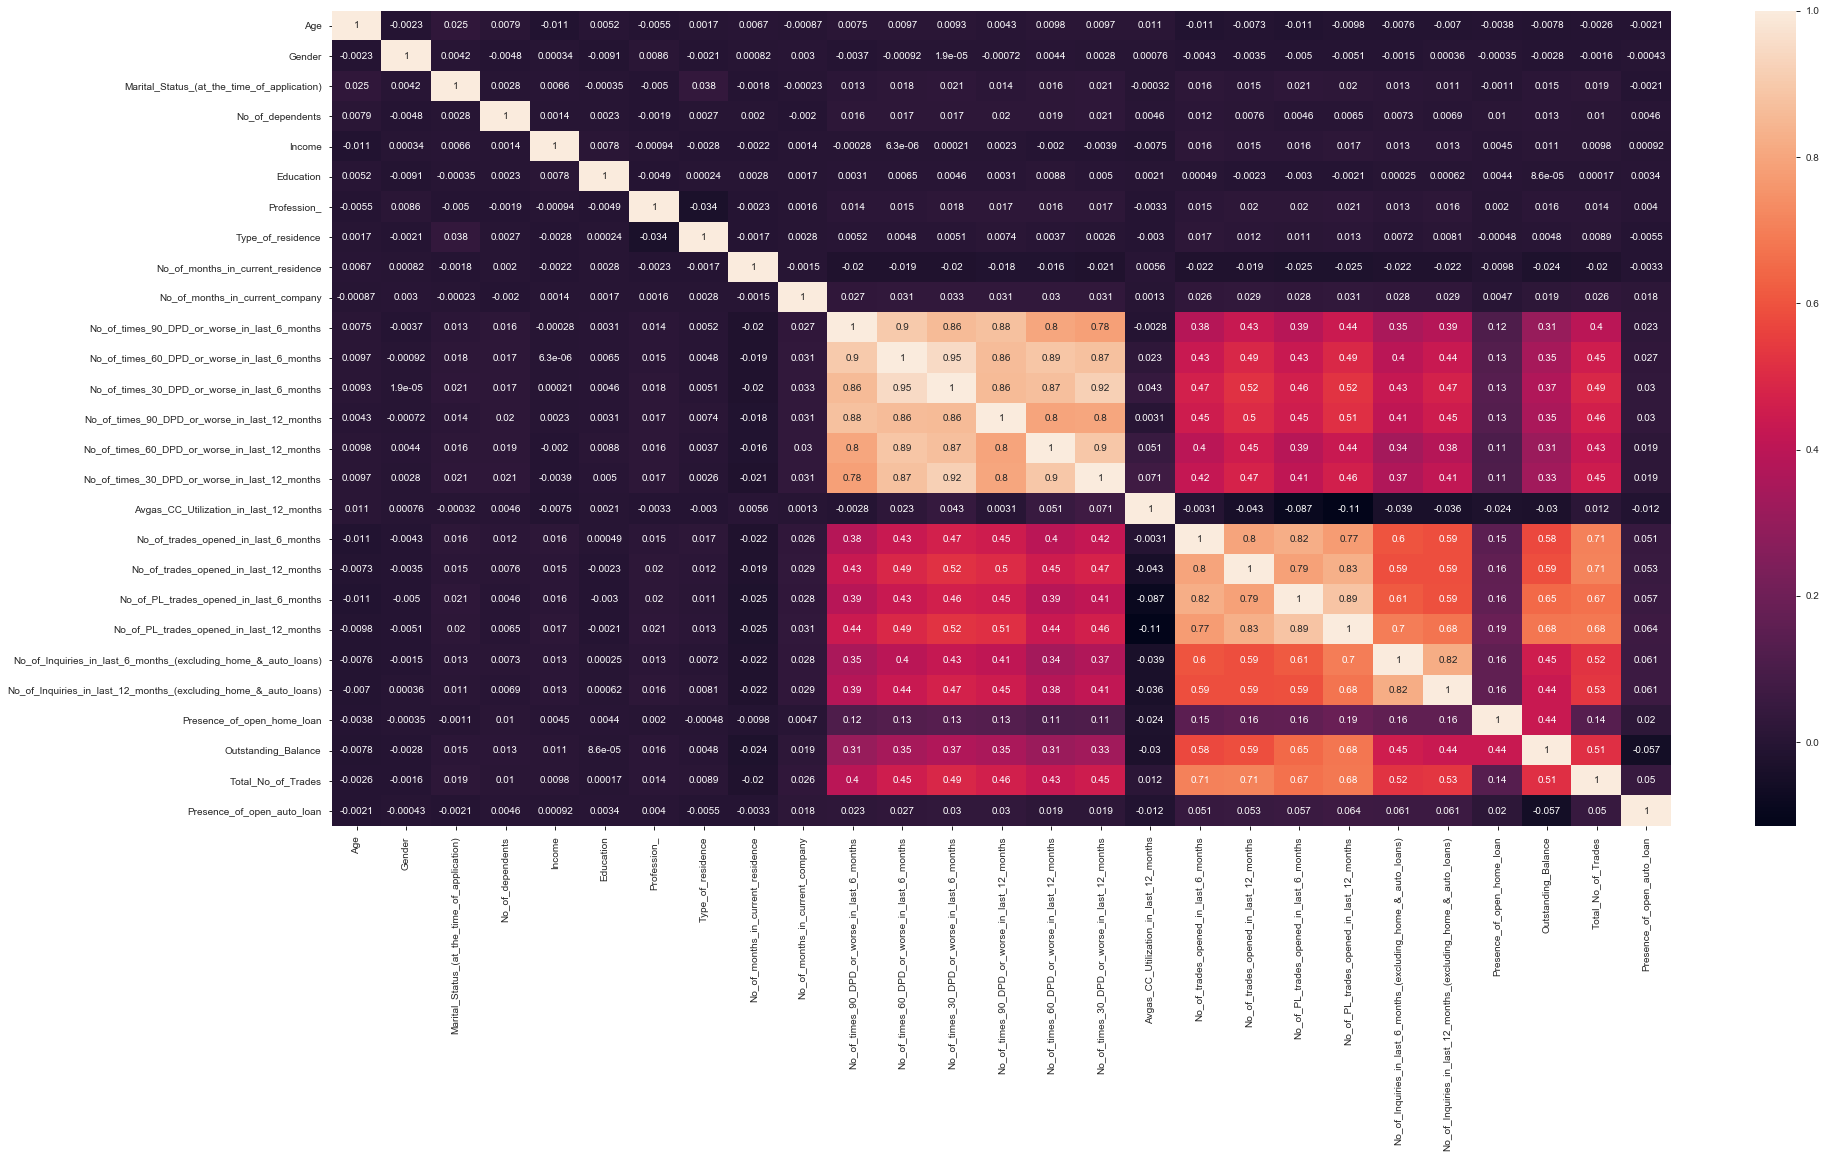

In [170]:
## heat map for the numerical variables 
plt.figure(figsize = (30, 15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

##### Inferences :

There seems to be high correlation between certain variables.

In [171]:
# check class imbalance
(y_train.value_counts()/y_train.shape)*100

# Dataset is imbalanced, we will handle it later

0.0    95.796618
1.0     4.203382
Name: Performance_Tag, dtype: float64

In [172]:
# lets save all the variable except the target variable
df_col = df_master_woe.drop("Performance_Tag",1).columns


In [173]:
# Default logistic regression model
# class_weight="balanced" will take care of the class imbalance in the dataset
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48885
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.2
Date:                Mon, 02 Mar 2020   Deviance:                       16344.
Time:                        19:18:10   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1675      0.028   -112.778      0.000      -3.223      -3.112
Age                                                                -0.0010      0.003     -0.325      0.745      -0.007       0.005
Gender                                                             -0.9528      1.275     -0.747      0.455      -3.453       1.547
Marital_Status_(at_the_time_of_application)                         0.7491      2.382      0.314      0.753      -3.920       5.419
No_of_dependents                                                   -0.7731      0.441     -1.753      0.080      -1.637       0.091
Income                                                              0.0029      0.005      0.589      0.556      -0.007       0.012
Education                                                          -1.2061      0.760     -1.587      0.113      -2.696       0.284
Profession_                                                        -0.8605      0.459     -1.874      0.061      -1.760       0.040
Type_of_residence                                                  -1.5919      0.902     -1.766      0.077      -3.359       0.175
No_of_months_in_current_residence                                   0.0012      0.003      0.375      0.708      -0.005       0.007
No_of_months_in_current_company                                    -0.3159      0.170     -1.854      0.064      -0.650       0.018
No_of_times_90_DPD_or_worse_in_last_6_months                       -0.0144      0.129     -0.112      0.911      -0.268       0.239
No_of_times_60_DPD_or_worse_in_last_6_months                        0.2058      0.176      1.171      0.242      -0.139       0.550
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4118      0.171     -2.401      0.016      -0.748      -0.076
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0465      0.107     -0.434      0.665      -0.257       0.164
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0671      0.134     -0.502      0.616      -0.329       0.195
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2145      0.138     -1.556      0.120      -0.485       0.056
Avgas_CC_Utilization_in_last_12_months                              0.0014      0.001      1.445      0.149      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0254      0.100     -0.254      0.800      -0.221       0.171
No_of_trades_opened_in_last_12_months                               0.0812      0.053      1.526      0.127      -0.023       0.186
No_of_PL_trades_opened_in_last_6_months                            -0.0169      0.109     -0.155      0.877      -0.231       

##### Inferences :

p-value of the feauture No_of_times_90_DPD_or_worse_in_last_6_months is high, lets drop it and re create the model

In [174]:

df_col = df_col.drop('No_of_times_90_DPD_or_worse_in_last_6_months', 1)

X_train_sm = sm.add_constant(X_train[df_col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48886
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.2
Date:                Mon, 02 Mar 2020   Deviance:                       16344.
Time:                        19:18:10   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1674      0.028   -112.806      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.325      0.745      -0.007       0.005
Gender                                                             -0.9513      1.275     -0.746      0.456      -3.451       1.548
Marital_Status_(at_the_time_of_application)                         0.7504      2.382      0.315      0.753      -3.919       5.420
No_of_dependents                                                   -0.7730      0.441     -1.753      0.080      -1.637       0.091
Income                                                              0.0029      0.005      0.590      0.555      -0.007       0.012
Education                                                          -1.2054      0.760     -1.586      0.113      -2.695       0.285
Profession_                                                        -0.8603      0.459     -1.874      0.061      -1.760       0.040
Type_of_residence                                                  -1.5918      0.902     -1.766      0.077      -3.359       0.175
No_of_months_in_current_residence                                   0.0012      0.003      0.376      0.707      -0.005       0.007
No_of_months_in_current_company                                    -0.3156      0.170     -1.852      0.064      -0.649       0.018
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1972      0.158      1.250      0.211      -0.112       0.506
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4107      0.171     -2.399      0.016      -0.746      -0.075
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0525      0.093     -0.565      0.572      -0.235       0.130
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0668      0.134     -0.500      0.617      -0.329       0.195
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2139      0.138     -1.553      0.120      -0.484       0.056
Avgas_CC_Utilization_in_last_12_months                              0.0014      0.001      1.451      0.147      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0254      0.100     -0.254      0.799      -0.221       0.171
No_of_trades_opened_in_last_12_months                               0.0813      0.053      1.529      0.126      -0.023       0.186
No_of_PL_trades_opened_in_last_6_months                            -0.0170      0.109     -0.156      0.876      -0.231       0.197
No_of_PL_trades_opened_in_last_12_months                           -0.4648      0.105     -4.421      0.000      -0.671      -

##### Inferences :

p-value of the feauture "Total_No_of_Trades" is high, lets drop it and re create the model

In [175]:

df_col = df_col.drop('Total_No_of_Trades', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48887
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.2
Date:                Mon, 02 Mar 2020   Deviance:                       16344.
Time:                        19:18:11   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1674      0.028   -112.809      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.326      0.744      -0.007       0.005
Gender                                                             -0.9519      1.275     -0.746      0.455      -3.451       1.548
Marital_Status_(at_the_time_of_application)                         0.7461      2.382      0.313      0.754      -3.923       5.415
No_of_dependents                                                   -0.7732      0.441     -1.753      0.080      -1.638       0.091
Income                                                              0.0029      0.005      0.590      0.555      -0.007       0.012
Education                                                          -1.2058      0.760     -1.586      0.113      -2.696       0.284
Profession_                                                        -0.8598      0.459     -1.872      0.061      -1.760       0.040
Type_of_residence                                                  -1.5911      0.902     -1.765      0.078      -3.358       0.176
No_of_months_in_current_residence                                   0.0012      0.003      0.376      0.707      -0.005       0.007
No_of_months_in_current_company                                    -0.3156      0.170     -1.853      0.064      -0.649       0.018
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1988      0.158      1.261      0.207      -0.110       0.508
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4125      0.171     -2.411      0.016      -0.748      -0.077
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0530      0.093     -0.570      0.569      -0.235       0.129
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0678      0.134     -0.508      0.612      -0.330       0.194
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2146      0.138     -1.558      0.119      -0.484       0.055
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.440      0.150      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0320      0.095     -0.335      0.737      -0.219       0.155
No_of_trades_opened_in_last_12_months                               0.0799      0.053      1.500      0.134      -0.025       0.184
No_of_PL_trades_opened_in_last_6_months                            -0.0177      0.109     -0.162      0.871      -0.231       0.196
No_of_PL_trades_opened_in_last_12_months                           -0.4672      0.105     -4.469      0.000      -0.672      -

##### Inferences :

p-value of the feauture "Total No of Trades" is high, lets drop it and re create the model

In [176]:
# p-value of the feauture "Total No of Trades" is high, lets drop it and re create the model
df_col = df_col.drop('No_of_PL_trades_opened_in_last_6_months', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48888
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.2
Date:                Mon, 02 Mar 2020   Deviance:                       16344.
Time:                        19:18:11   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1674      0.028   -112.825      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.326      0.745      -0.007       0.005
Gender                                                             -0.9515      1.275     -0.746      0.456      -3.451       1.548
Marital_Status_(at_the_time_of_application)                         0.7432      2.382      0.312      0.755      -3.926       5.412
No_of_dependents                                                   -0.7725      0.441     -1.752      0.080      -1.637       0.092
Income                                                              0.0029      0.005      0.590      0.555      -0.007       0.012
Education                                                          -1.2054      0.760     -1.585      0.113      -2.696       0.285
Profession_                                                        -0.8600      0.459     -1.873      0.061      -1.760       0.040
Type_of_residence                                                  -1.5908      0.902     -1.764      0.078      -3.358       0.176
No_of_months_in_current_residence                                   0.0012      0.003      0.377      0.706      -0.005       0.007
No_of_months_in_current_company                                    -0.3158      0.170     -1.854      0.064      -0.650       0.018
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1984      0.158      1.259      0.208      -0.111       0.507
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4117      0.171     -2.408      0.016      -0.747      -0.077
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0530      0.093     -0.570      0.569      -0.235       0.129
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0677      0.134     -0.507      0.612      -0.330       0.194
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2145      0.138     -1.558      0.119      -0.484       0.055
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.450      0.147      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0397      0.082     -0.481      0.630      -0.201       0.122
No_of_trades_opened_in_last_12_months                               0.0799      0.053      1.499      0.134      -0.025       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4756      0.091     -5.247      0.000      -0.653      -0.298
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1251      0.087     -1.438      0.151      -0.296       

##### Inferences :

p-value of the feauture "Presence_of_open_auto_loan" is high, lets drop it and re create the model

In [177]:

df_col = df_col.drop('Presence_of_open_auto_loan', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48889
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.3
Date:                Mon, 02 Mar 2020   Deviance:                       16345.
Time:                        19:18:12   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1674      0.028   -112.825      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.326      0.744      -0.007       0.005
Gender                                                             -0.9504      1.275     -0.745      0.456      -3.450       1.549
Marital_Status_(at_the_time_of_application)                         0.7435      2.382      0.312      0.755      -3.926       5.413
No_of_dependents                                                   -0.7731      0.441     -1.753      0.080      -1.637       0.091
Income                                                              0.0029      0.005      0.592      0.554      -0.007       0.012
Education                                                          -1.2058      0.760     -1.586      0.113      -2.696       0.284
Profession_                                                        -0.8601      0.459     -1.873      0.061      -1.760       0.040
Type_of_residence                                                  -1.5900      0.902     -1.763      0.078      -3.357       0.177
No_of_months_in_current_residence                                   0.0012      0.003      0.378      0.705      -0.005       0.007
No_of_months_in_current_company                                    -0.3160      0.170     -1.855      0.064      -0.650       0.018
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1985      0.158      1.259      0.208      -0.110       0.507
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4120      0.171     -2.410      0.016      -0.747      -0.077
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0529      0.093     -0.569      0.569      -0.235       0.129
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0676      0.134     -0.506      0.613      -0.329       0.194
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2142      0.138     -1.556      0.120      -0.484       0.056
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.449      0.147      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0400      0.082     -0.485      0.628      -0.202       0.122
No_of_trades_opened_in_last_12_months                               0.0799      0.053      1.499      0.134      -0.025       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4769      0.090     -5.274      0.000      -0.654      -0.300
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1250      0.087     -1.437      0.151      -0.296       

##### Inferences :

p-value of the feauture "No_of_months_in_current_residence" is high, lets drop it and re create the model

In [178]:

df_col = df_col.drop('No_of_months_in_current_residence', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.3
Date:                Mon, 02 Mar 2020   Deviance:                       16345.
Time:                        19:18:12   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1670      0.028   -112.891      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.323      0.747      -0.007       0.005
Gender                                                             -0.9494      1.275     -0.744      0.457      -3.449       1.550
Marital_Status_(at_the_time_of_application)                         0.7414      2.382      0.311      0.756      -3.928       5.410
No_of_dependents                                                   -0.7725      0.441     -1.752      0.080      -1.637       0.092
Income                                                              0.0029      0.005      0.590      0.555      -0.007       0.012
Education                                                          -1.2044      0.760     -1.584      0.113      -2.695       0.286
Profession_                                                        -0.8604      0.459     -1.874      0.061      -1.760       0.040
Type_of_residence                                                  -1.5901      0.902     -1.764      0.078      -3.357       0.177
No_of_months_in_current_company                                    -0.3159      0.170     -1.855      0.064      -0.650       0.018
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1981      0.158      1.257      0.209      -0.111       0.507
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4116      0.171     -2.407      0.016      -0.747      -0.076
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0529      0.093     -0.569      0.570      -0.235       0.129
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0672      0.134     -0.503      0.615      -0.329       0.195
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2149      0.138     -1.561      0.119      -0.485       0.055
Avgas_CC_Utilization_in_last_12_months                              0.0014      0.001      1.452      0.147      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0402      0.082     -0.487      0.626      -0.202       0.121
No_of_trades_opened_in_last_12_months                               0.0800      0.053      1.501      0.133      -0.024       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4768      0.090     -5.274      0.000      -0.654      -0.300
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1252      0.087     -1.439      0.150      -0.296       0.045
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3086      0.109     -2.836      0.005      -0.522      -

##### Inferences :

p-value of the feauture "Marital_Status_(at_the_time_of_application)" is high, lets drop it and re create the model

In [179]:
df_col = df_col.drop('Marital_Status_(at_the_time_of_application)', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48891
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.4
Date:                Mon, 02 Mar 2020   Deviance:                       16345.
Time:                        19:18:12   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1671      0.028   -112.896      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.315      0.753      -0.007       0.005
Gender                                                             -0.9472      1.275     -0.743      0.458      -3.447       1.552
No_of_dependents                                                   -0.7721      0.441     -1.751      0.080      -1.636       0.092
Income                                                              0.0029      0.005      0.592      0.554      -0.007       0.012
Education                                                          -1.2043      0.760     -1.584      0.113      -2.695       0.286
Profession_                                                        -0.8613      0.459     -1.876      0.061      -1.761       0.039
Type_of_residence                                                  -1.5775      0.899     -1.755      0.079      -3.339       0.184
No_of_months_in_current_company                                    -0.3164      0.170     -1.858      0.063      -0.650       0.017
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1982      0.158      1.257      0.209      -0.111       0.507
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4112      0.171     -2.405      0.016      -0.746      -0.076
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0531      0.093     -0.572      0.568      -0.235       0.129
No_of_times_60_DPD_or_worse_in_last_12_months                      -0.0676      0.134     -0.506      0.613      -0.329       0.194
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2145      0.138     -1.558      0.119      -0.484       0.055
Avgas_CC_Utilization_in_last_12_months                              0.0014      0.001      1.451      0.147      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0401      0.082     -0.486      0.627      -0.202       0.122
No_of_trades_opened_in_last_12_months                               0.0797      0.053      1.498      0.134      -0.025       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4765      0.090     -5.271      0.000      -0.654      -0.299
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1252      0.087     -1.439      0.150      -0.296       0.045
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3088      0.109     -2.838      0.005      -0.522      -0.096
Presence_of_open_home_loan                                         -0.1557      0.190     -0.820      0.412      -0.528       

##### Inferences :

p-value of the feauture "No_of_times_60_DPD_or_worse_in_last_12_months" is high, lets drop it and re create the model

In [180]:

df_col = df_col.drop('No_of_times_60_DPD_or_worse_in_last_12_months', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48892
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.5
Date:                Mon, 02 Mar 2020   Deviance:                       16345.
Time:                        19:18:13   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1670      0.028   -112.905      0.000      -3.222      -3.112
Age                                                                -0.0010      0.003     -0.317      0.751      -0.007       0.005
Gender                                                             -0.9507      1.275     -0.745      0.456      -3.450       1.549
No_of_dependents                                                   -0.7731      0.441     -1.753      0.080      -1.637       0.091
Income                                                              0.0029      0.005      0.589      0.556      -0.007       0.012
Education                                                          -1.2074      0.760     -1.588      0.112      -2.697       0.283
Profession_                                                        -0.8629      0.459     -1.879      0.060      -1.763       0.037
Type_of_residence                                                  -1.5807      0.900     -1.757      0.079      -3.344       0.183
No_of_months_in_current_company                                    -0.3180      0.170     -1.868      0.062      -0.652       0.016
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1611      0.140      1.153      0.249      -0.113       0.435
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4060      0.171     -2.377      0.017      -0.741      -0.071
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0569      0.093     -0.614      0.539      -0.239       0.125
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2400      0.128     -1.873      0.061      -0.491       0.011
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.434      0.152      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0406      0.082     -0.492      0.622      -0.202       0.121
No_of_trades_opened_in_last_12_months                               0.0792      0.053      1.484      0.138      -0.025       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4756      0.090     -5.262      0.000      -0.653      -0.298
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1242      0.087     -1.428      0.153      -0.295       0.046
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3092      0.109     -2.843      0.004      -0.522      -0.096
Presence_of_open_home_loan                                         -0.1558      0.190     -0.821      0.412      -0.528       0.216
Outstanding_Balance                                                -0.1242      0.082     -1.517      0.129      -0.285       

##### Inferences :

p-value of the feauture "Age" is high, lets drop it and re create the model

In [181]:

df_col = df_col.drop('Age', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.5
Date:                Mon, 02 Mar 2020   Deviance:                       16345.
Time:                        19:18:13   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1678      0.028   -113.420      0.000      -3.223      -3.113
Gender                                                             -0.9485      1.275     -0.744      0.457      -3.448       1.551
No_of_dependents                                                   -0.7740      0.441     -1.755      0.079      -1.638       0.090
Income                                                              0.0029      0.005      0.592      0.554      -0.007       0.012
Education                                                          -1.2089      0.760     -1.590      0.112      -2.699       0.281
Profession_                                                        -0.8623      0.459     -1.878      0.060      -1.762       0.038
Type_of_residence                                                  -1.5819      0.900     -1.758      0.079      -3.346       0.182
No_of_months_in_current_company                                    -0.3182      0.170     -1.868      0.062      -0.652       0.016
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1608      0.140      1.151      0.250      -0.113       0.434
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4060      0.171     -2.377      0.017      -0.741      -0.071
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0567      0.093     -0.612      0.540      -0.238       0.125
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2403      0.128     -1.875      0.061      -0.491       0.011
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.431      0.152      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0404      0.082     -0.490      0.624      -0.202       0.121
No_of_trades_opened_in_last_12_months                               0.0792      0.053      1.483      0.138      -0.025       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4755      0.090     -5.262      0.000      -0.653      -0.298
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1242      0.087     -1.429      0.153      -0.295       0.046
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3092      0.109     -2.843      0.004      -0.522      -0.096
Presence_of_open_home_loan                                         -0.1558      0.190     -0.821      0.412      -0.528       0.216
Outstanding_Balance                                                -0.1241      0.082     -1.517      0.129      -0.285       0.036
==============================================================================================================================

##### Inferences :

p-value of the feauture "Income" is high, lets drop it and re create the model

In [182]:

df_col = df_col.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48894
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.7
Date:                Mon, 02 Mar 2020   Deviance:                       16345.
Time:                        19:18:13   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1656      0.028   -114.482      0.000      -3.220      -3.111
Gender                                                             -0.9488      1.275     -0.744      0.457      -3.448       1.551
No_of_dependents                                                   -0.7745      0.441     -1.757      0.079      -1.639       0.090
Education                                                          -1.2050      0.760     -1.585      0.113      -2.695       0.285
Profession_                                                        -0.8620      0.459     -1.877      0.060      -1.762       0.038
Type_of_residence                                                  -1.5827      0.900     -1.759      0.079      -3.346       0.180
No_of_months_in_current_company                                    -0.3186      0.170     -1.871      0.061      -0.652       0.015
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1607      0.140      1.151      0.250      -0.113       0.434
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4060      0.171     -2.377      0.017      -0.741      -0.071
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0567      0.093     -0.612      0.540      -0.238       0.125
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2407      0.128     -1.878      0.060      -0.492       0.010
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.428      0.153      -0.000       0.003
No_of_trades_opened_in_last_6_months                               -0.0399      0.082     -0.484      0.629      -0.202       0.122
No_of_trades_opened_in_last_12_months                               0.0792      0.053      1.484      0.138      -0.025       0.184
No_of_PL_trades_opened_in_last_12_months                           -0.4752      0.090     -5.259      0.000      -0.652      -0.298
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1242      0.087     -1.429      0.153      -0.295       0.046
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3091      0.109     -2.842      0.004      -0.522      -0.096
Presence_of_open_home_loan                                         -0.1550      0.190     -0.817      0.414      -0.527       0.217
Outstanding_Balance                                                -0.1242      0.082     -1.518      0.129      -0.285       0.036
===================================================================================================================================
"""

##### Inferences :

p-value of the feauture "No_of_trades_opened_in_last_6_months" is high, lets drop it and re create the model

In [183]:

df_col = df_col.drop('No_of_trades_opened_in_last_6_months', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm,class_weight="balanced", family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8172.8
Date:                Mon, 02 Mar 2020   Deviance:                       16346.
Time:                        19:18:14   Pearson chi2:                 4.86e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1655      0.028   -114.480      0.000      -3.220      -3.111
Gender                                                             -0.9492      1.275     -0.744      0.457      -3.449       1.550
No_of_dependents                                                   -0.7761      0.441     -1.760      0.078      -1.640       0.088
Education                                                          -1.2061      0.760     -1.587      0.112      -2.696       0.283
Profession_                                                        -0.8600      0.459     -1.873      0.061      -1.760       0.040
Type_of_residence                                                  -1.5890      0.900     -1.766      0.077      -3.352       0.174
No_of_months_in_current_company                                    -0.3182      0.170     -1.868      0.062      -0.652       0.016
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1615      0.140      1.156      0.248      -0.112       0.435
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4060      0.171     -2.377      0.017      -0.741      -0.071
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0572      0.093     -0.618      0.537      -0.239       0.124
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2425      0.128     -1.893      0.058      -0.493       0.009
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.385      0.166      -0.001       0.003
No_of_trades_opened_in_last_12_months                               0.0713      0.053      1.340      0.180      -0.033       0.176
No_of_PL_trades_opened_in_last_12_months                           -0.4874      0.087     -5.584      0.000      -0.659      -0.316
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1258      0.087     -1.447      0.148      -0.296       0.045
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3116      0.109     -2.867      0.004      -0.525      -0.099
Presence_of_open_home_loan                                         -0.1518      0.190     -0.800      0.423      -0.524       0.220
Outstanding_Balance                                                -0.1298      0.081     -1.602      0.109      -0.289       0.029
===================================================================================================================================
"""

##### Inferences :

p-value of the feauture "Gender" is high, lets drop it and re create the model

In [184]:

df_col = df_col.drop('Gender', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8173.1
Date:                Mon, 02 Mar 2020   Deviance:                       16346.
Time:                        19:18:14   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1656      0.028   -114.486      0.000      -3.220      -3.111
No_of_dependents                                                   -0.7749      0.441     -1.758      0.079      -1.639       0.089
Education                                                          -1.1983      0.760     -1.577      0.115      -2.688       0.291
Profession_                                                        -0.8633      0.459     -1.880      0.060      -1.763       0.036
Type_of_residence                                                  -1.5861      0.899     -1.764      0.078      -3.349       0.177
No_of_months_in_current_company                                    -0.3186      0.170     -1.871      0.061      -0.652       0.015
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1617      0.140      1.158      0.247      -0.112       0.435
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4061      0.171     -2.378      0.017      -0.741      -0.071
No_of_times_90_DPD_or_worse_in_last_12_months                      -0.0572      0.093     -0.617      0.537      -0.239       0.124
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2428      0.128     -1.896      0.058      -0.494       0.008
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.386      0.166      -0.001       0.003
No_of_trades_opened_in_last_12_months                               0.0715      0.053      1.342      0.180      -0.033       0.176
No_of_PL_trades_opened_in_last_12_months                           -0.4871      0.087     -5.580      0.000      -0.658      -0.316
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1258      0.087     -1.448      0.148      -0.296       0.044
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3119      0.109     -2.870      0.004      -0.525      -0.099
Presence_of_open_home_loan                                         -0.1512      0.190     -0.797      0.425      -0.523       0.221
Outstanding_Balance                                                -0.1299      0.081     -1.604      0.109      -0.289       0.029
===================================================================================================================================
"""

##### Inferences :

p-value of the feauture "No_of_times_90_DPD_or_worse_in_last_12_months" is high, lets drop it and re create the model

In [185]:

df_col = df_col.drop('No_of_times_90_DPD_or_worse_in_last_12_months', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8173.3
Date:                Mon, 02 Mar 2020   Deviance:                       16347.
Time:                        19:18:14   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1661      0.028   -114.556      0.000      -3.220      -3.112
No_of_dependents                                                   -0.7783      0.441     -1.766      0.077      -1.642       0.086
Education                                                          -1.1970      0.760     -1.575      0.115      -2.686       0.292
Profession_                                                        -0.8652      0.459     -1.885      0.059      -1.765       0.035
Type_of_residence                                                  -1.5880      0.899     -1.767      0.077      -3.350       0.174
No_of_months_in_current_company                                    -0.3203      0.170     -1.881      0.060      -0.654       0.013
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1335      0.132      1.010      0.312      -0.125       0.392
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4195      0.169     -2.475      0.013      -0.752      -0.087
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2482      0.128     -1.941      0.052      -0.499       0.002
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.407      0.159      -0.001       0.003
No_of_trades_opened_in_last_12_months                               0.0707      0.053      1.321      0.186      -0.034       0.175
No_of_PL_trades_opened_in_last_12_months                           -0.4902      0.087     -5.620      0.000      -0.661      -0.319
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1254      0.087     -1.443      0.149      -0.296       0.045
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3142      0.109     -2.893      0.004      -0.527      -0.101
Presence_of_open_home_loan                                         -0.1530      0.190     -0.807      0.420      -0.525       0.219
Outstanding_Balance                                                -0.1290      0.081     -1.592      0.111      -0.288       0.030
===================================================================================================================================
"""

##### Inferences :

p-value of the feauture "Presence_of_open_home_loan" is high, lets drop it and re create the model

In [186]:

df_col = df_col.drop('Presence_of_open_home_loan', 1)

X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8173.6
Date:                Mon, 02 Mar 2020   Deviance:                       16347.
Time:                        19:18:14   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1664      0.028   -114.571      0.000      -3.221      -3.112
No_of_dependents                                                   -0.7806      0.441     -1.771      0.077      -1.645       0.083
Education                                                          -1.2002      0.760     -1.579      0.114      -2.690       0.289
Profession_                                                        -0.8652      0.459     -1.885      0.059      -1.765       0.035
Type_of_residence                                                  -1.5889      0.899     -1.768      0.077      -3.350       0.173
No_of_months_in_current_company                                    -0.3210      0.170     -1.885      0.059      -0.655       0.013
No_of_times_60_DPD_or_worse_in_last_6_months                        0.1319      0.132      0.999      0.318      -0.127       0.391
No_of_times_30_DPD_or_worse_in_last_6_months                       -0.4204      0.169     -2.481      0.013      -0.753      -0.088
No_of_times_30_DPD_or_worse_in_last_12_months                      -0.2478      0.128     -1.938      0.053      -0.498       0.003
Avgas_CC_Utilization_in_last_12_months                              0.0013      0.001      1.427      0.153      -0.000       0.003
No_of_trades_opened_in_last_12_months                               0.0709      0.053      1.330      0.184      -0.034       0.175
No_of_PL_trades_opened_in_last_12_months                           -0.4847      0.087     -5.568      0.000      -0.655      -0.314
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1267      0.087     -1.457      0.145      -0.297       0.044
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.3173      0.109     -2.922      0.003      -0.530      -0.105
Outstanding_Balance                                                -0.1447      0.079     -1.843      0.065      -0.299       0.009
===================================================================================================================================
"""

In [187]:
# p-values looks good now, lets check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[df_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[df_col].values, i) for i in range(X_train[df_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6        No_of_times_30_DPD_or_worse_in_last_6_months  17.44
5        No_of_times_60_DPD_or_worse_in_last_6_months  10.81
7       No_of_times_30_DPD_or_worse_in_last_12_months   6.91
10           No_of_PL_trades_opened_in_last_12_months   5.38
9               No_of_trades_opened_in_last_12_months   3.51
11  No_of_Inquiries_in_last_6_months_(excluding_ho...   3.33
12  No_of_Inquiries_in_last_12_months_(excluding_h...   2.83
13                                Outstanding_Balance   1.95
8              Avgas_CC_Utilization_in_last_12_months   1.05
0                                    No_of_dependents   1.00
1                                           Education   1.00
2                                         Profession_   1.00
3                                   Type_of_residence   1.00
4                     No_of_months_in_current_company   1.00

In [188]:
df_col = df_col.drop(['No_of_times_30_DPD_or_worse_in_last_6_months','No_of_times_60_DPD_or_worse_in_last_6_months','No_of_times_30_DPD_or_worse_in_last_12_months','No_of_PL_trades_opened_in_last_12_months'], 1)

In [189]:
X_train_sm = sm.add_constant(X_train[df_col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48913
Model:                            GLM   Df Residuals:                    48902
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8240.0
Date:                Mon, 02 Mar 2020   Deviance:                       16480.
Time:                        19:18:15   Pearson chi2:                 4.85e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1980      0.028   -115.525      0.000      -3.252      -3.144
No_of_dependents                                                   -0.8467      0.440     -1.923      0.055      -1.710       0.016
Education                                                          -1.2716      0.761     -1.671      0.095      -2.763       0.220
Profession_                                                        -0.9190      0.458     -2.006      0.045      -1.817      -0.021
Type_of_residence                                                  -1.5850      0.898     -1.765      0.078      -3.345       0.175
No_of_months_in_current_company                                    -0.4985      0.169     -2.956      0.003      -0.829      -0.168
Avgas_CC_Utilization_in_last_12_months                              0.0009      0.001      0.969      0.333      -0.001       0.003
No_of_trades_opened_in_last_12_months                              -0.3889      0.068     -5.728      0.000      -0.522      -0.256
No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)     -0.1904      0.087     -2.193      0.028      -0.361      -0.020
No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)    -0.5982      0.107     -5.581      0.000      -0.808      -0.388
Outstanding_Balance                                                -0.3352      0.073     -4.583      0.000      -0.479      -0.192
===================================================================================================================================
"""

In [190]:
# p-values looks good now, lets check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[df_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[df_col].values, i) for i in range(X_train[df_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7  No_of_Inquiries_in_last_6_months_(excluding_ho...  3.04
8  No_of_Inquiries_in_last_12_months_(excluding_h...  2.78
6              No_of_trades_opened_in_last_12_months  2.03
9                                Outstanding_Balance  1.62
5             Avgas_CC_Utilization_in_last_12_months  1.01
0                                   No_of_dependents  1.00
1                                          Education  1.00
2                                        Profession_  1.00
3                                  Type_of_residence  1.00
4                    No_of_months_in_current_company  1.00

In [191]:
# VIF also looks good now, lets make predictions now on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

26349    0.047069
69356    0.082303
36646    0.055959
19025    0.015669
32050    0.050844
27767    0.022995
5295     0.019270
6910     0.018216
51212    0.064623
49044    0.073372
dtype: float64

In [192]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04706939, 0.08230277, 0.05595854, 0.01566886, 0.05084365,
       0.02299467, 0.01927001, 0.01821598, 0.06462297, 0.0733717 ])

In [193]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance_Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application_ID'] = y_train.index
y_train_pred_final.head()

Performance_Tag  probability  Application_ID
0              0.0     0.047069           26349
1              0.0     0.082303           69356
2              0.0     0.055959           36646
3              0.0     0.015669           19025
4              0.0     0.050844           32050

In [194]:
## making the predictions based on the probability with the cut-off value as 0.1
## this cut-off value will be tuned later

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final.head()

Performance_Tag  probability  Application_ID  predicted
0              0.0     0.047069           26349          0
1              0.0     0.082303           69356          0
2              0.0     0.055959           36646          0
3              0.0     0.015669           19025          0
4              0.0     0.050844           32050          0

In [195]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
confusion = metrics.confusion_matrix(y_train_pred_final["Performance_Tag"], y_train_pred_final["predicted"])
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["predicted"])) 
print("Precision:",precision_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["predicted"]))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[46816    41]
 [ 2049     7]]

Accuracy:0.957
Recall/Sensitivity: 0.003404669260700389
Precision: 0.14583333333333334
Specificity:0.999
AUC: 0.6497738970934748


##### Inferences :

Low Accuracy and Low Senstivity, model has weak predictive power.

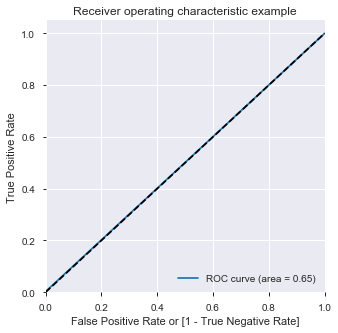

In [196]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance_Tag"], y_train_pred_final.predicted, 
                                         drop_intermediate = False )

auc_score = metrics.roc_auc_score( y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [197]:
# Find optimal cutoff probablity, let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Performance_Tag  probability  Application_ID  predicted  0.0  0.1  0.2  \
0              0.0     0.047069           26349          0    1    0    0   
1              0.0     0.082303           69356          0    1    0    0   
2              0.0     0.055959           36646          0    1    0    0   
3              0.0     0.015669           19025          0    1    0    0   
4              0.0     0.050844           32050          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [198]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance_Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042034  1.000000  0.000000
0.1   0.1  0.957271  0.003405  0.999125
0.2   0.2  0.957966  0.000000  1.000000
0.3   0.3  0.957966  0.000000  1.000000
0.4   0.4  0.957966  0.000000  1.000000
0.5   0.5  0.957966  0.000000  1.000000
0.6   0.6  0.957966  0.000000  1.000000
0.7   0.7  0.957966  0.000000  1.000000
0.8   0.8  0.957966  0.000000  1.000000
0.9   0.9  0.957966  0.000000  1.000000


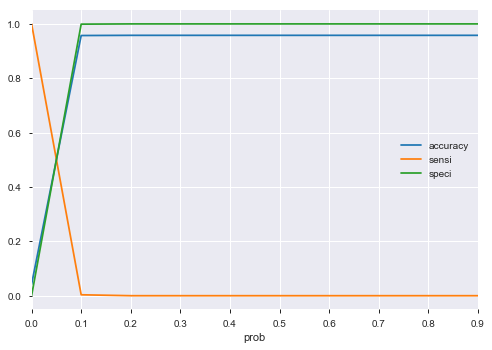

In [199]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [200]:
# let's make prediction using cut off point equal to 0.05 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

Performance_Tag  probability  Application_ID  predicted  0.0  0.1  0.2  \
0              0.0     0.047069           26349          0    1    0    0   
1              0.0     0.082303           69356          0    1    0    0   
2              0.0     0.055959           36646          0    1    0    0   
3              0.0     0.015669           19025          0    1    0    0   
4              0.0     0.050844           32050          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0                1  
2    0    0    0    0    0    0    0                1  
3    0    0    0    0    0    0    0                0  
4    0    0    0    0    0    0    0                1

In [201]:
# lets check confusion metrics and other important metrics
confusion = metrics.confusion_matrix(y_train_pred_final["Performance_Tag"], y_train_pred_final["final_predicted"] )
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["final_predicted"] )) 
print("Precision:",precision_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["final_predicted"] ))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[29336 17521]
 [  857  1199]]

Accuracy:0.624
Recall/Sensitivity: 0.583171206225681
Precision: 0.0640491452991453
Specificity:0.626
AUC: 0.6497738970934748


##### Inferences :


1. Model built above with the identified cutoff probability has improved the Accuracy as well as the Sensitivity. 
2. Recall is better than that of the LR model built on the demographic dataset.

But the numbers are still low to consider this as a good model.

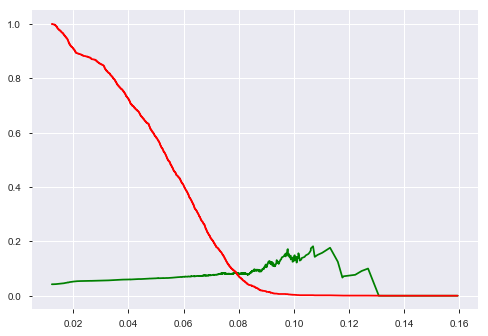

In [202]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Performance_Tag"], y_train_pred_final.probability)
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Predictions on test data set

In [203]:
X_test.shape

(20963, 27)

In [204]:
X_train.shape

(48913, 27)

In [205]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[df_col])

## making prediction probabilities
y_test_pred = res.predict(sm.add_constant(X_test[df_col]))
## checking values
y_test_pred[:10]


35289    0.039511
15905    0.014742
28776    0.038567
14027    0.016275
11095    0.023427
30593    0.076653
17877    0.016886
44815    0.026597
50940    0.057883
568      0.015153
dtype: float64

In [206]:
# reshape to create an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.0395109 , 0.01474215, 0.03856741, 0.01627464, 0.02342677,
       0.07665349, 0.01688642, 0.02659727, 0.05788314, 0.01515287])

In [207]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance_Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application_ID'] = y_test.index
y_test_pred_final.head()

Performance_Tag  probability  Application_ID
0              0.0     0.039511           35289
1              0.0     0.014742           15905
2              0.0     0.038567           28776
3              0.0     0.016275           14027
4              0.0     0.023427           11095

In [208]:
# Create new column 'predicted' with 1 if probability > 0.05 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

Performance_Tag  probability  Application_ID  predicted
0              0.0     0.039511           35289          0
1              0.0     0.014742           15905          0
2              0.0     0.038567           28776          0
3              0.0     0.016275           14027          0
4              0.0     0.023427           11095          0

In [209]:

confusion = metrics.confusion_matrix(y_test_pred_final["Performance_Tag"], y_test_pred_final["predicted"]  )
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test_pred_final["Performance_Tag"], y_test_pred_final["predicted"]  )) 
print("Precision:",precision_score(y_test_pred_final["Performance_Tag"], y_test_pred_final["predicted"]  ))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 


print("AUC:", metrics.roc_auc_score(y_test_pred_final["Performance_Tag"], y_test_pred_final["probability"]))

Confusion Metrics:
 [[12537  7533]
 [  354   539]]

Accuracy:0.624
Recall/Sensitivity: 0.6035834266517357
Precision: 0.06677403369672943
Specificity:0.625
AUC: 0.6618258547491395


 ##### Inferences : 
 
 Accuracy is almost the same on the test dataset, Sensivity is also almost same on the test dataset. 
 Overall the model is doing better than the built on the demographic dataset.

## Logistic Regression - Regularized

In [210]:
# Putting feature variable to X
X = df_master_woe.drop(['Performance_Tag'],axis=1)

# Putting response variable to y
y = df_master_woe['Performance_Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# set up cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

## using Logistic regression for class imbalance
model = LogisticRegression(class_weight='balanced')
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   50.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [211]:
## reviewing the results
cv_results = pd.DataFrame(model_cv.cv_results_)


In [212]:
## segerigating results for L1 and L2 regression and plotting them differently
cv_results_penalty_l1 = cv_results.loc[cv_results['param_penalty']=='l1']
cv_results_penalty_l2 = cv_results.loc[cv_results['param_penalty']=='l2']

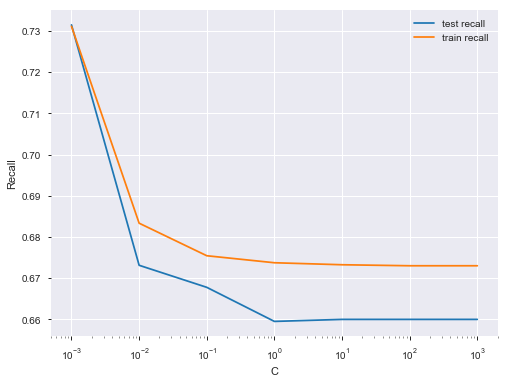

In [213]:
## plotting results for Logistic regression with L1 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_test_score'])
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

Training and Test recall decreases as the value of C indreases

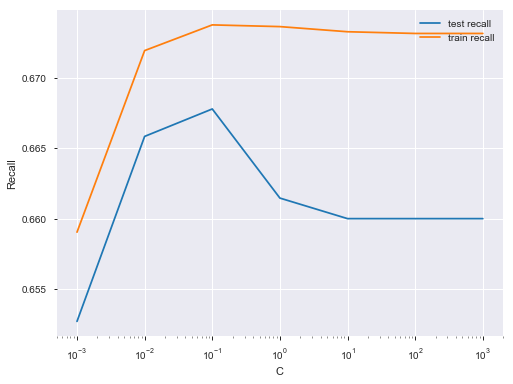

In [214]:
## plotting results for Logistic regression with L2 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_test_score'])
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

###### Inferences :

Training and test recall increases as the value of C increases

In [215]:
## checking best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.7315041290669333 at {'C': 0.001, 'penalty': 'l1'}


In [216]:
# lets create model with the best parameter

model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced')
model.fit(X_train,y_train)

# predictions on training data
y_train_pred = model.predict(X_train)

In [217]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# training dataset
confusion = metrics.confusion_matrix(y_train, y_train_pred )
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance_Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[24394 22463]
 [  556  1500]]

Accuracy:0.529
Recall/Sensitivity: 0.7295719844357976
Precision: 0.06259650294203564
Specificity:0.521
AUC: 0.6497738970934748


###### Inferences :

We have got decent sensitivity on the training dataset from the model built above.

In [218]:
# predictions on test dataset
y_test_pred = model.predict(X_test)

In [219]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# test dataset

confusion = metrics.confusion_matrix(y_test, y_test_pred )
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred )) 
print("Precision:",precision_score(y_test, y_test_pred ))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[10335  9735]
 [  235   658]]

Accuracy:0.524
Recall/Sensitivity: 0.7368421052631579
Precision: 0.06331184451072837
Specificity:0.515


###### Inferences :

Accuracy and sensitivity is almost the same on the test dataset.

In [220]:
## lasso model parameters
model_parameters =list(model.coef_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
list(zip(cols, model_parameters))

[('Age', 0.0),
 ('Gender', 0.0),
 ('Marital_Status_(at_the_time_of_application)', 0.0),
 ('No_of_dependents', 0.0),
 ('Income', 0.0),
 ('Education', 0.0),
 ('Profession_', 0.0),
 ('Type_of_residence', 0.0),
 ('No_of_months_in_current_residence', 0.0),
 ('No_of_months_in_current_company', 0.0),
 ('No_of_times_90_DPD_or_worse_in_last_6_months', 0.0),
 ('No_of_times_60_DPD_or_worse_in_last_6_months', 0.0),
 ('No_of_times_30_DPD_or_worse_in_last_6_months', -0.323),
 ('No_of_times_90_DPD_or_worse_in_last_12_months', 0.0),
 ('No_of_times_60_DPD_or_worse_in_last_12_months', 0.0),
 ('No_of_times_30_DPD_or_worse_in_last_12_months', 0.0),
 ('Avgas_CC_Utilization_in_last_12_months', 0.001),
 ('No_of_trades_opened_in_last_6_months', 0.0),
 ('No_of_trades_opened_in_last_12_months', 0.0),
 ('No_of_PL_trades_opened_in_last_6_months', 0.0),
 ('No_of_PL_trades_opened_in_last_12_months', -0.52),
 ('No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)', -0.038),
 ('No_of_Inquiries_in_last_12_mo

###### Inferences :


Overall we this is the best model so far, with very good accuracy and recall on all the datasets,

## Decision Tree Model

In [221]:
# Putting feature variable to X
X = df_master_woe.drop(['Performance_Tag'],axis=1)

# Putting response variable to y
y = df_master_woe['Performance_Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [222]:
# lets create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [223]:
# Let's check the evaluation metrics of the model built above

# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)

# Printing classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     46857
         1.0       0.07      0.73      0.12      2056

    accuracy                           0.57     48913
   macro avg       0.52      0.64      0.42     48913
weighted avg       0.94      0.57      0.69     48913



In [224]:
# performance metrics on training dataset
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[26213 20644]
 [  565  1491]]

Accuracy:0.566
Recall/Sensitivity: 0.7251945525291829
Precision: 0.0673593855884346
Specificity:0.559


In [225]:
# predictions on the test dataset
y_test_pred= dt_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.55      0.70     20070
         1.0       0.07      0.71      0.12       893

    accuracy                           0.56     20963
   macro avg       0.52      0.63      0.41     20963
weighted avg       0.94      0.56      0.68     20963



In [226]:
# performance metrics on training dataset
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[11025  9045]
 [  258   635]]

Accuracy:0.556
Recall/Sensitivity: 0.7110862262038073
Precision: 0.06559917355371901
Specificity:0.549


In [227]:
# Putting features
features = list(X_train.columns)

### Hyperparameter Tuning

In [228]:
# Tuning Max Depth parameter

# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 101)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   35.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=101,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_j

In [229]:
# scores of GridSearch CV
scores = tree.cv_results_


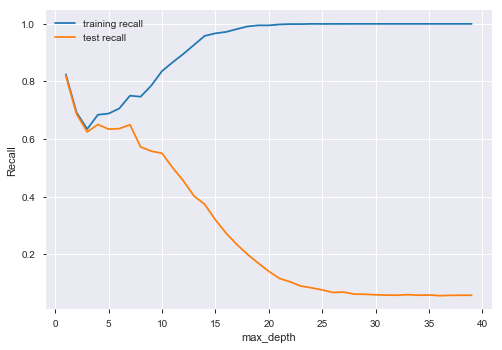

In [230]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

###### Inferences :

Increasin the value of max_depth, both training and test score increase till about max-depth = 6, after which the test score gradually reduces. Scores are average accuracies across the 5-folds.

In [231]:
# Tuning min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [232]:
# scores of GridSearch CV
scores = tree.cv_results_

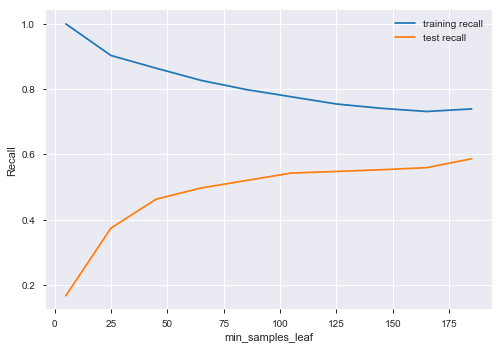

In [233]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

###### Inferences :

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

In [234]:
# Tuning Min Sample Split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [235]:
# scores of GridSearch CV
scores = tree.cv_results_


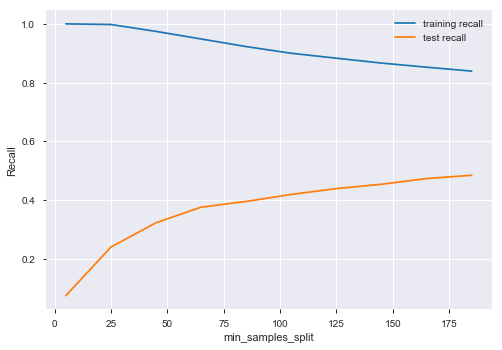

In [236]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

In [237]:
# Grid Search to Find Optimal Hyperparameters

# Create the parameter grid 
param_grid = {
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          scoring="recall", cv = n_folds,
                          return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   52.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8],
                

In [238]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)


In [239]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.688724882343755
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [240]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight='balanced',
                                  criterion='entropy', 
                                  max_depth=6, 
                                  min_samples_leaf=150,
                                  min_samples_split=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [241]:
# prediction on training dataset
y_train_pred = clf_entropy.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74     46857
         1.0       0.07      0.70      0.13      2056

    accuracy                           0.60     48913
   macro avg       0.52      0.65      0.43     48913
weighted avg       0.94      0.60      0.72     48913



In [242]:
# performance metrics on training dataset
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[27933 18924]
 [  623  1433]]

Accuracy:0.6
Recall/Sensitivity: 0.6969844357976653
Precision: 0.07039347644544874
Specificity:0.596


In [243]:
## checking accuracy score
clf_entropy.score(X_test,y_test)

0.5908028431045175

In [244]:
# classification metrics
y_test_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.59      0.73     20070
         1.0       0.07      0.67      0.12       893

    accuracy                           0.59     20963
   macro avg       0.52      0.63      0.43     20963
weighted avg       0.94      0.59      0.71     20963



In [245]:
# performance metrics on training dataset

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[11790  8280]
 [  298   595]]

Accuracy:0.591
Recall/Sensitivity: 0.6662933930571109
Precision: 0.06704225352112676
Specificity:0.587


###### Inferences :

Decision Tree has produced much better results on the master datafram as comparison to that of demographic dataset.

## Random Forest Model

In [246]:
# Putting feature variable to X
X = df_master_woe.drop(['Performance_Tag'],axis=1)

# Putting response variable to y
y = df_master_woe['Performance_Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [247]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [248]:
# predictions on test data
y_train_pred = rfc.predict(X_train)

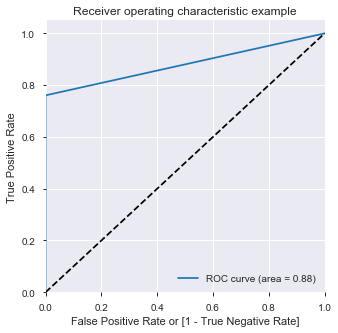

In [249]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred,
                                          drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train, y_train_pred )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [250]:
# Let's check the report of our default model
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     46857
         1.0       1.00      0.76      0.86      2056

    accuracy                           0.99     48913
   macro avg       0.99      0.88      0.93     48913
weighted avg       0.99      0.99      0.99     48913



In [251]:
# performance metrics on training dataset
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, y_train_pred)) 
print("Precision:",precision_score(y_train, y_train_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[46851     6]
 [  492  1564]]

Accuracy:0.99
Recall/Sensitivity: 0.7607003891050583
Precision: 0.9961783439490446
Specificity:1.0


We have got a good Accuracy & decent Sensitivity(recall) on the training dataset. lets now check the test dataset.

In [252]:
# predictions on test data
y_test_pred = rfc.predict(X_test)

In [253]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[20063     7]
 [  893     0]]

Accuracy:0.957
Recall/Sensitivity: 0.0
Precision: 0.0
Specificity:1.0


In [254]:
# Let's check the report of our default model
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20070
         1.0       0.00      0.00      0.00       893

    accuracy                           0.96     20963
   macro avg       0.48      0.50      0.49     20963
weighted avg       0.92      0.96      0.94     20963



In [255]:
# performance metrics on training dataset

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, y_test_pred)) 
print("Precision:",precision_score(y_test, y_test_pred))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[20063     7]
 [  893     0]]

Accuracy:0.957
Recall/Sensitivity: 0.0
Precision: 0.0
Specificity:1.0


###### Inferences :

Accuracy dropped a bit on the test dataset, Sensitivity(recall) has dropped drasticall on the test dataset.

#### Hyperparameter Tuning

In [256]:
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [257]:
# scores of GridSearch CV
scores = rf.cv_results_


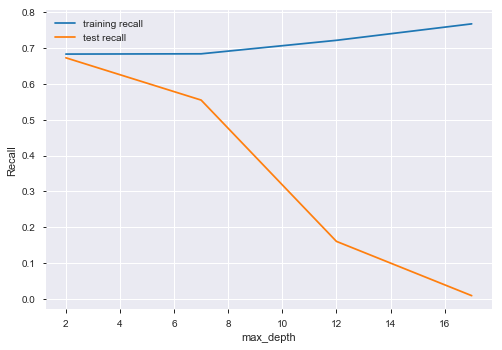

In [258]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

###### Inferences :

Increasing the value of max_depth, train scores keep increasing, but test score keep decreasing. Controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [259]:
# Tuning n_estimators
# Let's try to find the optimum values for n_estimators and understand how the value of n_estimators 
# impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced',max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [260]:
# scores of GridSearch CV
scores = rf.cv_results_

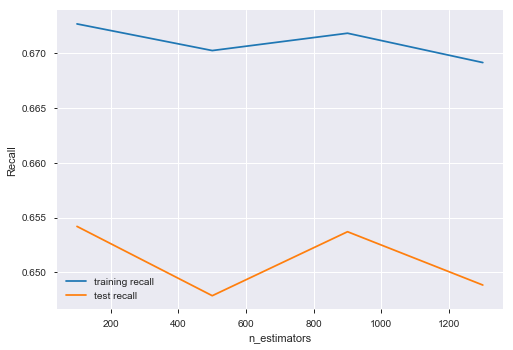

In [261]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences:

We are getting the best test score with n_estimators = 900. Best Training score is also for n_estimators = 900

In [262]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5,10]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',max_depth=4)


# fit tree on training dataa
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [263]:
# scores of GridSearch CV
scores = rf.cv_results_

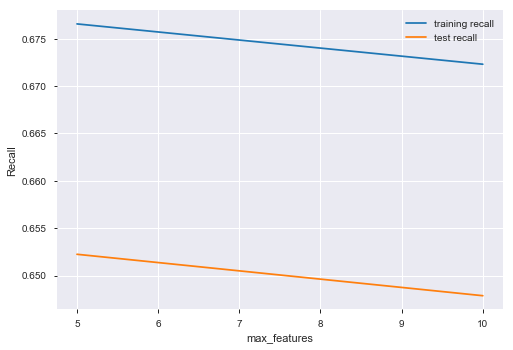

In [264]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


##### Inferences :

Both Training and Test Recalls decrease as the value of max feature increases. Best Training & Test recall is with max features = 5

In [265]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [266]:
# scores of GridSearch CV
scores = rf.cv_results_

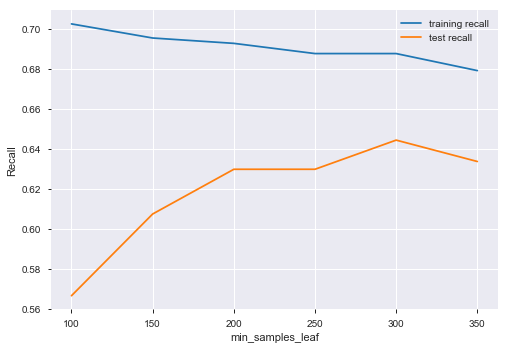

In [267]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences :

Trainig recall is constant for all the different values of the min sample leaf. Test recall increases as the valye of sample leaf increases. Best recall is achieved at the valu of 250

In [268]:
# Tuning min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [269]:
# scores of GridSearch CV
scores = rf.cv_results_

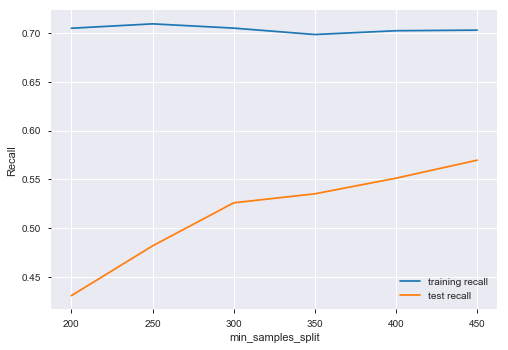

In [270]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### Inferences :

Training recall is constant same for all the different valeus of min samples split. Test recall increases as the min sample split increases.

In [271]:
# Grid Search to Find Optimal Hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,10],
    'n_estimators': [400,700], 
    'max_features': [4, 10],
    'min_samples_leaf': [200,500],
    'min_samples_split': [200,500]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="recall",return_train_score=True)

In [272]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [273]:
# printing the optimal recall score and hyperparameters
print(grid_search.best_score_)

0.6614743686302494


In [274]:
# model with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=4,
                             min_samples_leaf=500, 
                             min_samples_split=500,
                             max_features=10,
                             n_estimators=400)

In [275]:
# model fit 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=500,
                       min_samples_split=500, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [276]:
# predict
predictions = rf.predict(X_train)

In [277]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75     46857
         1.0       0.07      0.67      0.12      2056

    accuracy                           0.61     48913
   macro avg       0.52      0.64      0.44     48913
weighted avg       0.94      0.61      0.72     48913



In [278]:
# performance metrics on training dataset
confusion = metrics.confusion_matrix(y_train, predictions)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_train, predictions)) 
print("Precision:",precision_score(y_train, predictions))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[28243 18614]
 [  682  1374]]

Accuracy:0.606
Recall/Sensitivity: 0.6682879377431906
Precision: 0.0687412447468481
Specificity:0.603


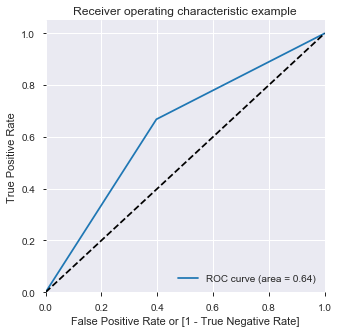

In [279]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, predictions, drop_intermediate = False )

auc_score = metrics.roc_auc_score( y_train, predictions )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [280]:
# predict
predictions_test = rf.predict(X_test)

In [281]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74     20070
         1.0       0.07      0.68      0.13       893

    accuracy                           0.60     20963
   macro avg       0.52      0.64      0.43     20963
weighted avg       0.94      0.60      0.71     20963



In [282]:

confusion = metrics.confusion_matrix(y_test, predictions_test)
print("Confusion Metrics:\n",confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
print("Recall/Sensitivity:",recall_score(y_test, predictions_test)) 
print("Precision:",precision_score(y_test, predictions_test))
print("Specificity:{}".format(round(TN/float(TN+FP),3))) 

Confusion Metrics:
 [[11963  8107]
 [  288   605]]

Accuracy:0.6
Recall/Sensitivity: 0.6774916013437849
Precision: 0.06944444444444445
Specificity:0.596


##### Inferences :

Numbers are almost same as we got on the training dataset

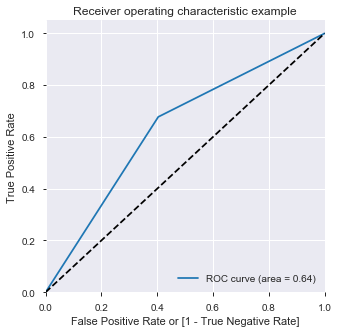

In [283]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, predictions_test, drop_intermediate = False )

auc_score = metrics.roc_auc_score( y_test, predictions_test)
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Model Evaluation

1. Models on master dataset are performing much better than that of models built on demographics dataset.
2. Decision Tree and Random Forests  with hyperparameter tuning have produced decent results.
3. Regularized Logistic Regression model has produced the best results with recall greater than 70% on the training and the test dataset.


## Final Conclusion: 

#### Best Model (Regularized Logistic Regression on Master Dataset) 

Since Regularized Logistic Regression has produced the best results, we would go ahead with this model to create the scorecard
and to calculate the financial benefits of the model.

## Application Score Card on WOE transformed master dataset

Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

•	For the rejected population, calculate the application scores and assess the results. Compare the scores of the rejected population with the approved candidates and comment on the observations.

•	On the basis of the scorecard, identify the cut-off score below which you would not grant credit cards to applicants.

In [284]:
df_master_woe.head()

Age    Gender  Marital_Status_(at_the_time_of_application)  \
0  0.074011 -0.031600                                     0.003972   
1 -0.026684  0.009961                                     0.003972   
2 -0.026684  0.009961                                    -0.022652   
3  0.021609  0.009961                                     0.003972   
4 -0.026684 -0.031600                                     0.003972   

   No_of_dependents    Income  Education  Profession_  Type_of_residence  \
0          0.085864  0.273490  -0.016619     0.029114           0.004217   
1          0.026213  0.391775   0.018719     0.013872           0.004217   
2          0.085864  0.189103  -0.016619     0.013872           0.004217   
3         -0.039511  0.391775  -0.016619    -0.093815           0.004217   
4         -0.007785  0.273490   0.018719     0.029114           0.004217   

   No_of_months_in_current_residence  No_of_months_in_current_company  ...  \
0                          -0.031094                         0.204942  ...   
1                          -0.031094                         0.080774  ...   
2                           0.126481                         0.080774  ...   
3                          -0.048887                         0.204942  ...   
4                          -0.031094                         0.080774  ...   

   No_of_trades_opened_in_last_6_months  \
0                              0.480293   
1                              0.480293   
2                              0.654533   
3                              0.480293   
4                              0.654533   

   No_of_trades_opened_in_last_12_months  \
0                               0.674533   
1                               0.674533   
2                               0.674533   
3                               0.674533   
4                               0.674533   

   No_of_PL_trades_opened_in_last_6_months  \
0                                 0.648455   
1                                 0.648455   
2                                 0.648455   
3                                 0.648455   
4                                 0.648455   

   No_of_PL_trades_opened_in_last_12_months  \
0                                  0.892278   
1                                  0.892278   
2                                  0.892278   
3                                  0.892278   
4                                  0.892278   

   No_of_Inquiries_in_last_6_months_(excluding_home_&_auto_loans)  \
0                                           0.716909                
1                                           0.716909                
2                                           0.716909                
3                                           0.716909                
4                                           0.716909                

   No_of_Inquiries_in_last_12_months_(excluding_home_&_auto_loans)  \
0                                           0.497666                 
1                                           0.497666                 
2                                           0.497666                 
3                                           0.497666                 
4                                           0.497666                 

   Presence_of_open_home_loan  Outstanding_Balance  Total_No_of_Trades  \
0                    0.237232             0.823144            0.542088   
1                   -0.071917             0.185654            0.542088   
2                    0.237232             0.823144            0.542088   
3                    0.237232            -0.340410            0.542088   
4                    0.237232             0.823144            0.542088   

   Presence_of_open_auto_loan  
0                   -0.012046  
1                   -0.012046  
2                   -0.012046  
3                    0.139116  
4                   -0.012046  

[5 rows x 28 columns]

##### Inferences :

Best model was the Regularized Logistic Regression on  Master dataset, we will build score card from the co-efficients from our best model

In [285]:
scorecard_model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced')
scorecard_model.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
# lets check model coefficients
scorecard_model.coef_[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.32283874,  0.        ,  0.        ,
        0.        ,  0.0008204 ,  0.        ,  0.        ,  0.        ,
       -0.51990206, -0.03765677,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

##### Inferences :

Variables with 0 coefficient are not significant, rest all are important predictor variables

In [287]:
# lets put the co-efficients and the respective features in a dataframe
md_params = pd.DataFrame({'cols':X_train.columns,'coeff':scorecard_model.coef_[0]})
md_params_idx = md_params.set_index('cols')
md_params_idx

coeff
cols                                                        
Age                                                 0.000000
Gender                                              0.000000
Marital_Status_(at_the_time_of_application)         0.000000
No_of_dependents                                    0.000000
Income                                              0.000000
Education                                           0.000000
Profession_                                         0.000000
Type_of_residence                                   0.000000
No_of_months_in_current_residence                   0.000000
No_of_months_in_current_company                     0.000000
No_of_times_90_DPD_or_worse_in_last_6_months        0.000000
No_of_times_60_DPD_or_worse_in_last_6_months        0.000000
No_of_times_30_DPD_or_worse_in_last_6_months       -0.322839
No_of_times_90_DPD_or_worse_in_last_12_months       0.000000
No_of_times_60_DPD_or_worse_in_last_12_months       0.000000
No_of_times_30_DPD_or_worse_in_last_12_months       0.000000
Avgas_CC_Utilization_in_last_12_months              0.000820
No_of_trades_opened_in_last_6_months                0.000000
No_of_trades_opened_in_last_12_months               0.000000
No_of_PL_trades_opened_in_last_6_months             0.000000
No_of_PL_trades_opened_in_last_12_months           -0.519902
No_of_Inquiries_in_last_6_months_(excluding_hom... -0.037657
No_of_Inquiries_in_last_12_months_(excluding_ho...  0.000000
Presence_of_open_home_loan                          0.000000
Outstanding_Balance                                 0.000000
Total_No_of_Trades                                  0.000000
Presence_of_open_auto_loan                          0.000000

In [288]:
# significant features
imp_params = md_params[md_params["coeff"]!=0]
imp_params

cols     coeff
12       No_of_times_30_DPD_or_worse_in_last_6_months -0.322839
16             Avgas_CC_Utilization_in_last_12_months  0.000820
20           No_of_PL_trades_opened_in_last_12_months -0.519902
21  No_of_Inquiries_in_last_6_months_(excluding_ho... -0.037657

In [289]:
# model intercept
intercept = scorecard_model.intercept_[0]
scorecard = df_master_woe[md_params_idx.index].apply(lambda x: x*md_params_idx['coeff'] ,axis=1)
scorecard['logit'] = scorecard.sum(axis=1) + intercept
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(-scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [290]:
# finally building the scorecard logic as per the problem statement
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log10(2)
offset = target_score - factor * np.log10(target_odds)
print("factor =",factor)
print("offset =",offset)

# final scores
scorecard['score'] = offset - factor * scorecard['logit']


factor = 66.43856189774725
offset = 333.56143810225274


In [291]:
# Add Back Performance Tag
scorecard['Performance_Tag'] = df_master_woe['Performance_Tag']

In [292]:
## checking data across all with values in performance tag
print(scorecard.score.min())
print(scorecard.score.max())
print(scorecard.score.mean())
print(scorecard.score.median())

291.67060072644443
374.502726917861
340.90196720160736
335.020228169074


In [293]:
## checking data for the approved cases
print(scorecard[scorecard["Performance_Tag"] == 0].score.min())
print(scorecard[scorecard["Performance_Tag"] == 0].score.max())
print(scorecard[scorecard["Performance_Tag"] == 0].score.mean())
print(scorecard[scorecard["Performance_Tag"] == 0].score.median())

291.67060072644443
374.502726917861
341.58097220715496
335.98921500414195


In [294]:
## checking data for the defaulters
print(scorecard[scorecard["Performance_Tag"] == 1].score.min())
print(scorecard[scorecard["Performance_Tag"] == 1].score.max())
print(scorecard[scorecard["Performance_Tag"] == 1].score.mean())
print(scorecard[scorecard["Performance_Tag"] == 1].score.median())

292.4727597562902
374.476348259279
325.4920763890338
323.23639870696866


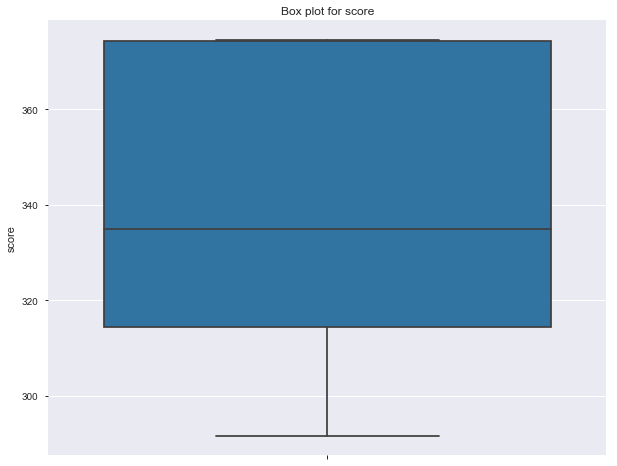

In [295]:
#  box plot for the score card for the whole dataset
plt.figure(figsize=(10,8))
    
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard)

##### Inferences :

No outliers detected in the above graph, scorecard seems to be in good shape

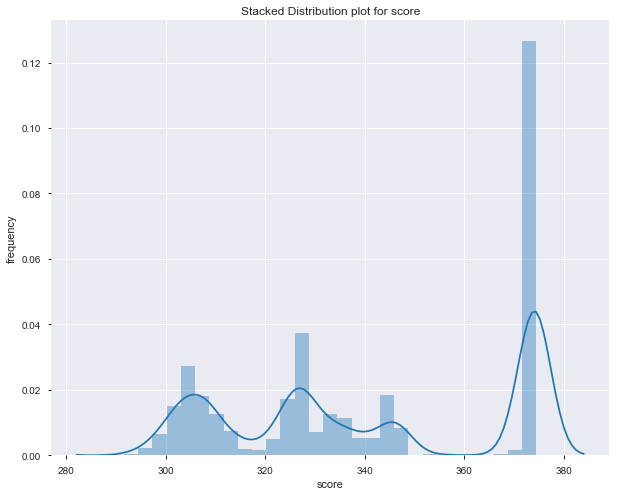

In [296]:
# stack plot for the whole dataset
plt.figure(figsize=(10,8))
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard['score'])
plt.ylabel('frequency')
plt.show()

##### Inferences :

Majority of the customers falls in the range of 290 to 350

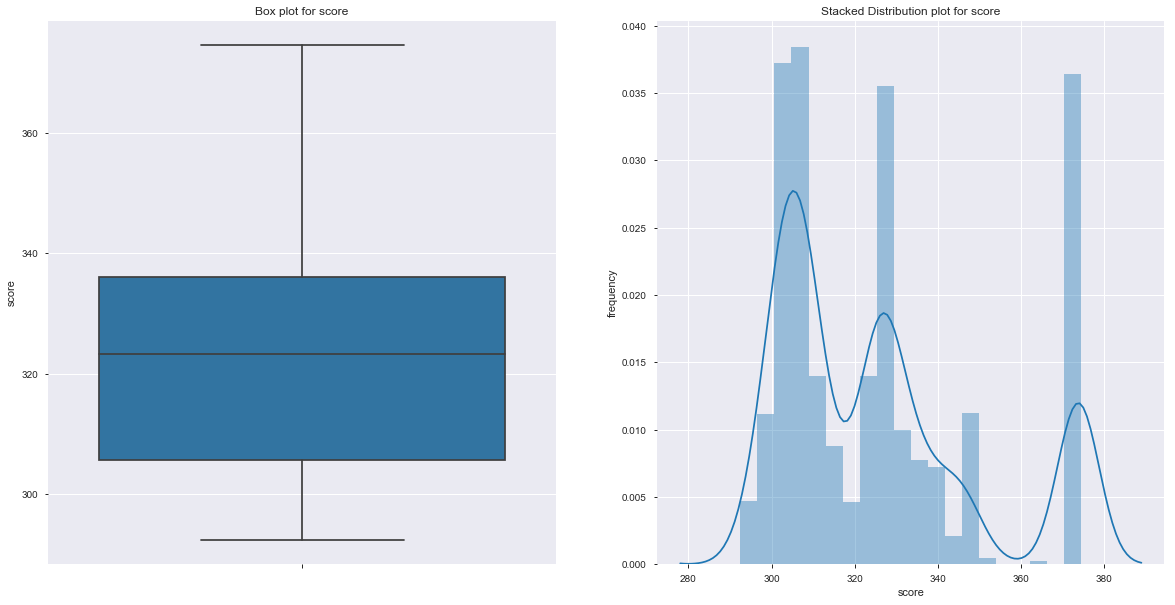

In [297]:
## plotting  for dafault cases
plt.figure(figsize=(20,10))

scorecard_default = scorecard[scorecard["Performance_Tag"] == 1]

plt.subplot(1, 2, 1)
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard_default)

plt.subplot(1, 2, 2)
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard_default['score'])
plt.ylabel('frequency')
plt.show()

##### Inferences :

Majority of the defaulters have score cards randing from from 290 to 350.

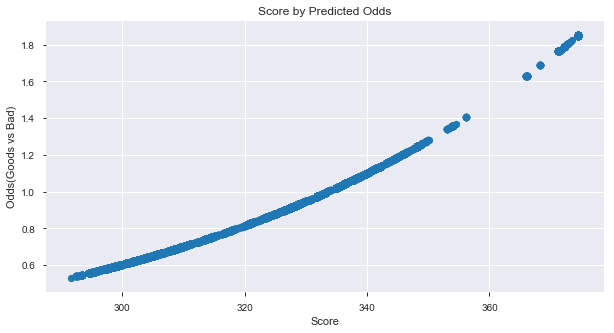

In [298]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(10,5))

plt.scatter(x='score',
            y='odds',
            data=scorecard)

plt.title('Score by Predicted Odds')
plt.xlabel('Score')
plt.ylabel('Odds(Goods vs Bad)');

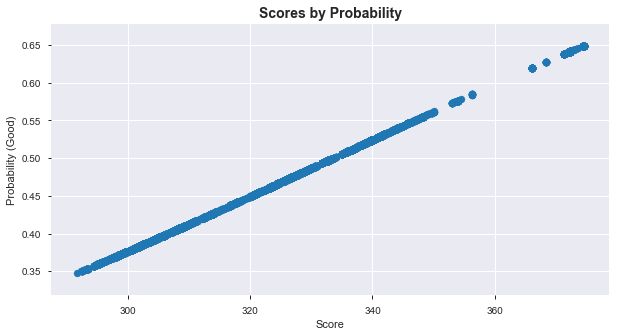

In [299]:
# Plot Scores Against Probabilities
plt.figure(figsize=(10,5))

plt.scatter(x='score',
            y='probs',
            data=scorecard)

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

In [300]:
# lets check the side effect of this cutoff by analysing the approved customers from the master scorecard
(len(scorecard[((scorecard['score'] < 310) & (scorecard["Performance_Tag"] == 0))])/len(scorecard[scorecard["Performance_Tag"]==0]))*100

20.960150611860684

##### Inferences :

Cut off of 310 impacts 21% of the approved customers because 21% of the customers who were granted credit card have score of less than 310.

# Application scorecard

Cut off of 310 impacts 21% of the approved customers because 21% of the customers who were granted credit card have score of less than 310.

## Recommended Cut off : 310 


* Customers with a score less than 310 would not be granted credit card.    
* Cutoff of 310 correctly identifies almost 89% of the bad customers.     
* If we consider the scorecard built for the master dataset, then almost 21% of the good customers are not going to get      the credit card.    
* If we reduce the cutoff from 310 to a lower number then it will defeat the purpose of doing this exercise of identifying the bad cusomers.    
* Though, if Bank is ready to take the risk they may reduce the cutoff by 5 points, keeping it to 305. A cutoff of 305 would correctly identify 76% of the bad customers, and will impact around 2.5% good customers. 

# Assessing the financial benefit 

In the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’. Using past data of the bank’s applicants, we have determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project. Another important point is, Bank does not only lose money by giving credit card to the bad customers, it may also lose business (eventually money) by not giving credit cart to the good customers

Machine Learning Model we have built have strong predictive power to discriminate between good and the bad customers.

#### Application scorecard :

    * Total number of Customers = 71292 (remember we removed three duplicate reports)
    * Approved Customers = 69867 (there were 1425 records with null values for performance tag, 71292-1425 = 69867)
    * Default Customers = 2947 (Customers with Performance Tag 1)
    
#### Assumption to compute P & L

    * Customer Acquisition Cost (including paper work, phone calls cost, service tax etc.) – 
    * 50 USD Credit Card Limit = 49,950 USD (taking odd number so that the money at risk is a round figure) 
    * Money at Risk per customer = 49,950 + 50 = 50,000 USD
    * Total Money at Risk (Defaulted Customers) = 50,000 × 2947 = 14,73,50,000‬ USD
    

#### Potential financial benefit 

    * Model we built has a recall of 74%, hence it can save 74% of 14,73,50,000‬ USD
    
    



